<span style="font-family: Arial; font-weight:bold;font-size:3em;color:#00b3e5;">CAPSTONE PROJECT.

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Importing Libraries</div>l

In [1]:
# Import TensorFlow
import tensorflow as tf
print('tensorflow version : {0}'.format(tf.__version__))

import random
random.seed(0)
import warnings
warnings.filterwarnings('ignore')

tensorflow version : 2.13.0


In [4]:
# Install pydicom
!pip install pydicom

  Using cached pydicom-2.4.2-py3-none-any.whl (1.8 MB)


**1.pydicom is a pure Python package for working with DICOM files such as medical images, reports, and radiotherapy objects.**



**2.pydicom makes it easy to read these complex files into natural pythonic structures for easy manipulation. Modified datasets      can be written again to DICOM format files.**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Rectangle
import cv2
import os
import pydicom as dicom
import seaborn as sns
sns.set_style('darkgrid')
from tqdm import tqdm, tqdm_notebook
from glob import glob
from skimage.transform import resize
from skimage import io, measure
import matplotlib.image as mpimg
import zipfile

import warnings
warnings.filterwarnings('ignore')
     

# <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#01b3e5;">Pneumonia Detection Challenge

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Team Name:             Capstone group 3 - CV 1 - Jul 22 A </div>
    
## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Members Name:
1) Shameer Sutar
    
2) Siva Nageswara Rao. Maddala
    
3) Kanjirathingal Anna Sagina
    
4) Priyankaa B
 
5) Hari sudhan   

## Under the supervision of: Mentor:     Jyant Mahara

 ## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> PROBLEM STATEMENT </div>

### DOMAIN: 

Health Care 

### CONTEXT: 

Computer vision can be used in health care for identifying diseases. In Pneumonia detection we need to detect Inflammation 
of the lungs. In this challenge, you’re required to build an algorithm to detect a visual signal for pneumonia in medical 
images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

### DATA DESCRIPTION:
- In the dataset, some of the features are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia. Dicom original images: - Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data. 
- Dataset has been attached along with this project. Please use the same for this capstone project.

- Original link to the dataset : https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data [ for your reference 
only ]. You can refer to the details of the dataset in the above link.

- Acknowledgements: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements.

### PROJECT OBJECTIVE: 

Design a DL based algorithm for detecting pneumonia.



# SHORT INTRODUCTION:
**To carry out an effective study on Pneumonia detection, one must understand about the disease, what causes it and what are the technical jargons used in this filed of study. In this section, we’ll answer in brief about these topics.**

 ## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> 1. What is Pneumonia? </div> 
 
**Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.**

In [1]:
from PIL import Image
im = Image.open('C:/Users/ADMIN/Desktop/Pneumonia.jpg')

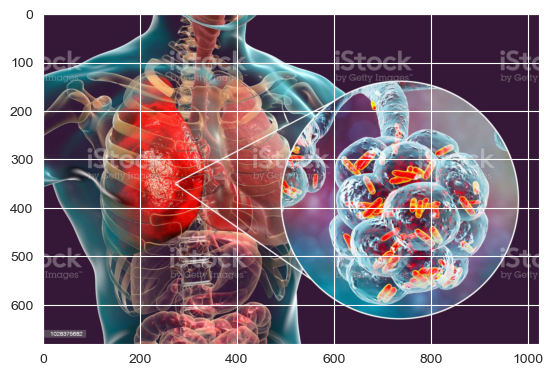

In [5]:
plt.imshow(im)
plt.show()


 ## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> 2. Symptoms of Pneumonia. </div> 
 
 
**The signs and symptoms of pneumonia vary from mild to severe, depending on factors such as the type of germ causing the infection, and your age and overall health. Mild signs and symptoms often are similar to those of a cold or flu, but they last longer.**

**Signs and symptoms of pneumonia may include:**

1. Chest pain when you breathe or cough.

2. Confusion or changes in mental awareness (in adults age 65 and older).

3. Cough, which may produce phlegm Fatigue.

4. Fever, sweating and shaking chills.

5. Lower than normal body temperature (in adults older than age 65 and people with weak immune systems)

6. Nausea, vomiting or diarrhea

7. Shortness of breath

 ## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> 3. How Pneumonia is detected?</div> 
 
**Blood tests:** 

Blood tests are used to confirm an infection and to try to identify the type of organism causing the infection.

**Chest X-ray:** 

This helps your doctor diagnose pneumonia and determine the extent and location of the infection.

**Pulse oximetry:** 

This measures the oxygen level in your blood. Pneumonia can prevent your lungs from moving enough oxygen into your bloodstream.

**Sputum test:**

A sample of fluid from your lungs (sputum) is taken after a deep cough and analyzed to help pinpoint the cause of the infection.

**In our study, we will focus our research on how Pneumonia is detected with the help of chest X-rays. In below image, we can see how pneumonia is read by the doctors or radiologists in x-rays.**



## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> 4. Opacity:</div>


**"Opacity refers to any area that preferentially attenuates the x-ray beam and therefore appears more opaque than the surrounding area. It is a nonspecific term that does not indicate the size or pathologic nature of the abnormality."**


- Any area in the chest radiograph that is whiter than it should be. 


- If you compare the images of Sample Patient 1 and Sample Patient 2 you can see that the lower boundary of the lungs of patient 2 is obscured by opacities. 


- In the image of Sample Patient 1 you can see the clear difference between the black lungs and the tissue below it, and in the image of Sample Patient 2 there is just this fuzziness.


 ## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Milestone 1: </div> 

#### Input: 

Context and Dataset

#### Process: 

‣ Step 1: Import the data. 

‣ Step 2: Map training and testing images to its classes.

‣ Step 3: Map training and testing images to its annotations. 

‣ Step 4: Preprocessing and Visualisation of different classes 

‣ Step 5: Display images with bounding box. 

‣ Step 6: Design, train and test basic CNN models for classification.

‣ Step 7: Interim report

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Summary of Problem statement, data and findings </div> 

## Problem Statement:

'Pneumonia' is an infection in the lung, which requires the review of a chest radiograph by highly trained specialists. Pneumonia shows up in a chest radiograph as an area of opacity. However, diagnosing it can be complicated and much time and effort is spent by specialists in reviewing X-rays. The chest radiograph is the most commonly performed diagnostic imaging study. Due to the high volume of chest radiography, it is very time-consuming and intensive for radiologists to review each image manually.
As such, an automated solution is ideal to locate the position of inflammation in an image. Having such an automated pneumonia screening system, can assist physicians to make better clinical decisions or even replace human judgement in this area.



# About the Dataset:
The link for the dataset and more information can be found here - https://www.kaggle.com/c/rsna-pneumonia-detection-challenge


**The given data contains the following items:**

**1.stage_2_train_images:**

This folder contains all the training dataset as chest radiograph DICOM images. Lung tissue which are full of air do not absorb x-ray and appear black in colour. Dense tissues absorb x-rays and appear white in colour.

Black => Air   

White => Bone   

Grey => Fluid or tissue

**The stage_2_train_images has 26,684 training images present.**

**2. stage_2_train_labels.csv:**

1. This file contains the corresponding 'patientID' images to the folder 'stage_2_train_images'.


2. It also contains the bounding box of areas of pneumonia detected in each image along with a **target** label of 0 or 1 for pneumonia detected.


3. Bounding boxes are defined by **x-min, y-min, width and height.**


4. The stage_2_train_labels dataset have 30,227 rows and 6 columns.


5. Per **PatientID** may have multiple rows.





**3.stage_2_detailed_class_info.csv:**

This file contains the corresponding patientID along with the target class labels of the images.
The stage_2_detailed_class has 26,684 training images present.

**4.stage_2_test_images:**

This folder contains all the test dataset chest radiograph **DICOM** images.

**5.stage_2_sample_submission.csv:**

This file contains the corresponding **patientID** images to the folder 'stage_2_test_images'.

# Importing data

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Step 1: Import the data:  </div> 

### EXTRACTING THE TRAINING DATASET:

1. The images to be used for training purpose is given as a zip file named: **stage_2_train_images.zip**.


2. It is saved into **train_images_zip** variable and extracted into **stage_2_train_images** name.

In [6]:
train_images_zip = 'C:/Users/ADMIN/stage_2_train_images.zip'

extract_dir = 'C:/Users/ADMIN/stage_2_train_images'

with zipfile.ZipFile(train_images_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Extraction done successfully.")

Extraction done successfully.


### EXTRACTING THE TESTING DATASET:

1. The images to be used for testing purpose is given as a zip file named: stage_2_test_images.zip.

2. It is saved into test_images_zip variable and extracted into stage_2_test_images name.

In [7]:
test_images_zip = 'C:/Users/ADMIN/stage_2_test_images.zip'

extract_dir = 'C:/Users/ADMIN/stage_2_test_images'

with zipfile.ZipFile(test_images_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction done successfully.")

Extraction done successfully.


### READING THE TRAINING LABEL:

1. This file contains the corresponding 'patientID' images to the folder 'stage_2_train_images'.

2. It also contains the bounding box of areas of pneumonia detected in each image along with a target label of 0 or 1 for pneumonia detected.

3. Bounding boxes are defined by x-min, y-min, width and height.

In [8]:
labels_file = 'C:/Users/ADMIN/stage_2_train_labels.csv'
train_labels_df = pd.read_csv(labels_file)
print('First five rows of Training set :')
train_labels_df.head(5)

First five rows of Training set :


patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [9]:
train_labels_df.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [10]:
train_labels_df.shape

(30227, 6)

In [11]:
# Calculate the number of entries in the Train labels dataframe
print('The train_labels_df dataframe has {0} rows and {1} columns.'.format(train_labels_df.shape[0], train_labels_df.shape[1]))

# Calculate the number of unique patient IDs
num_unique_patients = train_labels_df['patientId'].nunique()
print('Number of unique patientId: {0}'.format(num_unique_patients))


The train_labels_df dataframe has 30227 rows and 6 columns.
Number of unique patientId: 26684


Thus, the dataset contains information about **26684** patients. 

Out of these 26684 patients, some of them have **multiple entries** in the dataset.

### EXPLORING THE TARGET COLUMN:

No of entries which have Pneumonia: 9555 (32.0%)
No of entries which don't have Pneumonia: 20672 (68.0%)



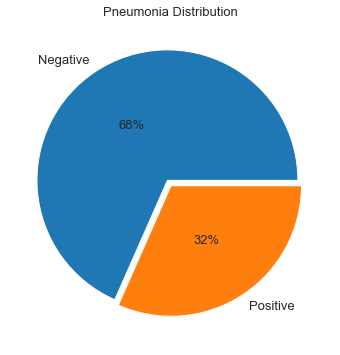

In [12]:
# Calculate the number of entries with pneumonia and percentage
pneumonia_entries = train_labels_df[train_labels_df.Target == 1]
no_pneumonia_entries = train_labels_df[train_labels_df.Target == 0]

pneumonia_count = pneumonia_entries.shape[0]
no_pneumonia_count = no_pneumonia_entries.shape[0]

pneumonia_percentage = round(pneumonia_count / train_labels_df.shape[0] * 100, 0)
no_pneumonia_percentage = round(no_pneumonia_count / train_labels_df.shape[0] * 100, 0)

print('No of entries which have Pneumonia: {0} ({1}%)'.format(pneumonia_count, pneumonia_percentage))
print('No of entries which don\'t have Pneumonia: {0} ({1}%)\n'.format(no_pneumonia_count, no_pneumonia_percentage))

# Visualize the distribution of pneumonia using a pie chart
plt.figure(figsize=(10,6))
textprops = {'fontsize': 13}  # Font size of text in the pie chart

# Plotting the pie chart
train_labels_df['Target'].value_counts().plot(
    kind='pie',
    autopct='%.0f%%',
    explode=[0.04, 0.01],
    labels=['Negative', 'Positive'],
    startangle=0,
    pctdistance=0.5,
    labeldistance=1.1,
    textprops=textprops
)

plt.title('Pneumonia Distribution', fontdict=textprops)
plt.xlabel('')
plt.ylabel('')
plt.show()


The code provided performs the following steps:


1. It filters the train_labels_df DataFrame to create two separate DataFrames:

-      **pneumonia_entries**, which contains entries with pneumonia (where Target column equals **1**), and 

-      **no_pneumonia_entries**, which contains entries without pneumonia (where Target column equals **0**).


2. It calculates the counts of entries with pneumonia and without pneumonia using the shape attribute of the filtered DataFrames and assigns them to pneumonia_count and no_pneumonia_count, respectively.

3. It calculates the percentage (%) of entries with pneumonia and without pneumonia by dividing the counts by the total number of entries in train_labels_df, multiplying by 100, and rounding to the nearest whole number. 

4. The percentages(%) are assigned to pneumonia_percentage and no_pneumonia_percentage.

5. It prints the counts and percentages of entries with pneumonia and without pneumonia.

6. It visualizes the distribution of pneumonia using a pie chart. The **value_counts() method** is used to count the occurrences of each category in the Target column. 

7. The pie chart is plotted with labels, percentages, and formatting options. The chart is then displayed using plt.show().

**The dataset contains data 30,277 records for 26,684 unique patients. Suggesting some patients have more than one entry (more than one bounding boxes detecting pneumonia).**

**Out of 30,277 entries in the dataset,**

**No. of positive cases = 9,555 ~ 32%**

**No. of negative cases = 20,672 ~ 68%**


**To cross verify, we can count the number of bounding boxes with null values for x, y, width and height.**

In [13]:
# Checking nulls in bounding box columns
null_counts = train_labels_df[['x', 'y', 'width', 'height']].isnull().sum().to_dict()

print('Number of nulls in bounding box columns:')
for column, count in null_counts.items():
    print('{0}: {1}'.format(column, count))


Number of nulls in bounding box columns:
x: 20672
y: 20672
width: 20672
height: 20672


#### The code provided checks for null values in the bounding box columns (x, y, width, and height) of the train_labels_df      DataFrame.

It performs the following steps:

1. It uses the isnull() method to check for null values in the specified columns: **x, y, width, and height**

2. It applies the sum() method to count the number of null values in each column.

3. The resulting null counts are converted to a dictionary using the **to_dict()**  method.

4. It iterates over the dictionary items and prints the column name and corresponding null count.

In [1]:
bounding_box = train_labels_df.groupby('patientId').size().to_frame('number_of_boxes').reset_index()
train_labels_df = train_labels_df.merge(bounding_box, on = 'patientId', how = 'left')
print('Number of patientIds per bounding box in the dataset: ')
(bounding_box.groupby('number_of_boxes').size().to_frame('number_of_patientId').reset_index().set_index('number_of_boxes').sort_values(by = 'number_of_boxes'))


NameError: name 'train_labels_df' is not defined

1. Out of 30227 patients, 23286 have **1** bounding box.


2. Out of 30227 patients, 3266 have **2** bounding boxes.


3.  Out of 30227 patients, 119 have **3** bounding boxes.


4.  Out of 30227 patients, 13 have **4** bounding boxes.

### READING AND DISPLAYING "CLASS_INFO_FILE":

**Stage_2_train_class:**

The file has **PatientId** and the class in which those patients fall into.

The data is divided into 3 labels:

**1.Normal.**
  
**2.Lung opacity.**

**3.Not normal/ no lung opacity.**

In [15]:
class_info_file= 'C:/Users/ADMIN/stage_2_detailed_class_info.csv'
class_info_df = pd.read_csv(class_info_file)
print('First five rows of class_info_df dataset are :')
class_info_df.head(5)

First five rows of class_info_df dataset are :


patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

Some information about the data field present in the 'stage_2_detailed_class_info.csv' are:

1. patientId - A patientId. 


2. Each patientId corresponds to a unique image class - Have three values depending what is the **current state of the patient's lung:** 


'No Lung Opacity / Not Normal', 'Normal' and 'Lung Opacity'.

In [16]:
#  Calculate the number of entries in the class_info_df dataframe
num_rows = class_info_df.shape[0]
num_columns = class_info_df.shape[1]
print('The class_info_df dataframe has {0} rows and {1} columns.'.format(num_rows, num_columns))

# Calculate the number of unique patient IDs
num_unique_patients = class_info_df['patientId'].nunique()
print('Number of unique patientId: {0}'.format(num_unique_patients))

The class_info_df dataframe has 30227 rows and 2 columns.
Number of unique patientId: 26684


#### Thus, the dataset contains information about 26684 patients (which is same as that of the train_labels dataframe).

Feature: class
No Lung Opacity / Not Normal  : 11821 which is 39.1% of the total data in the dataset
Lung Opacity                  : 9555 which is 31.61% of the total data in the dataset
Normal                        : 8851 which is 29.28% of the total data in the dataset


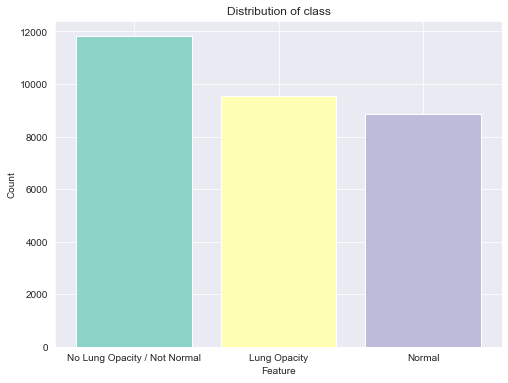

In [17]:
def get_feature_distribution(data, feature):
    # Count for each label
    label_counts = data[feature].value_counts()
    # Count the number of items in each class
    total_samples = len(data)
    print('Feature: {}'.format(feature))
    for i in range(len(label_counts)):
        label = label_counts.index[i]
        count = label_counts.values[i]
        percent = int((count / total_samples) * 10000) / 100
        print('{0:<30s}: {1} which is {2}% of the total data in the dataset'.format(label, count, percent))

    # Plotting the distribution using different colors for different features
    colors = plt.cm.Set3(range(len(label_counts)))
    plt.figure(figsize=(8, 6))
    plt.bar(label_counts.index, label_counts.values, color=colors)
    plt.xlabel('Feature')
    plt.ylabel('Count')
    plt.title('Distribution of {}'.format(feature))
    plt.show()

# Example usage
get_feature_distribution(class_info_df, 'class')


### The provided code defines a function get_feature_distribution that calculates the distribution of a given feature in a DataFrame. Here's how the code works:

1. The function takes two parameters: data, which is the DataFrame, and feature, which is the name of the feature/column in the DataFrame.

2. Inside the function, the value_counts() method is used on the specified feature column to count the occurrences of each unique value.

3. The total number of samples in the dataset is calculated using the len() function on the DataFrame.

4. The function then iterates over the counted values, extracting the label, count, and percentage for each value. The percentage is calculated by dividing the count by the total samples and multiplying by 100.

5. The label, count, and percentage are printed for each value in a formatted manner.

6. Next, a bar plot is created using plt.bar() to visualize the distribution. Each unique value in the feature is plotted on the x-axis, and the corresponding count is plotted on the y-axis. Different colors are used for different values.

7. The x-label, y-label, and title of the plot are set accordingly.

#### Finally, the plot is displayed using plt.show().

## INSIGHTS FROM THE ABOVE GRAPH:

1. Out of 30227 patients, 11821 patients fall under No Lung Opacity / Not Normal class. - 39%


2. Out of 30227 patients, 9555 patients fall under Lung Opacity. - 32%


3. Out of 30227 patients, 8851 patients fall under Normal class. - 29%


## DISTRIBUTION OF "CLASS" COLUMN as PIECHART:

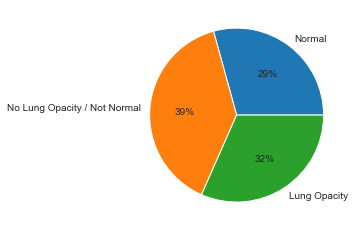

In [18]:
figsize = (10, 6)
_ = class_info_df['class'].value_counts().sort_index(ascending = False).plot(kind = 'pie', autopct = '%.0f%%').set_ylabel('')

In [19]:
# Checking nulls in class_labels
print('Number of nulls in class columns : {0}'.format(class_info_df['class'].isnull().sum()))

Number of nulls in class columns : 0


In [20]:
# Checking whether each patientId has only one type of class or not
class_info_df.groupby(['patientId'])['class'].nunique().max()

1


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Step 2: Map training and testing images to its classes. </div> 


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Step 3: Map training and testing images to its annotations: </div> 

### Merge both dataset i,e merged dataset 1

In [21]:
# Merging the two dataset - 'train_labels' and 'class_labels'
merged_data = pd.concat([train_labels_df, class_info_df['class']], axis = 1)
print('After merging, the dataset looks like : ')
merged_data.head()

After merging, the dataset looks like : 


patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

   number_of_boxes                         class  
0                1  No Lung Opacity / Not Normal  
1                1  No Lung Opacity / Not Normal  
2                1  No Lung Opacity / Not Normal  
3                1                        Normal  
4                2                  Lung Opacity

## The above step (Step 2) is related to mapping annotation.

In [22]:
print('After merge, the dataset has {0} rows and {1} columns.'.format(merged_data.shape[0], merged_data.shape[1]))

After merge, the dataset has 30227 rows and 8 columns.


**After merge, the dataset has 30227 rows and 7 columns.
Target and Class**

**The Classes and data are not balanced.**

**Target ‘0’ => Classes Normal and No lung opacity/Not normal.**

**Target ‘1’ => Class Lung opacity.**


In [23]:
merged_data.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target', 'number_of_boxes',
       'class'],
      dtype='object')

In [24]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patientId        30227 non-null  object 
 1   x                9555 non-null   float64
 2   y                9555 non-null   float64
 3   width            9555 non-null   float64
 4   height           9555 non-null   float64
 5   Target           30227 non-null  int64  
 6   number_of_boxes  30227 non-null  int64  
 7   class            30227 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 2.1+ MB


**After merge, the dataset has 30227 rows and 8 columns.
Target and Class**

**The Classes and data are not balanced.**

1. Target ‘0’ => Classes Normal and No lung opacity/Not normal.



2. Target ‘1’ => Class Lung opacity.


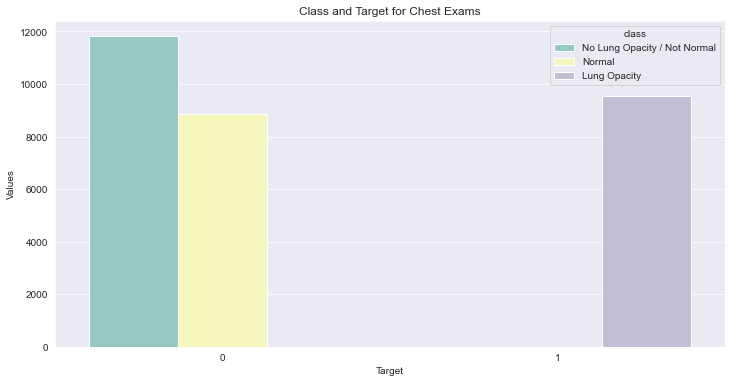

In [25]:
#class and target distribution
fig, ax = plt.subplots(nrows = 1, figsize = (12, 6))
temp = merged_data.groupby('Target')['class'].value_counts()
data_target_class = pd.DataFrame(data = {'Values': temp.values}, index = temp.index).reset_index()
sns.barplot(ax = ax, x = 'Target', y = 'Values', hue = 'class', data = data_target_class, palette = 'Set3')
plt.title('Class and Target for Chest Exams')
plt.show()

### INSIGHTS FROM THE ABOVE GRAPH:

1. Thus, Target = 1 is associated with only class = Lung Opacity - 32%.


2. whereas, Target = 0 is associated with two class = No Lung Opacity / Not Normal as well as Normal. - 68%.

## A sample of 2000 entries is randomly selected from target_1 for better visualization. 

## The centers (xc and yc) of the rectangles are calculated using the x, y, width, and height columns.

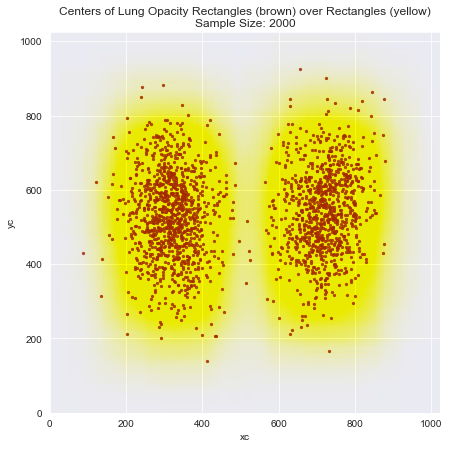

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Select 2000 samples with Target = 1
target_1 = merged_data[merged_data['Target'] == 1]
target_sample = target_1.sample(2000)

# Calculate the centers of the lung opacity rectangles
target_sample['xc'] = target_sample['x'] + target_sample['width'] / 2
target_sample['yc'] = target_sample['y'] + target_sample['height'] / 2

# Set the plot title and axis labels
plt.title('Centers of Lung Opacity Rectangles (brown) over Rectangles (yellow)\nSample Size: 2000')

# Plot the centers as brown scatter dots
target_sample.plot.scatter(x='xc', y='yc', xlim=(0, 1024), ylim=(0, 1024), ax=ax, alpha=0.8, marker='.', color='brown')

# Plot the rectangles as yellow patches
for i, crt_sample in target_sample.iterrows():
    ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
                           width=crt_sample['width'], height=crt_sample['height'],
                           alpha=3.5e-3, color="yellow"))

# Display the plot
plt.show()


We can see that the centers for the **bounding boxes** are spread out evenly across the Lungs(**red dots**). Though a large portion of the bounding box have their centers at the centers of the Lung, but some centers of the box are also located at the edges of lung (yellow portion).

This code generates a scatter plot where the centers of lung opacity rectangles are plotted as brown dots, while the rectangles themselves are represented as yellow patches. 

The target_1 DataFrame contains only the entries with Target value of 1 (indicating lung opacity). 


### Here's how the code works:

1. It creates a figure and axes using plt.subplots() to set up the plotting area with a specific size.

2. The code selects 2000 samples from the merged dataset where the 'Target' value is 1 (indicating the presence of pneumonia).

3. The code calculates the centers of the lung opacity rectangles by adding half of the 'width' to 'x' and half of the 'height' to 'y' for each sample.

4. The plot's title is set using plt.title().

5. The centers are plotted as scatter dots using target_sample.plot.scatter() with the 'xc' values as the x-axis and 'yc' values as the y-axis. Additional parameters such as the x-axis and y-axis limits, transparency (alpha), marker style, and color are specified.

6. For each sample in target_sample, a yellow rectangle is added to the plot using ax.add_patch(Rectangle()). The 'x', 'y', 'width', and 'height' values of each sample define the position and dimensions of the rectangle.

### Finally, the plot is displayed using plt.show().

Executing this code will generate a scatter plot with brown dots representing the centers of lung opacity regions and yellow rectangles representing the corresponding bounding boxes. This visualization helps in understanding the distribution and position of lung opacity regions in the sample.








## Extracting Meta data of the images:

In [27]:
sample_patientId = train_labels_df['patientId'][0]
dcm_file = 'C:/Users/ADMIN/stage_2_train_images/'+'{}.dcm'.format(sample_patientId)
dcm_data = dicom.read_file(dcm_file)

print('Metadata of the image consists of : \n\n', dcm_data)

Metadata of the image consists of : 

 Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '

# The provided code reads a DICOM file using the dicom library and prints the metadata information stored in the file. 

# Here's an explanation of the metadata fields:

Dataset.file_meta: Contains the file meta information group, including details like:

file meta information version, SOP class UID, SOP instance UID, transfer syntax UID, implementation class UID, and implementation version name.


0008, 0005: Specific Character Set - Specifies the character encoding used in the file, in this case, ISO_IR 100 (Latin alphabet No. 1).

0008, 0016: SOP Class UID - Identifies the DICOM SOP class to which the image belongs. Here, it is Secondary Capture Image Storage.

0008, 0018: SOP Instance UID - Uniquely identifies the instance of the SOP class.

0008, 0020: Study Date - Represents the date when the study was performed.

0008, 0030: Study Time - Represents the time when the study was performed.

0008, 0050: Accession Number - A unique identifier for a specific examination or study.

0008, 0060: Modality - Represents the imaging modality used to acquire the image. Here, it is CR (Computed Radiography).

0008, 0064: Conversion Type - Indicates whether the image has been converted to a different format. Here, it is WSD (Workstation).

0008, 0090: Referring Physician's Name - Name of the referring physician.

0008, 103e: Series Description - Description of the series in which the image belongs. Here, it indicates the view as PA (Posteroanterior).

0010, 0010: Patient's Name - Name of the patient.

0010, 0020: Patient ID - Unique identifier for the patient.

0010, 0030: Patient's Birth Date - Date of birth of the patient.

0010, 0040: Patient's Sex - Sex of the patient.

0010, 1010: Patient's Age - Age of the patient.

0018, 0015: Body Part Examined - The body part that is examined. Here, it is CHEST.

0018, 5101: View Position - Indicates the position of the patient during image acquisition. Here, it is PA (Posteroanterior).

0020, 000d: Study Instance UID - Uniquely identifies the study to which the image belongs.

0020, 000e: Series Instance UID - Uniquely identifies the series to which the image belongs.

0028, 0002: Samples per Pixel - Specifies the number of color channels in the image. Here, it is 1, indicating a grayscale image.

0028, 0004: Photometric Interpretation - Describes how pixel data should be displayed. Here, it is MONOCHROME2, indicating grayscale pixel values.

0028, 0010: Rows - Number of rows in the image.

0028, 0011: Columns - Number of columns in the image.

0028, 0030: Pixel Spacing - Physical distance between adjacent pixels in millimeters.

0028, 0100: Bits Allocated - Number of bits used to represent each pixel value.

0028, 0101: Bits Stored - Number of bits used to store the pixel values.

0028, 0102: High Bit - The most significant bit for pixel data.


In [28]:
print('Number of images in training images folders are : {0}'.format(len(os.listdir('C:/Users/ADMIN/stage_2_train_images'))))

Number of images in training images folders are : 26684


Thus, we can see that in the training images folder we have just 26684 images which is same as that of unique patientId's present in either of the csv files. 

Thus, we can say that each of the unique patientId's present in either of the csv files corresponds to an image present in the folder.



In [29]:
training_image_path = 'C:/Users/ADMIN/stage_2_train_images/'

images = pd.DataFrame({'path': glob(os.path.join(training_image_path, '*.dcm'))})
images['patientId'] = images['path'].map(lambda x:os.path.splitext(os.path.basename(x))[0])
print('Columns in the training images dataframe : {0}'.format(list(images.columns)))
     

Columns in the training images dataframe : ['path', 'patientId']


## Now merge this dataset with merged dataset 1 i,e Merged dataset 2

In [30]:
# Merging the images dataframe with training_data dataframe
training_data = merged_data.merge(images, on = 'patientId', how = 'left')
print('After merging the two dataframe, the training_data has {0} rows and {1} columns.'.format(training_data.shape[0], training_data.shape[1]))
     

After merging the two dataframe, the training_data has 30227 rows and 9 columns.


## The above step is related to mapping annotation. (Step 3)

In [31]:
print('The training_data dataframe as of now stands like,')
training_data.head()

The training_data dataframe as of now stands like,


patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

   number_of_boxes                         class  \
0                1  No Lung Opacity / Not Normal   
1                1  No Lung Opacity / Not Normal   
2                1  No Lung Opacity / Not Normal   
3                1                        Normal   
4                2                  Lung Opacity   

                                                path  
0  C:/Users/ASUS/stage_2_train_images/stage_2_tra...  
1  C:/Users/ASUS/stage_2_train_images/stage_2_tra...  
2  C:/Users/ASUS/stage_2_train_images/stage_2_tra...  
3  C:/Users/ASUS/stage_2_train_images/stage_2_tra...  
4  C:/Users/ASUS/stage_2_train_images/stage_2_tra...

### As per meta data records it may need to add some columns inte above dataset to further analize the problem statement, hence we can add these columns:

1) Modality

2) PatientAge

3) PatientSex

4) BodyPartExamined

5) ViewPosition

6) ConversionType

7) Image rows

8) Image columns

9) PixelSpacing


In [32]:
columns_to_add = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']

def parse_dicom_data(data_df, data_path):
    for col in columns_to_add:
        data_df[col] = None
    image_names = os.listdir('C:/Users/ADMIN/stage_2_train_images/')
  
    for i, img_name in tqdm_notebook(enumerate(image_names)):
        imagepath = os.path.join('C:/Users/ADMIN/stage_2_train_images/', img_name)
        data_img = dicom.read_file(imagepath)
        idx = (data_df['patientId'] == data_img.PatientID)
        data_df.loc[idx, 'Modality'] = data_img.Modality
        data_df.loc[idx, 'PatientAge'] = pd.to_numeric(data_img.PatientAge)
        data_df.loc[idx, 'PatientSex'] = data_img.PatientSex
        data_df.loc[idx, 'BodyPartExamined'] = data_img.BodyPartExamined
        data_df.loc[idx, 'ViewPosition'] = data_img.ViewPosition
        data_df.loc[idx, 'ConversionType'] = data_img.ConversionType
        data_df.loc[idx, 'Rows'] = data_img.Rows
        data_df.loc[idx, 'Columns'] = data_img.Columns
        data_df.loc[idx, 'PixelSpacing'] = str.format("{:4.3f}", data_img.PixelSpacing[0])
     


In [33]:
parse_dicom_data(training_data, 'C:/Users/ADMIN/stage_2_train_images/')

0it [00:00, ?it/s]

The code snippet parse_dicom_data(training_data, 'stage_2_train_images/') is a function call to a function named parse_dicom_data. This function takes two parameters: training_data and 'stage_2_train_images/'.

The purpose of the parse_dicom_data function is to extract relevant metadata from the DICOM files in the specified directory ('stage_2_train_images/') and add them as columns to the training_data dataset.

This function iterates over each row in the training_data dataframe. It constructs the file path for the corresponding DICOM file using the patient ID. Then, it reads the DICOM file using pydicom.read_file and extracts the desired metadata fields. Finally, it adds these metadata values as new columns to the training_data dataframe.

By calling parse_dicom_data(training_data, 'stage_2_train_images/'), you can populate the training_data dataframe with the extracted DICOM metadata.

### Merged dataset with Dicom file data:
    
The data from the Dicom files are now read and put into the dataset.


Fileds like 'Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', etc have been added to the dataset for further processing.


In [34]:
print('So after parsing the information from the dicom images, our training_data dataframe has {0} rows and {1} columns and it looks like, \n'.format(training_data.shape[0], training_data.shape[1]))
training_data.head()
     

So after parsing the information from the dicom images, our training_data dataframe has 30227 rows and 18 columns and it looks like, 



patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

   number_of_boxes                         class  \
0                1  No Lung Opacity / Not Normal   
1                1  No Lung Opacity / Not Normal   
2                1  No Lung Opacity / Not Normal   
3                1                        Normal   
4                2                  Lung Opacity   

                                                path Modality PatientAge  \
0  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         51   
1  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         48   
2  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         19   
3  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         28   
4  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         32   

  PatientSex BodyPartExamined ViewPosition ConversionType  Rows Columns  \
0          F            CHEST           PA            WSD  1024    1024   
1          F            CHEST           PA            WSD  1024    1024   
2          M            CHEST           AP            WSD  1024    1024   
3          M            CHEST           PA            WSD  1024    1024   
4          F            CHEST           AP            WSD  1024    1024   

  PixelSpacing  
0        0.143  
1        0.194  
2        0.168  
3        0.143  
4        0.139

In [35]:

# Saving the training_data for further use
training_data.to_pickle('training_data.pkl')

Going forward we will now use this pickle file as our training data.

# Exploratory Data Analysis

# Step 4: Preprocessing and Visualisation of different classes 

In this section, we'll be analysing Final dataset to summarize their main characteristics, often using statistical graphics and other data visualization methods.

We have the final dataset as below, with 30227 rows and 17 columns.



In [36]:
training_data = pd.read_pickle('training_data.pkl')
print('Our training data consists of {0} rows and {1} columns and looks like as, \n'.format(training_data.shape[0], training_data.shape[1]))
training_data.head()
     

Our training data consists of 30227 rows and 18 columns and looks like as, 



patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

   number_of_boxes                         class  \
0                1  No Lung Opacity / Not Normal   
1                1  No Lung Opacity / Not Normal   
2                1  No Lung Opacity / Not Normal   
3                1                        Normal   
4                2                  Lung Opacity   

                                                path Modality PatientAge  \
0  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         51   
1  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         48   
2  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         19   
3  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         28   
4  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         32   

  PatientSex BodyPartExamined ViewPosition ConversionType  Rows Columns  \
0          F            CHEST           PA            WSD  1024    1024   
1          F            CHEST           PA            WSD  1024    1024   
2          M            CHEST           AP            WSD  1024    1024   
3          M            CHEST           PA            WSD  1024    1024   
4          F            CHEST           AP            WSD  1024    1024   

  PixelSpacing  
0        0.143  
1        0.194  
2        0.168  
3        0.143  
4        0.139

**modality**

In [37]:
modality_counts = training_data['Modality'].value_counts()

print('Modality counts:')
print(modality_counts)


Modality counts:
CR    30227
Name: Modality, dtype: int64


**bodypart counts**

In [38]:
bodypart_counts = training_data['BodyPartExamined'].value_counts()

print('Body Part Examined counts:')
print(bodypart_counts)


Body Part Examined counts:
CHEST    30227
Name: BodyPartExamined, dtype: int64


**view position**

Feature: ViewPosition
AP                            : 15297 which is 50.6% of the total data in the dataset
PA                            : 14930 which is 49.39% of the total data in the dataset


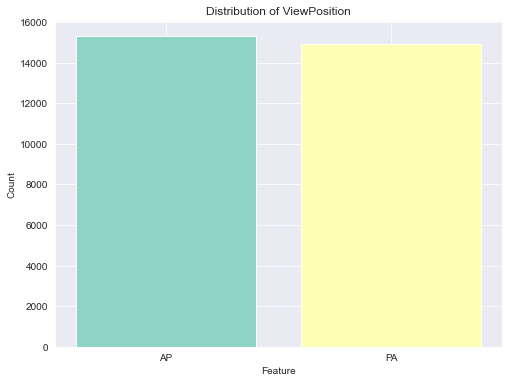

In [39]:
get_feature_distribution(training_data, 'ViewPosition')

### As seen above, two View Positions that are in the training dataset are AP (Anterior/Posterior) and PA (Posterior/Anterior). 

### These type of X-rays are mostly used to obtain the front-view. Apart from front-view, a lateral image is usually taken to complement the front-view.

**1. Posterior/Anterior (PA):** Here the chest radiograph is acquired by passing the X-Ray beam from the patient's posterior (back) part of the chest to the anterior (front) part. While obtaining the image patient is asked to stand with their chest against the film. In this image, the hear is on the right side of the image as one looks at it. These are of higher quality and assess the heart size more accurately

**2. Anterior/Posterior (AP):** At times it is not possible for radiographers to acquire a PA chest X-ray. This is usually because the patient is too unwell to stand. In these images the size of Heart is exaggerated.

The distribution of View Position when there is an evidence of Pneumonia :



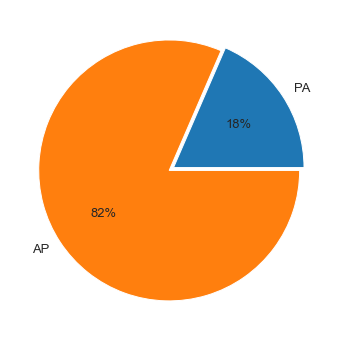

In [40]:
print('The distribution of View Position when there is an evidence of Pneumonia :\n')
plt.figure(figsize=(10,6))
training_data.loc[training_data['Target'] == 1, 'ViewPosition'].value_counts().sort_index(ascending = False).plot(kind = 'pie', autopct = '%.0f%%', explode = [0.03,0.01], textprops = {"fontsize":13}).set_ylabel('')
plt.show()

## INSIGHTS FROM THE ABOVE PIE CHART:

1. Patients with AP position has a target column of 1.

2. Patients with PA position has a target column of 0.

**Bounding Boxes**

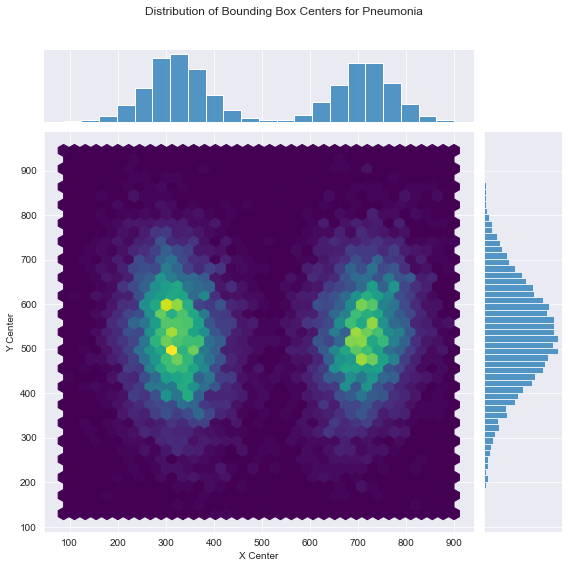

In [41]:
# Filter the data for bounding boxes with evidence of pneumonia
bboxes = training_data[training_data['Target'] == 1]

# Calculate the x and y centers of the bounding boxes
bboxes['x_center'] = bboxes['x'] + bboxes['width'] / 2
bboxes['y_center'] = bboxes['y'] + bboxes['height'] / 2

# Create a jointplot to visualize the distribution of x and y centers
g = sns.jointplot(x='x_center', y='y_center', data=bboxes, kind='hex', height=8, cmap='viridis')

# Set plot titles and labels
g.fig.suptitle('Distribution of Bounding Box Centers for Pneumonia')
g.set_axis_labels('X Center', 'Y Center')

# Adjust plot layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


### The above code provides following steps:

1. First, we import the necessary libraries: seaborn for data visualization and matplotlib.pyplot for plotting.


2. We filter the training_data to select only the bounding boxes with evidence of pneumonia. This is done by creating a new DataFrame called bboxes that contains rows where the 'Target' column is equal to 1.


3. We calculate the x and y centers of the bounding boxes by adding half of the width to the x-coordinate ('x + width / 2') and half of the height to the y-coordinate ('y + height / 2'). These calculations are stored in new columns 'x_center' and 'y_center' in the bboxes DataFrame.


4. We create a jointplot using sns.jointplot to visualize the distribution of the x and y centers. The kind parameter is set to 'hex' to create a hexbin plot, which is useful for visualizing the density of points.


5. The height parameter is set to 8 to adjust the size of the plot.


6. We set the plot title using g.fig.suptitle and the axis labels using g.set_axis_labels.


7. Finally, we adjust the plot layout using plt.tight_layout to ensure that all elements of the plot are properly displayed. The rect parameter is set to [0, 0, 1, 0.96] to adjust the position and size of the plot.


The plot is displayed using plt.show().


This code generates a jointplot that displays the distribution of the x and y centers of the bounding boxes for cases with evidence of pneumonia. The hexbin plot provides an overview of the density of these centers, allowing us to analyze the patterns and distribution of pneumonia cases within the image dataset.

**ViewPosition**

In [42]:
def bboxes_scatter(data, color_point, color_window, text):
    fig, ax = plt.subplots(1, 1, figsize = (7, 7))
    plt.title('Plotting centers of Lung Opacity\n{}'.format(text))
    data.plot.scatter(x = 'x_center', y = 'y_center', xlim = (0, 1024), ylim = (0, 1024), ax = ax, alpha = 0.8, marker = ".", color = color_point)
    for i, crt_sample in data.iterrows():
        ax.add_patch(Rectangle(xy = (crt_sample['x'], crt_sample['y']), width = crt_sample['width'], height = crt_sample['height'], alpha = 3.5e-3, color = color_window))
     

## We now try to see the distribution of bounding boxes with different ViewPosition (AP and PA).

There are multiple outliers in both the cases.

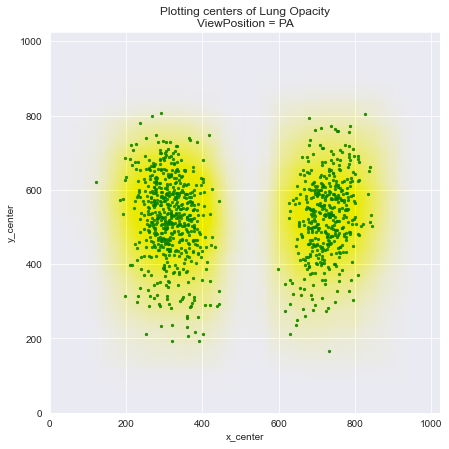

In [43]:
data_PA = bboxes[bboxes['ViewPosition'] == 'PA'].sample(1000)
data_AP = bboxes[bboxes['ViewPosition'] == 'AP'].sample(1000)

bboxes_scatter(data_PA, 'green', 'yellow', 'ViewPosition = PA')

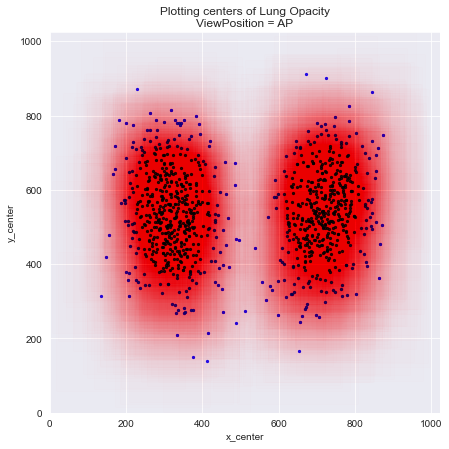

In [44]:
bboxes_scatter(data_AP, 'blue', 'red', 'ViewPosition = AP')
     

**conversion_types**

In [45]:
conversion_types = training_data['ConversionType'].unique()
print('Conversion Types for the data in Training Data:')
for conversion_type in conversion_types:
    print(conversion_type)


Conversion Types for the data in Training Data:
WSD


In [46]:
print('The training images has {0} rows and {1} columns.'.format(training_data.Rows.unique()[0], training_data.Columns.unique()[0]))
     

The training images has 1024 rows and 1024 columns.


**PatientSex**

In [47]:
def drawgraphs(data_file, columns, hue = False, width = 15, showdistribution = True):
    if (hue):
        print('Creating graph for : {} and {}\n'.format(columns, hue))
    else:  
        print('Creating graph for : {}\n'.format(columns))
    length = len(columns) * 6
    total = float(len(data_file))

    fig, axes = plt.subplots(nrows = len(columns) if len(columns) > 1 else 1, ncols = 1, figsize = (width, length))
    for index, content in enumerate(columns):
        plt.title(content)

    currentaxes = 0
    if (len(columns) > 1):
        currentaxes = axes[index]
    else:
        currentaxes = axes

    if (hue):
        sns.countplot(x = columns[index], data = data_file, ax = currentaxes, hue = hue)
    else:
        sns.countplot(x = columns[index], data = data_file, ax = currentaxes)

    if(showdistribution):
        for p in (currentaxes.patches):
            height = p.get_height()
            if (height > 0 and total > 0):
                currentaxes.text(p.get_x() + p.get_width()/2., height + 3, '{:1.2f}%'.format(100*height/total), ha = "center")

Creating graph for : ['PatientSex']



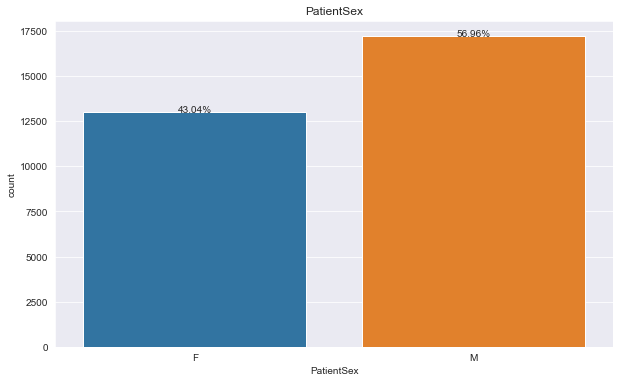

In [48]:
drawgraphs(data_file = training_data, columns = ['PatientSex'], hue = False, width = 10, showdistribution = True)
     

We'll divide the data based on Patient sex.

1. From below graph, we understand that division of data between male and female is divided as 57% abd 43% respectively.

Feature: PatientSex
M                             : 17216 which is 56.95% of the total data in the dataset
F                             : 13011 which is 43.04% of the total data in the dataset


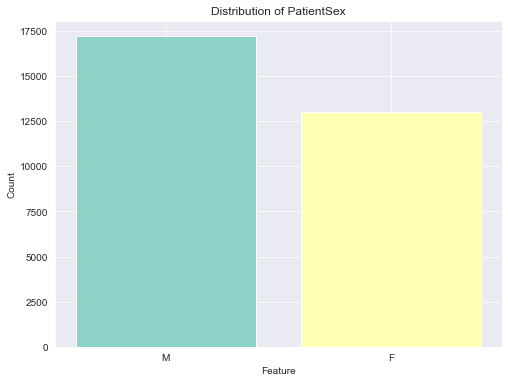

In [49]:
get_feature_distribution(training_data, 'PatientSex')

Thus, out of 30227 records, there are **17216** records of **M (Male)** and **13011** records of **F (Female).**

### The distribution graph "below"  represents the divion of classes based on the patient Gender.: 

1. 13.2% of the FEMALE population has been diagnosed with Pneumonia.

2. 18.4% of total MALE population has been diagnosed with Opacity deducing Pneumonia.


Creating graph for : ['PatientSex'] and class



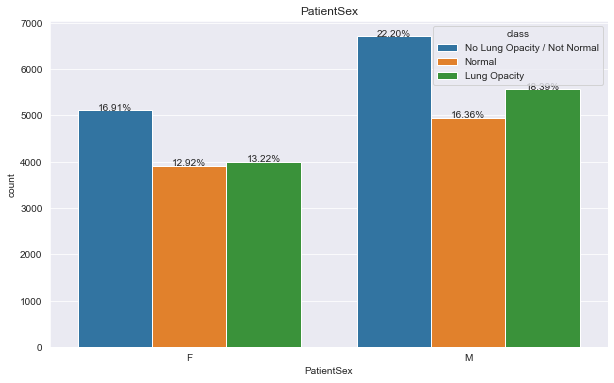

In [50]:
drawgraphs(data_file = training_data, columns = ['PatientSex'], hue = 'class', width = 10, showdistribution = True)

Creating graph for : ['PatientSex'] and Target



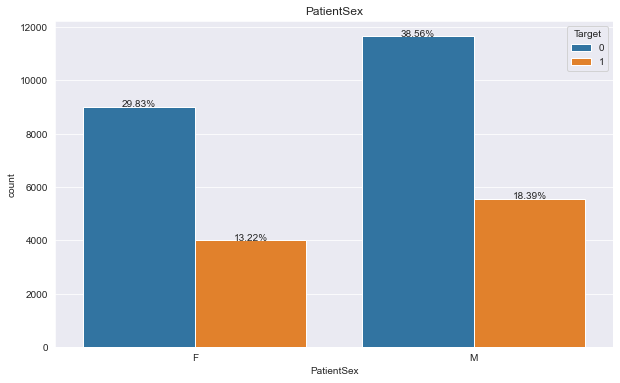

In [51]:
drawgraphs(data_file = training_data, columns = ['PatientSex'], hue = 'Target', width = 10, showdistribution = True)

## INSIGHTS FROM GRAPH:

Thus, we can see that the number of **Male patients** suffering from Pneumonia is **greater** when compared with that of **Females.**

The Scatter plot has been made to see the spread of the Pneumonia based on the gender.

In both Gender, we can see that the center of bounbding boxes has been spread evenly with **few outliers** in both cases.


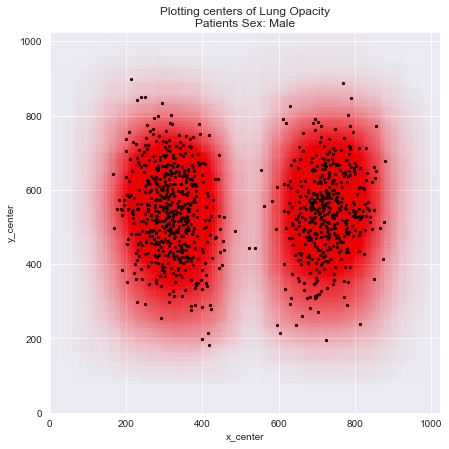

In [52]:
data_male = bboxes[bboxes['PatientSex'] == 'M'].sample(1000)
data_female = bboxes[bboxes['PatientSex'] == 'F'].sample(1000)

bboxes_scatter(data_male, "black", "red", "Patients Sex: Male")
     

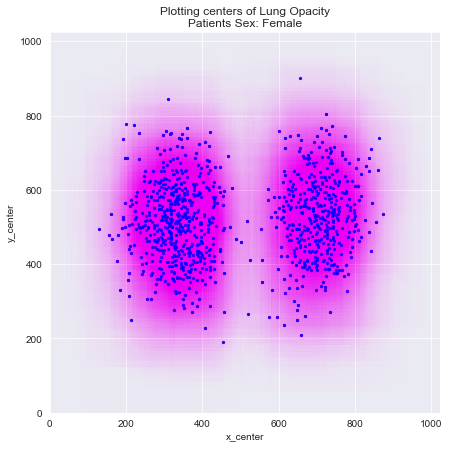

In [53]:
bboxes_scatter(data_female, "blue", "magenta", "Patients Sex: Female")
     

**Patient Age**

The analysis below will be based on the distribution iof population based on age.

The Minimum age group in or study is 1 year.

The maximum age patient recorded in dataset is of 155 years. (this seems to be an outlier interms of age record)

In [54]:
print('The minimum and maximum recorded age of the patients are {0} and {1} respectively.'.format(training_data['PatientAge'].min(), training_data['PatientAge'].max()))


The minimum and maximum recorded age of the patients are 1 and 155 respectively.


The number of outliers in `PatientAge` out of 30277 records are : 5

The ages which are in the outlier categories are : [148, 151, 153, 150, 155]



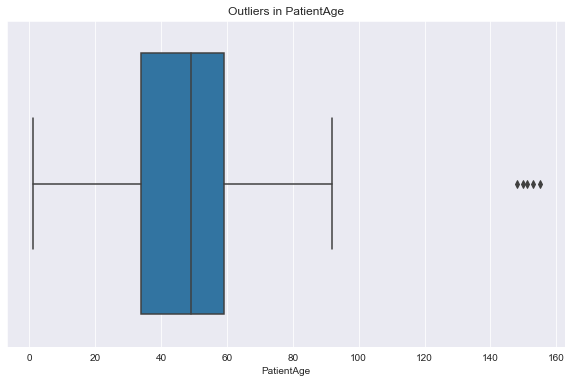

In [55]:
age_25 = np.percentile(training_data['PatientAge'], 25)
age_75 = np.percentile(training_data['PatientAge'], 75)
iqr_age = age_75 - age_25
cutoff_age = 1.5 * iqr_age

low_lim_age = age_25 - cutoff_age
upp_lim_age = age_75 + cutoff_age

outlier_age = [x for x in training_data['PatientAge'] if x < low_lim_age or x > upp_lim_age]
print('The number of outliers in `PatientAge` out of 30277 records are : {0}\n'.format(len(outlier_age)))
print('The ages which are in the outlier categories are : {0}\n'.format(outlier_age))

fig = plt.figure(figsize = (10, 6))
sns.boxplot(training_data['PatientAge'], orient = 'h').set_title('Outliers in PatientAge')
plt.show()

We see that the age group 148, 150, 151, 153 and 155 are incorrect entries. For our study, we take the **maximum gae of the patient to be of 100 Years.**


To confirm, we plot the distribution chart below to see the number of patients in a given age group.


## We understand that maximum numbers of patients recorded belong to 56-58 years of age.

Creating graph for : ['PatientAge']



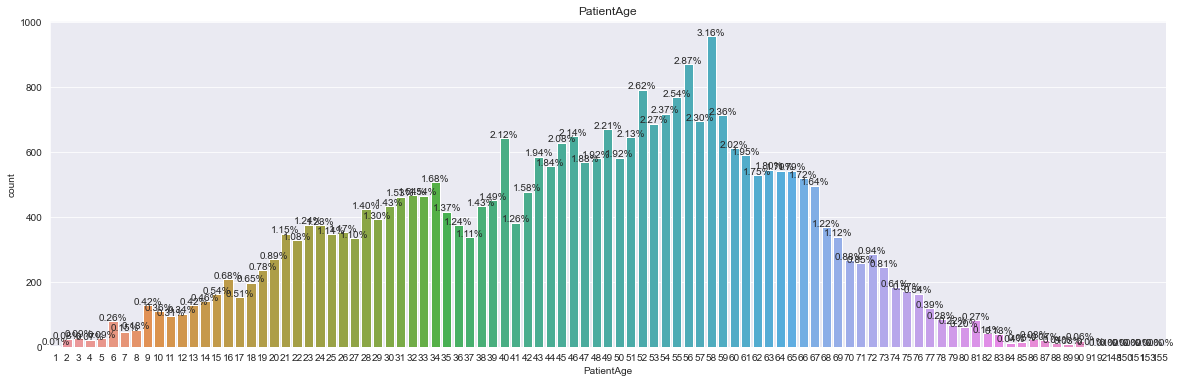

In [56]:
drawgraphs(data_file = training_data, columns = ['PatientAge'], width = 20, showdistribution = True)

In [57]:
print('Removing the outliers from `PatientAge`')
training_data['PatientAge'] = training_data['PatientAge'].clip(training_data['PatientAge'].min(), 100)
training_data['PatientAge'].describe().astype(int)
     

Removing the outliers from `PatientAge`


count     30227
unique       93
top          58
freq        955
Name: PatientAge, dtype: int32

In order to have a more clear idea, we will introduce a new column Patient Age Bin where the patients will be placed in an age group of 10.

Distribution of `PatientAge`: Overall and Target = 1



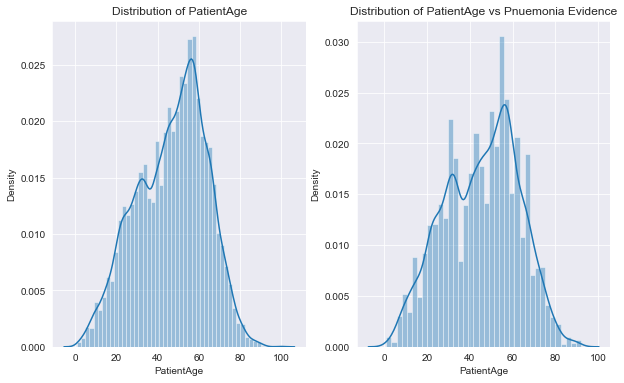

In [58]:
print('Distribution of `PatientAge`: Overall and Target = 1\n')
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(121)
g = (sns.distplot(training_data['PatientAge']).set_title('Distribution of PatientAge'))

ax = fig.add_subplot(122)
g = (sns.distplot(training_data.loc[training_data['Target'] == 1, 'PatientAge']).set_title('Distribution of PatientAge vs Pnuemonia Evidence'))

In [59]:
custom_array = np.linspace(0, 100, 11)
training_data['PatientAgeBins'] = pd.cut(training_data['PatientAge'], custom_array)
training_data['PatientAgeBins'].value_counts()

(50.0, 60.0]     7446
(40.0, 50.0]     5671
(60.0, 70.0]     4730
(30.0, 40.0]     4551
(20.0, 30.0]     3704
(10.0, 20.0]     1688
(70.0, 80.0]     1637
(0.0, 10.0]       515
(80.0, 90.0]      275
(90.0, 100.0]      10
Name: PatientAgeBins, dtype: int64

The max number of patients belong to age group (50,60] and least to (90,100].

In [60]:
print('After adding the bin column, the dataset turns out to be :\n')
training_data.head()
     

After adding the bin column, the dataset turns out to be :



patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

   number_of_boxes                         class  \
0                1  No Lung Opacity / Not Normal   
1                1  No Lung Opacity / Not Normal   
2                1  No Lung Opacity / Not Normal   
3                1                        Normal   
4                2                  Lung Opacity   

                                                path Modality PatientAge  \
0  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         51   
1  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         48   
2  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         19   
3  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         28   
4  C:/Users/ASUS/stage_2_train_images/stage_2_tra...       CR         32   

  PatientSex BodyPartExamined ViewPosition ConversionType  Rows Columns  \
0          F            CHEST           PA            WSD  1024    1024   
1          F            CHEST           PA            WSD  1024    1024   
2          M            CHEST           AP            WSD  1024    1024   
3          M            CHEST           PA            WSD  1024    1024   
4          F            CHEST           AP            WSD  1024    1024   

  PixelSpacing PatientAgeBins  
0        0.143   (50.0, 60.0]  
1        0.194   (40.0, 50.0]  
2        0.168   (10.0, 20.0]  
3        0.143   (20.0, 30.0]  
4        0.139   (30.0, 40.0]

Creating graph for : ['PatientAgeBins']



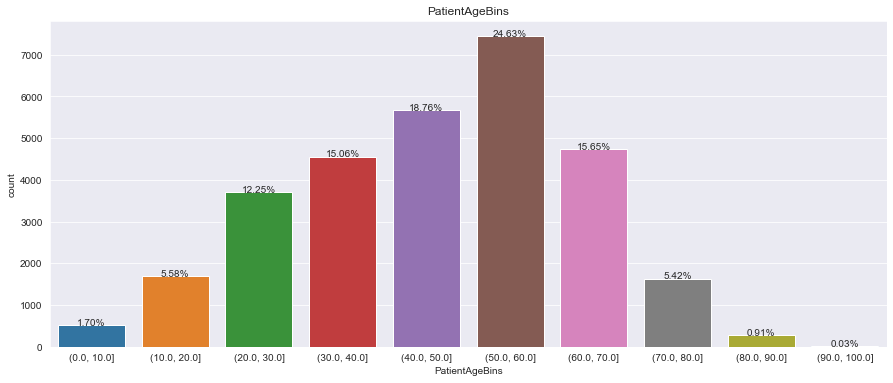

In [61]:
drawgraphs(data_file = training_data, columns = ['PatientAgeBins'], width = 15, showdistribution = True)

Creating graph for : ['PatientAgeBins'] and PatientSex



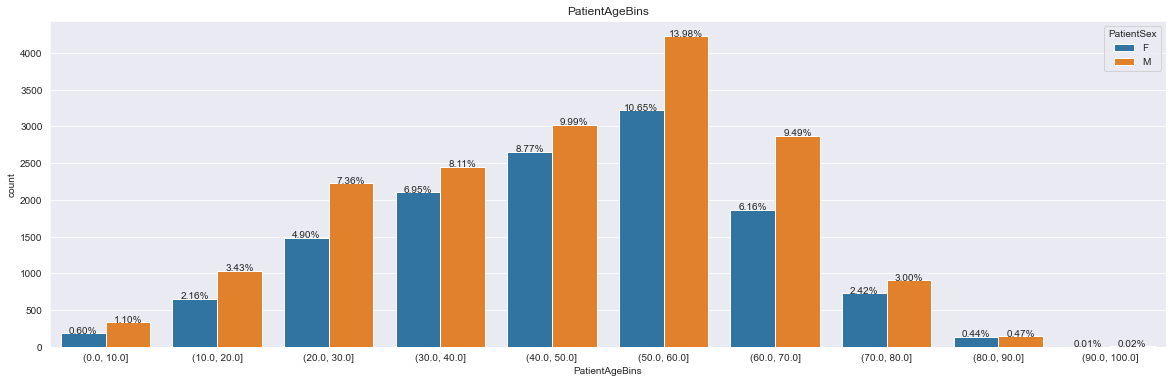

In [62]:
drawgraphs(data_file = training_data, columns = ['PatientAgeBins'], hue = 'PatientSex', width = 20, showdistribution = True)
     

Creating graph for : ['PatientAgeBins'] and class



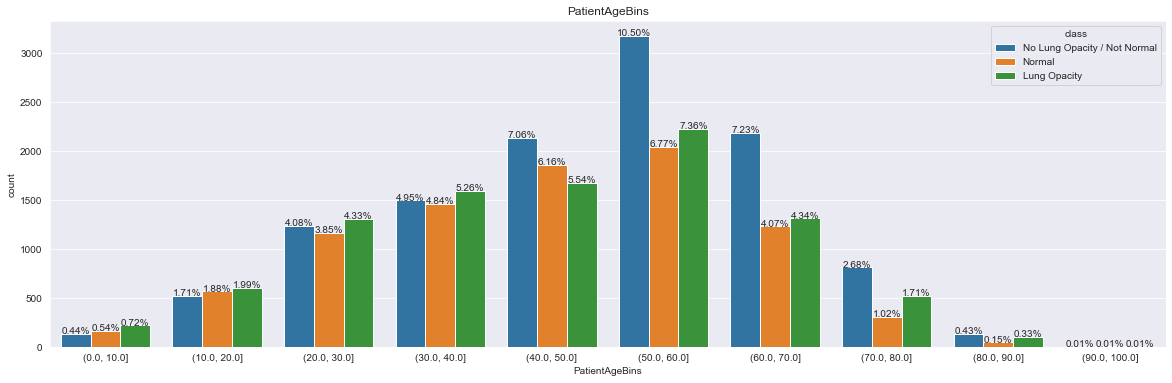

In [63]:
drawgraphs(data_file = training_data, columns = ['PatientAgeBins'], hue = 'class', width = 20, showdistribution = True)

Creating graph for : ['PatientAgeBins'] and Target



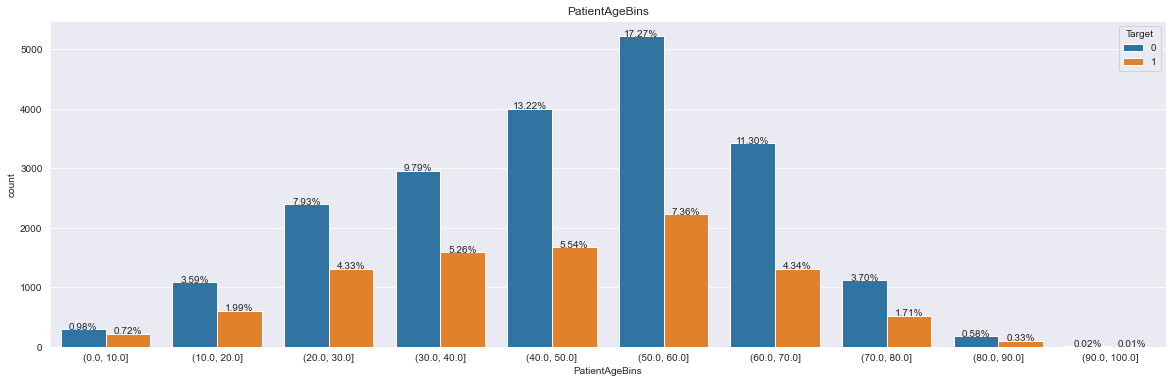

In [64]:
drawgraphs(data_file = training_data, columns = ['PatientAgeBins'], hue = 'Target', width = 20, showdistribution = True)

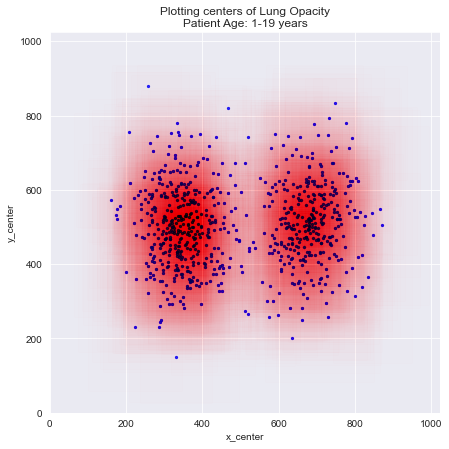

In [65]:
data_age_19 = bboxes[bboxes['PatientAge'] < 20]
data_age_20_34 = bboxes[(bboxes['PatientAge'] >= 20) & (bboxes['PatientAge'] < 35)]
data_age_35_49 = bboxes[(bboxes['PatientAge'] >= 35) & (bboxes['PatientAge'] < 50)]
data_age_50_64 = bboxes[(bboxes['PatientAge'] >= 50) & (bboxes['PatientAge'] < 65)]
data_age_65 = bboxes[bboxes['PatientAge'] >= 65]

bboxes_scatter(data_age_19,'blue', 'red', 'Patient Age: 1-19 years')

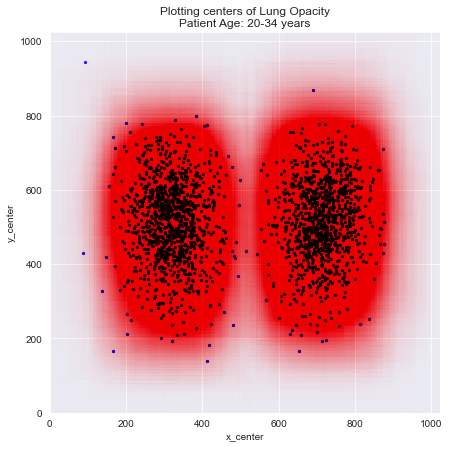

In [66]:
bboxes_scatter(data_age_20_34, 'blue', 'red', 'Patient Age: 20-34 years')

The maximum number of patients in our dataset are between 50-60 years of age contributing 24.63% of total population.

In this age group, the females cover 10.65% and males are 13.98%

The same agegroup also contains the highest number of patients with diagnosed Pneuonia contributing 17.27%.

The Scatter charts below describes the distribution of Bounding boxes and pneumonia detected regions based on the age-group.

The age division is as follows:

Less than 20 years

Between 20 and 35 years

Between 35 and 50 years

Between 50 and 65 years

Greater than 65%

**Plotting DICOM Images: To view the Training images, the DICOM image data is plotted.**

The images under CLass '0' belongs to the patients with no pneumonia detection. These patients have been cleared of this disease with no abnormility in chest x-ray.

Images with Class '1' are of patients with pneumonia. The image also depicts the area where the pneumonia has affected the lungs. These parts have been marked with blue bounding boxes.

In [67]:
def show_dicom_images(data, df, img_path):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3, 3, figsize = (16, 18))
  
    for i, row in enumerate(img_data):
        image = row['patientId'] + '.dcm'
        path = os.path.join(img_path, image)
        data = dicom.read_file(path)
        rows = df[df['patientId'] == row['patientId']]
        age = rows.PatientAge.unique().tolist()[0]
        sex = data.PatientSex
        part = data.BodyPartExamined
        vp = data.ViewPosition
        modality = data.Modality
        data_img = dicom.dcmread(path)
        ax[i//3, i%3].imshow(data_img.pixel_array, cmap = plt.cm.bone)
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nAge: {}, Sex: {}, Part: {}, VP: {}, Modality: {}\nTarget: {}, Class: {}\nWindow: {}:{}:{}:{}'\
                            .format(row['patientId'], age, sex, part,
                                    vp, modality, row['Target'],
                                    row['class'], row['x'],
                                    row['y'], row['width'],
                                    row['height']))
        box_data = list(rows.T.to_dict().values())
    
        for j, row in enumerate(box_data):
            ax[i//3, i%3].add_patch(Rectangle(xy = (row['x'], row['y']), width = row['width'], height = row['height'], color = 'red', alpha = 0.20))
    plt.show()
     

# VISUALIZING THE TARGET 0 IMAGES:

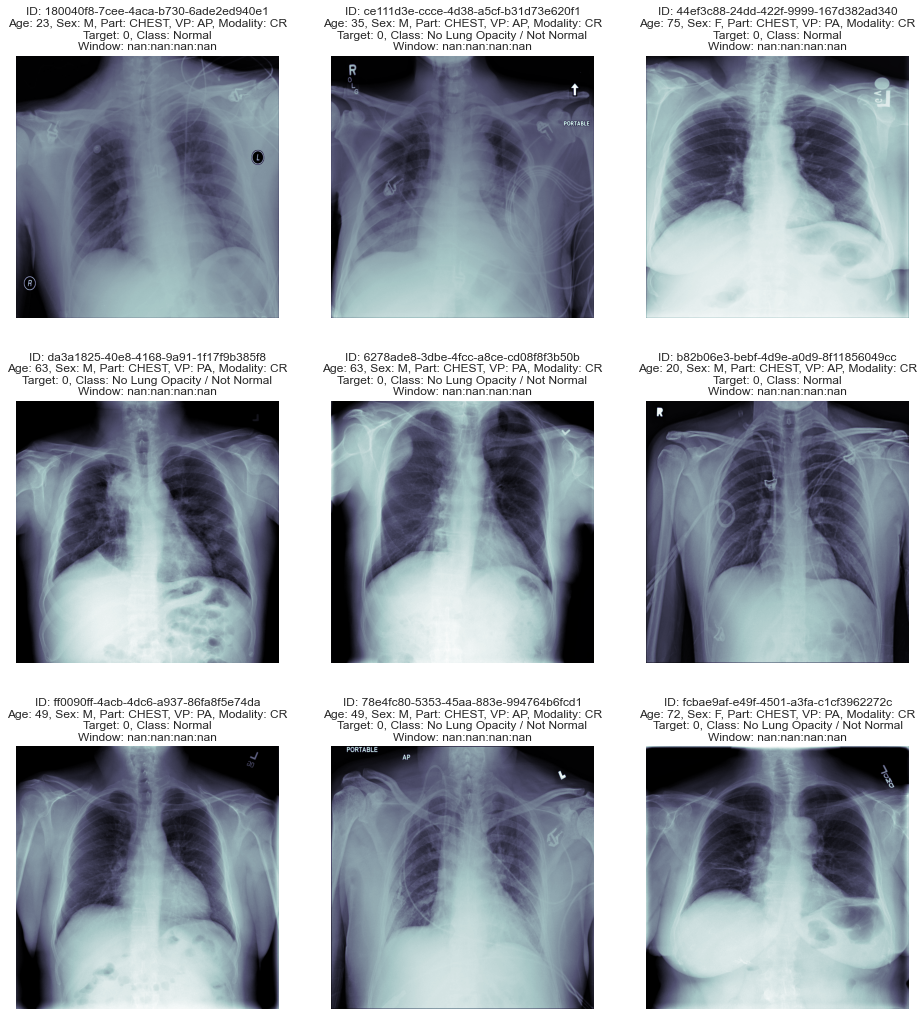

In [68]:
# For Target=0
show_dicom_images(data = training_data.loc[(training_data['Target'] == 0)].sample(9), df = training_data, img_path = 'C:/Users/ADMIN/stage_2_train_images/')

**As the above subplots are of the images which belong to either "Normal" or "No Lung Opacity / Not Normal", hence no bounding box is observed.**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Step 5: Display images with bounding box  </div>

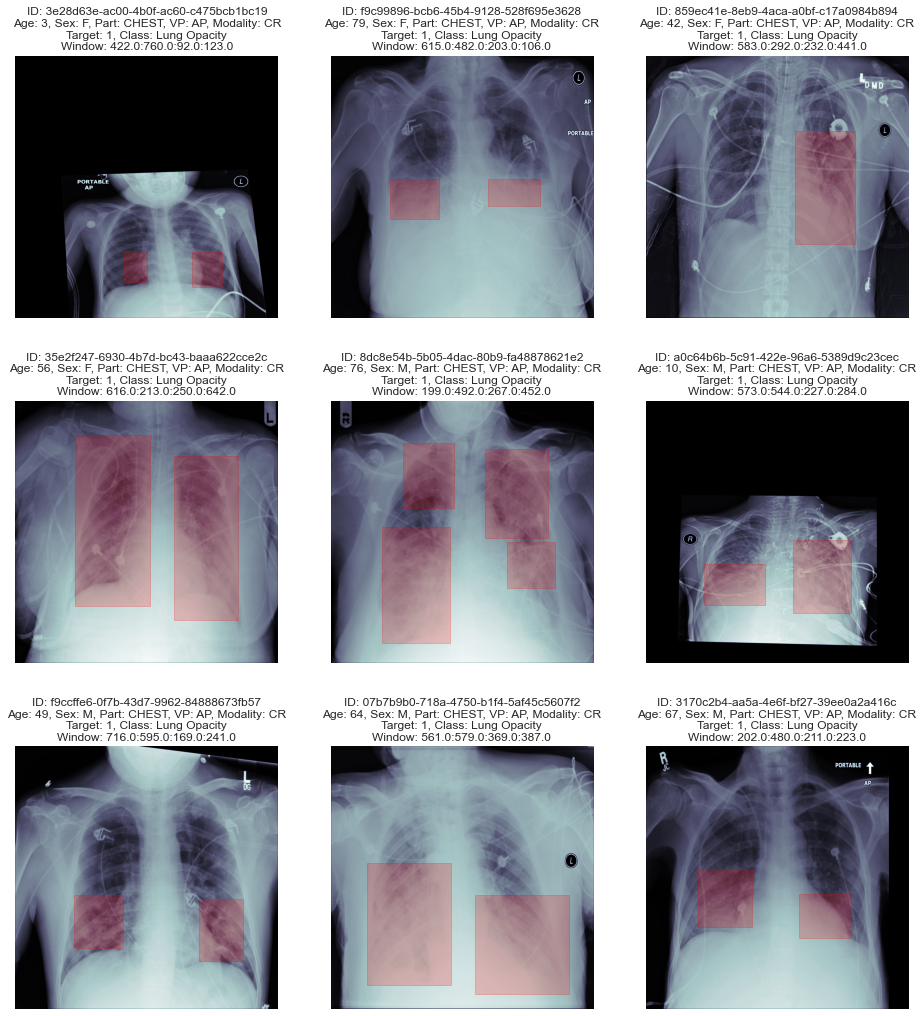

In [69]:
# For Target=1
show_dicom_images(data = training_data.loc[(training_data['Target'] == 1)].sample(9), df = training_data, img_path = 'C:/Users/ADMIN/stage_2_train_images/')
     

### As the above subplots are of the images which belong to either "Normal" or "No Lung Opacity / Not Normal", hence no bounding box is observed.

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Overview of the final process: </div>

### EDA: 

**The training dataset (both of the csv files and the training image folder) contains information of 26684 unique patients.**


**Out of these 26684 unique patients some of these have multiple entries in the both of the csv files.**


**Most of the recorded patient belong to Target = 0 (i.e., they don't have Pneumonia).**


**Some of the patients have more than one bounding box. The maximum being 4.**


**The classes "No Lung Opacity / Not Normal" and "Normal" is associated with Target = 0 whereas "Lung Opacity" belong to Target
= 1**


**The images are present in dicom format, from which information like PatientAge, PatientSex, ViewPosition etc are obtained**


**There are two ways from which images were obtained: AP and PA. The age ranges from 1-155 (which were further clipped to 100).**


**The centers of the bounding box are spread out over the entire region of the lungs. But there are some centers which are outliers.**

##  <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Step 6: Design, train and test basic CNN models for classification. : </div>


**In this section, we'll be building various models for Pneumonia detection.**

In [70]:
folders = ['stage_2_train_images', 'stage_2_test_images']
path = 'C:/Users/ADMIN'

# Checking the number of files in folders
for f in folders:
    print('No. of files in {0} : {1}'.format(f,len(os.listdir(os.path.join(path,f)))))
     

No. of files in stage_2_train_images : 26684
No. of files in stage_2_test_images : 3000


**This code iterates through the specified folders (stage_2_train_images and stage_2_test_images) and counts the number of files in each folder using the os.listdir() function. The path to the folders is constructed by joining the path variable with the current folder. The result is then printed to display the number of files in each folder.**



## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Creating new column names and mapping from the original Dataframe </div>

In [71]:
# Creating new column names and mapping from the original Dataframe
ColName = ['patientid','x1','y1','w1','h1','x2','y2','w2','h2','Target','Class','Gender']

# Iterating over patientId to get unique record
final_list=[]
for ids in np.unique(train_labels_df['patientId']):
    meta_info = dicom.read_file('C:/Users/ADMIN/stage_2_train_images/'+ids+'.dcm')
    if len(list(train_labels_df['x'][train_labels_df['patientId']==ids]))>1:  # We are considering only patientId with 2 bounding boxes
        ls=[]
        ls.append(ids)
        ls.append(list(train_labels_df[train_labels_df['patientId']==ids]['x'])[0])
        ls.append(list(train_labels_df[train_labels_df['patientId']==ids]['y'])[0])
        ls.append(list(train_labels_df[train_labels_df['patientId']==ids]['width'])[0])
        ls.append(list(train_labels_df[train_labels_df['patientId']==ids]['height'])[0])
        ls.append(list(train_labels_df[train_labels_df['patientId']==ids]['x'])[1])
        ls.append(list(train_labels_df[train_labels_df['patientId']==ids]['y'])[1])
        ls.append(list(train_labels_df[train_labels_df['patientId']==ids]['width'])[1])
        ls.append(list(train_labels_df[train_labels_df['patientId']==ids]['height'])[1])
        ls.append(list(train_labels_df[train_labels_df['patientId']==ids]['Target'])[1])
        ls.append(list(class_info_df[class_info_df['patientId']==ids]['class'])[0])
        ls.append(meta_info.PatientSex)
        final_list.append(ls)
    else:
        ls=[ids,0,0,0,0,0,0,0,0,0]
        ls.append(list(class_info_df[class_info_df['patientId']==ids]['class'])[0])
        ls.append(meta_info.PatientSex)
        final_list.append(ls)

# Saving the dataframe
final_df = pd.DataFrame(final_list, columns=ColName)
     

**In this code, we iterate over the unique patientId values from the train_labels dataframe. For each patientId, we extract the relevant information from train_labels and class_labels dataframes, and also read the DICOM image metadata using pydicom. We then construct a list of lists (final_list) where each sublist represents a row in the new dataframe. Finally, we create a pandas DataFrame (final_df) using final_list and assign the column names from ColName.**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Removing rows with class label 'No Lung Opacity / Not Normal </div>

- **"No Lung Opacity / Not Normal" class has been removed from the dataset and the remaining classes are "Lung Opacity" and         "Normal," it suggests that the focus of the analysis is to differentiate between these two classes.**

- **The reason for removing the "No Lung Opacity / Not Normal" class could be that it represents cases that are not relevant to     the specific task at hand. By removing this class, the dataset becomes more streamlined and targeted towards the specific       problem of distinguishing between lung opacity and normal cases.**

- **Removing irrelevant or unrelated classes can help simplify the classification task and improve the model's ability to learn     the patterns and characteristics specific to the classes of interest. It allows the model to focus solely on differentiating     between "Lung Opacity" and "Normal" cases, which can potentially enhance its performance.**

- **However, it's important to ensure that the decision to remove a class aligns with the objectives and requirements of the         analysis and that it doesn't result in the loss of valuable information or bias in the dataset.**

In [72]:
# Remove rows with class label 'No Lung Opacity / Not Normal'
final_df = final_df[final_df['Class'] != 'No Lung Opacity / Not Normal']


print('The final_df has {0} rows and {1} columns.\n'.format(final_df.shape[0],final_df.shape[1]))
# First 5 rows of dataframe
final_df.head(5)

The final_df has 14863 rows and 12 columns.



patientid     x1     y1     w1     h1     x2  \
1  000924cf-0f8d-42bd-9158-1af53881a557    0.0    0.0    0.0    0.0    0.0   
2  000db696-cf54-4385-b10b-6b16fbb3f985  316.0  318.0  170.0  478.0  660.0   
3  000fe35a-2649-43d4-b027-e67796d412e0  570.0  282.0  269.0  409.0   83.0   
4  001031d9-f904-4a23-b3e5-2c088acd19c6   66.0  160.0  373.0  608.0  552.0   
5  0010f549-b242-4e94-87a8-57d79de215fc    0.0    0.0    0.0    0.0    0.0   

      y2     w2     h2  Target         Class Gender  
1    0.0    0.0    0.0       0        Normal      F  
2  375.0  146.0  402.0       1  Lung Opacity      F  
3  227.0  296.0  438.0       1  Lung Opacity      M  
4  164.0  376.0  676.0       1  Lung Opacity      M  
5    0.0    0.0    0.0       0        Normal      M

**This code filters the rows of the DataFrame where the 'Class' column is not equal to "No Lung Opacity / Not Normal" and assigns the filtered DataFrame back to final_df. Then it prints the shape of the dataset using the shape attribute and displays the head of the dataset using the head() function.**

In [73]:
# Class distribution
final_df.groupby('Target').count()['Class']
     

Target
0    11465
1     3398
Name: Class, dtype: int64

**Data pre-processing is first step for any AI ML problem and this step is very important for the prediction power of any model. Here we have images in dicom format so first we need to save them in an array so that we could train model with that and secondly we got images in HD resolution which is 1024x1024 so we need to downsize to 128x128,reason for using 128 size images is that we will be using Transfer Learning model called MobileNet pretrained on ImageNet Dataset. Since this problem is not only about prediction of classes (classification problem) also we need to predict coordinates of bounding boxes. So, we will be using UNET architecture for the problem solution. For this we created a user defined function and that function return training images array(X_train) with corresponding mask and target variable.**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Reducing the size of the images </div>

In [74]:
def image_resizer_mask_generator(path, new_im_w, new_im_h):
    listing = [x + '.dcm' for x in final_df['patientid'].unique()]
    batch_size = 100  # Adjust the batch size as per your available memory

    # Initialize X_train
    X_train = np.zeros((len(listing), new_im_w, new_im_h, 3), dtype=np.float32)
    # Initialize Mask
    mask = np.zeros((len(listing), new_im_w, new_im_h), dtype=np.uint8)
    # Initialize Target
    target = np.zeros(len(listing), dtype=np.uint8)

    for batch_start in range(0, len(listing), batch_size):
        batch_end = min(batch_start + batch_size, len(listing))
        batch_images = listing[batch_start:batch_end]

        for index, img_file in enumerate(batch_images):
            os.chdir(os.path.join(path, 'C:/Users/ADMIN/stage_2_train_images'))
            img = dicom.dcmread(img_file)  # Read Dicom image
            img_arr = img.pixel_array
            img_arr = np.stack([img_arr] * 3, axis=2)  # Convert to 3 channels
            orig_im_h, orig_im_w, _ = img_arr.shape
            img_arr_resize = cv2.resize(img_arr, (new_im_w, new_im_h))
            # Feed to X_train
            X_train[batch_start + index] = np.array(img_arr_resize, dtype=np.float32)
            ids = img_file.replace('.dcm', '')
            ids, x1, y1, w1, h1, x2, y2, w2, h2, tgt, label = [np.array(final_df[final_df['patientid'] == ids])[0][i] for i in range(11)]
            target[batch_start + index] = tgt
            if x1 > 0:
                ratio_w = new_im_w / orig_im_w
                ratio_h = new_im_h / orig_im_h
                new_x1 = int(x1 * ratio_w)
                new_y1 = int(y1 * ratio_h)
                new_x2 = int(x2 * ratio_w)
                new_y2 = int(y2 * ratio_h)
                new_w1 = int(w1 * ratio_w)
                new_h1 = int(h1 * ratio_h)
                new_w2 = int(w2 * ratio_w)
                new_h2 = int(h2 * ratio_h)
                mask[batch_start + index][new_y1:new_y1+new_h1, new_x1:new_x1+new_w1] = 1
                mask[batch_start + index][new_y2:new_y2+new_h2, new_x2:new_x2+new_w2] = 1

    return X_train, mask, target


**Here's an explanation of the code:**

>1) The function takes three positional arguments: path, new_im_w, and new_im_h. These arguments represent the path to the image     directory, the desired width and height for the resized images.

>2) The function initializes the listing variable with a list of DICOM filenames obtained from the unique patient IDs in the         final_df DataFrame.

>3) The batch_size variable is defined to control the number of images processed at a time. You can adjust this value based on       the available memory.

>4) Three arrays are initialized:
    - X_train: This array will store the resized images. It is initialized with zeros and has a shape of (len(listing),               new_im_w,     new_im_h, 3) to accommodate the resized RGB images. The dtype is set to np.float32.
    - mask: This array will store the masks for the bounding boxes. It is also initialized with zeros and has a shape of               (len(listing), new_im_w, new_im_h). The dtype is set to np.uint8.
    - target: This array will store the target labels. It is initialized with zeros and has a length of len(listing). The dtype       is set to np.uint8.
    

>5) The code then proceeds to process the images in batches using a for loop. The loop starts at batch_start = 0 and increments     by batch_size until the end of the listing array is reached.

>6) Within each batch, the loop extracts the corresponding batch of image filenames.

>7) For each image in the batch, the code reads the DICOM image using dicom.dcmread and retrieves its pixel array.

>8) The pixel array is stacked along the third axis to convert it into a 3-channel RGB image.

>9) The original height and width of the image are obtained from the stacked image array.

>10) The image is then resized using cv2.resize to the specified new_im_w and new_im_h dimensions.

>11) The resized image is stored in the X_train array at the appropriate index.

>12) The corresponding target label is retrieved from the final_df DataFrame and stored in the target array.

>13) If the bounding box coordinates x1, y1, w1, h1, x2, y2, w2, h2 are greater than 0, indicating the presence of bounding          boxes, the code calculates the scaled coordinates based on the resizing ratios.

>14) The mask array is updated accordingly to mark the regions within the bounding boxes as 1.

>15) After processing all the images in the batch, the loop continues to the next batch until all images have been processed.

>16) Finally, the function returns the X_train, mask, and target arrays.

**This function essentially performs the image resizing, target label extraction, and mask generation for the images in batches   to mitigate memory limitations and improve processing efficiency.**

In [75]:
# Continue from the previous code

# Define the batch size as a global variable
batch_size = 50

# Resizing images to 128 x 128
X_train, mask, target = image_resizer_mask_generator('C:/Users/ADMIN', 128, 128)

# Print the shapes of the arrays
print('X_train shape:', X_train.shape)
print('Mask shape:', mask.shape)
print('Target shape:', target.shape)


X_train shape: (14863, 128, 128, 3)
Mask shape: (14863, 128, 128)
Target shape: (14863,)


> 1) The code starts by defining the batch size as a global variable batch_size with a value of 50. This variable determines the      number of images processed in each batch.

> 2) The function call image_resizer_mask_generator('/Users/ADMIN', 128, 128) resizes the images to a width and height of            128x128 pixels using the previously defined image_resizer_mask_generator function.

> 3) The resized images, masks, and target labels are assigned to the variables X_train, mask, and target, respectively.

> 4) The code then prints the shapes of the arrays using the shape attribute:

- X_train.shape returns the shape of the X_train array, which represents the resized images. It will be in the format (number of   images, new_im_w, new_im_h, 3) because the images are resized to 128x128 pixels and have 3 channels (RGB).

- mask.shape returns the shape of the mask array, which represents the masks for the bounding boxes. It will be in the format     (number of images, new_im_w, new_im_h) because the masks are also resized to 128x128 pixels.

- target.shape returns the shape of the target array, which represents the target labels. It will be a one-dimensional array       with a length equal to the number of images.

**This code segment performs the image resizing, mask generation, and target label extraction for the images in the specified directory. It then prints the shapes of the resulting arrays to verify the dimensions of the processed data.**

**Since we also observed that data distribution is imbalanced for this, we wrote a script which first separate out two classes images into separate variable then combine full set of images with target label 1 and a subset of randomly picked images with label 0(that subset must be of length equal to the length of the full set for target 1) For instance, if we have 10 images with target label 1 and 100 images with target label 0 then below script will take all 10 images with label 1 and 10 randomly chosen images without replacement from the set of 100 images with label 0 and combine them to create a balanced set of 20 images. So this way we are able to get 1:1 distribution of classes.**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Down sampling the data to match the both classes </div>

In [76]:
# Split target = 0
X_train_0 = X_train[target == 0]
mask_0 = mask[target == 0]
target_0 = target[target == 0]
print('Length for Target=0:', len(target_0))

# Split target = 1
X_train_1 = X_train[target == 1]
mask_1 = mask[target == 1]
target_1 = target[target == 1]
print('Length for Target=1:', len(target_1))

# Print unique values in the target array
print('Unique target values:', np.unique(target))


Length for Target=0: 11465
Length for Target=1: 3398
Unique target values: [0 1]


In [77]:
# Define the desired number of samples for each class
desired_samples = len(target_1)

# Randomly select a subset of samples from the majority class (class 0)
indices = np.random.choice(len(target_0), desired_samples, replace=False)
X_train_0_balanced = X_train_0[indices]
mask_0_balanced = mask_0[indices]
target_0_balanced = target_0[indices]

# Concatenate the balanced samples from both classes
X_train_balanced = np.concatenate((X_train_0_balanced, X_train_1), axis=0)
mask_balanced = np.concatenate((mask_0_balanced, mask_1), axis=0)
target_balanced = np.concatenate((target_0_balanced, target_1), axis=0)

# Shuffle the data
shuffle_indices = np.random.permutation(len(X_train_balanced))
X_train_balanced = X_train_balanced[shuffle_indices]
mask_balanced = mask_balanced[shuffle_indices]
target_balanced = target_balanced[shuffle_indices]

# Print the shapes of the balanced arrays
print('X_train_balanced shape:', X_train_balanced.shape)
print('Mask_balanced shape:', mask_balanced.shape)
print('Target_balanced shape:', target_balanced.shape)


X_train_balanced shape: (6796, 128, 128, 3)
Mask_balanced shape: (6796, 128, 128)
Target_balanced shape: (6796,)


**In this code, we randomly select a subset of samples from target_0 with the same length as target_1. Then, we concatenate the balanced samples from both classes to create the final balanced data. Finally, we shuffle the data to ensure randomness.
Please note that if the number of samples in the majority class (class 0) is much larger than the number of samples in the minority class (class 1), the balanced dataset may still have a larger number of samples from class 0 compared to class 1.**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Perform one-hot encoding on the target variable </div>

In [78]:
from keras.utils import to_categorical
# One hot encoding target variable
target_encoded = tf.keras.utils.to_categorical(target_balanced, num_classes=2)


In [79]:
# Shuffling the whole data
from sklearn.utils import shuffle
X_train_balanced, mask_balanced, target_encoded = shuffle(X_train_balanced, mask_balanced, target_encoded)
     

In [80]:
# Deleted variables to save memory
del X_train
del mask
del target
     

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Split data into Training and evaluation (test)  </div>

**Before training the model, we need to divide whole set into training and evaluation set and here for Classification model we took first 5000 images as training set and remaining images is for evaluation of the performance on unseen data. And for the prediction of bounding boxes using UNET architecture we are using different set for training and evaluation. As we thought that if the person is normal then we don’t need to do any prediction of boxes for those images. Hence, we are feeding only those images which has some abnormality present and for them we need to highlight those affected area via bounding boxes. So, for UNET we created another set containing only images with target as 1 (Lung Opacity) and tried to predict mask and bounding boxes thereafter. For Evaluation set we took first 10 images and remaining images for training the UNET model.**

In [81]:
# Taking the first 5000 records for training and the rest for evaluation
Train_X = X_train_balanced[:5000]
Eval_X = X_train_balanced[5000:]

Train_y = target_encoded[:5000]
Eval_y = target_encoded[5000:]

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Custom functions for modelling </div>

In [82]:
# Function to plot accuracy and loss
def plot_accuracy_loss(history, model_type='UNET'):
    plt.figure(figsize=(20,6))

    # Plotting the Train accuracy, Validation accuracy vs number of Epochs
    plt.subplot(1, 2, 1)
    if(model_type=='CLF'):
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.ylabel('Accuracy')
    else:
        plt.plot(history.history['dice_coefficient'])
        plt.plot(history.history['val_dice_coefficient'])
        plt.ylabel('Dice Coefficient')
    plt.xlabel('Epoch')
    plt.title('Model Accuracy')
    plt.legend(['Train Accuracy', 'Val Accuracy'], loc='lower right')

    # Plotting the Train loss, Validation loss vs number of Epochs
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss', 'Val Loss'], loc='upper right')

    plt.show()
     

**Here's an explanation of the code:**

- It creates a figure with a size of (20, 6) to accommodate two subplots side by side.

- The first subplot (on the left) is for plotting accuracy. If the model_type parameter is set to "CLF" (classification model),   it plots the accuracy and val_accuracy values from the history object. Otherwise, if the model_type is not "CLF" (assuming       it's a UNET model), it plots the dice_coefficient and val_dice_coefficient values.

- The ylabel for the first subplot is set to "Accuracy" if model_type is "CLF", and "Dice Coefficient" if it's not.

- The xlabel is set to "Epoch", and the title of the subplot is set to "Model Accuracy".

- A legend is added to the lower right corner, indicating the "Train Accuracy" and "Val Accuracy" curves.

- The second subplot (on the right) is for plotting loss. It plots the loss and val_loss values from the history object.

- The ylabel is set to "Loss", the xlabel to "Epoch", and the title to "Model Loss".

- A legend is added to the upper right corner, indicating the "Train Loss" and "Val Loss" curves.

- Finally, the plots are displayed using plt.show().
  By using this function, you can easily visualize the training progress of your model by plotting the accuracy and loss curves.

In [83]:
# Model Evaluation
def evaluate_model(model, Eval_X, Eval_y, Train_X, Train_y, model_type='UNET'):
    eval_results = model.evaluate(Eval_X, Eval_y)
    train_results = model.evaluate(Train_X, Train_y)
    if(model_type=='CLF'):
        print('Accuracy on Eval set = {0:.2f}% & Loss on Eval set = {1:.4f}'.format(eval_results[1]*100, eval_results[0]))
        train_acc = round(train_results[1]*100, 2)
        eval_acc = round(eval_results[1]*100, 2)
    else:
        print('Dice Coefficient on Eval set = {0:.4f} & Loss on Eval set = {1:.4f}'.format(eval_results[1], eval_results[0]))
        train_acc = round(train_results[1], 4)
        eval_acc = round(eval_results[1], 4)

    train_loss = round(train_results[0], 4)
    eval_loss = round(eval_results[0], 4)

    return eval_acc, eval_loss, train_acc, train_loss
     

**Here's an explanation of the code:**

1) It takes the following inputs:

- model: The trained model to evaluate.

- Eval_X: The evaluation data features.

- Eval_y: The evaluation data target labels.

- Train_X: The training data features.

- Train_y: The training data target labels.

- model_type (optional): Specifies the type of the model. If set to "CLF", it indicates a classification model, otherwise it       assumes a UNET model.

2) It calls the evaluate method of the model to obtain the evaluation results (eval_results) on the evaluation set (Eval_X,        Eval_y).
 
3) It also calls the evaluate method of the model to obtain the evaluation results (train_results) on the training set (Train_X,    Train_y).

4) If model_type is "CLF" (classification model), it prints the accuracy on the evaluation set and the loss on the evaluation     set, formatted with two decimal places.

5) If model_type is not "CLF" (UNET model), it prints the dice coefficient on the evaluation set and the loss on the evaluation    set, formatted with four decimal places.

6) It calculates and assigns the rounded values of the training accuracy (train_acc), evaluation accuracy (eval_acc), training      loss (train_loss), and evaluation loss (eval_loss).

7) Finally, it returns the evaluation accuracy, evaluation loss, training accuracy, and training loss as output.

**By using this function, you can evaluate the performance of your model on both the evaluation set and the training set, and obtain the accuracy and loss values for further analysis or comparison.**

In [84]:
# Dictionary to store the models, scores & loss
clf_model_scores = {'Model':[], 'Train Score':[], 'Eval Score':[], 'Train Loss':[], 'Eval Loss':[]}
unet_model_scores = {'Model':[], 'Train Score':[], 'Eval Score':[], 'Train Loss':[], 'Eval Loss':[]}

**Here's an explanation of the code:**

1) clf_model_scores is a dictionary that stores the scores and loss values for classification models.

- Model: An empty list that will store the names of the classification models.

- Train Score: An empty list that will store the training scores (accuracy) of the classification models.

- Eval Score: An empty list that will store the evaluation scores (accuracy) of the classification models.

- Train Loss: An empty list that will store the training loss values of the classification models.

- Eval Loss: An empty list that will store the evaluation loss values of the classification models.

2) unet_model_scores is a dictionary that stores the scores and loss values for UNET models.

- Model: An empty list that will store the names of the UNET models.

- Train Score: An empty list that will store the training scores (dice coefficient) of the UNET models.

- Eval Score: An empty list that will store the evaluation scores (dice coefficient) of the UNET models.

- Train Loss: An empty list that will store the training loss values of the UNET models.

- Eval Loss: An empty list that will store the evaluation loss values of the UNET models.

**These dictionaries can be used to store the performance metrics of multiple models, making it convenient to compare and analyze the results later on. As the models are evaluated, their names, training scores, evaluation scores, training loss, and evaluation loss can be appended to the respective lists in the dictionaries. This allows for easy tracking and organization of the model results.**

In [85]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def clf_report_and_conf_matrix(model, Eval_X, Eval_y):
    prediction = model.predict(Eval_X)  # Predict using the model
    y_pred = np.argmax(prediction, axis=1)
    y_actual = np.argmax(Eval_y, axis=1)
    print('Classification Report:\n')
    print(classification_report(y_actual, y_pred))  # Print Classification report
    print('\n')

    # Confusion matrix to evaluate the accuracy of a classification
    cm = confusion_matrix(y_actual, y_pred)
    df_cm = pd.DataFrame(cm, 
                        index = [i for i in ['Non-Pneumonia','Pneumonia']],
                        columns = [i for i in ['Non-Pneumonia','Pneumonia']])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g', cmap='winter_r', linewidths=1)  # Display confusion matrix
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()
     

**Here's an explanation of the code:**

1) The function takes three parameters:

- model: The trained classification model.

- Eval_X: The evaluation dataset features.

- Eval_y: The evaluation dataset target variables.

2) The function starts by making predictions on the evaluation dataset using the provided model

3) Next, it converts the predictions and actual target variables from one-hot encoded format to class labels:

4) The classification report is then printed using the classification_report function from the sklearn.metrics module

5) After printing the classification report, a confusion matrix is computed using the confusion_matrix function from the            sklearn.metrics module. The confusion matrix provides an evaluation of the model's accuracy

6) The confusion matrix is converted to a pandas DataFrame and visualized using a heatmap plot

**This function allows you to evaluate the performance of a classification model by displaying the classification report and visualizing the confusion matrix, which provides insights into the model's predictions and accuracy.**

In [86]:
# Applying callbacks

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode='min')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=1e-6, mode='min')
# checkpoint = tf.keras.callbacks.ModelCheckpoint('model-{loss:.2f}.h5', monitor='loss', save_best_only=True, save_weights_only=True, mode='min', save_freq=1)
     

**Here's an explanation of the code:**

**EarlyStopping Callback:**

- EarlyStopping is a callback that stops the training process if a monitored metric (in this case, 'loss') stops improving.

**Parameters:**
- monitor='loss': The metric to monitor for improvement.

- patience=5: The number of epochs with no improvement after which training will be stopped.

- mode='min': The direction of improvement to be monitored ('min' for loss minimization, 'max' for accuracy maximization).
     
**ReduceLROnPlateau Callback:**

- ReduceLROnPlateau is a callback that reduces the learning rate when a monitored metric (in this case, 'loss') stops improving.
- Parameters:
- monitor='loss': The metric to monitor for improvement.

- factor=0.2: The factor by which the learning rate will be reduced (new_lr = old_lr * factor).

- patience=5: The number of epochs with no improvement after which the learning rate will be reduced.

- min_lr=1e-6: The lower bound of the learning rate.

- mode='min': The direction of improvement to be monitored ('min' for loss minimization, 'max' for accuracy maximization).

- ModelCheckpoint Callback (commented out):

**ModelCheckpoint is a callback that saves the model weights during training.**
- Parameters:

- filepath: The filepath to save the model weights.

- monitor='loss': The metric to monitor for saving the best model weights.

- save_best_only=True: Saves only the best model weights based on the monitored metric.

- save_weights_only=True: Saves only the model weights (not the entire model).

- mode='min': The direction of improvement to be monitored ('min' for loss minimization, 'max' for accuracy maximization).

- save_freq=1: Specifies the frequency at which the model weights will be saved (1 for every epoch).

**In the provided code, the early_stop and reduce_lr callbacks are created, while the ModelCheckpoint callback is commented out. These callbacks can be passed to the fit function of a Keras model to control the training process and optimize model performance.**

In [87]:
# Define Dice Coefficient
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

# Define Loss function
def loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) - tf.keras.backend.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

**Here's an explanation of the code:**

1) dice_coefficient(y_true, y_pred): This function calculates the Dice coefficient, which is a similarity metric commonly used in image segmentation tasks.

- Parameters:

- y_true: The true labels or ground truth.

- y_pred: The predicted labels or segmentation mask.
Steps:

- It calculates the numerator of the Dice coefficient by multiplying the element-wise multiplication of y_true and y_pred by 2.

- It calculates the denominator of the Dice coefficient by summing the element-wise addition of y_true and y_pred.

- It returns the Dice coefficient by dividing the numerator by the denominator, along with adding tf.keras.backend.epsilon() to   avoid division by zero errors.

2) loss(y_true, y_pred): This function defines a custom loss function that combines the binary cross-entropy loss and the          logarithm of the Dice coefficient.

- Parameters:

- y_true: The true labels or ground truth.

- y_pred: The predicted labels or segmentation mask.

- Steps:
- It calculates the binary cross-entropy loss using tf.keras.losses.binary_crossentropy.

- It calculates the Dice coefficient using the previously defined dice_coefficient function.

- It subtracts the logarithm of the Dice coefficient from the binary cross-entropy loss.

- It returns the combined loss value.

**These functions are typically used in segmentation tasks, where the goal is to segment an image into different regions or objects. The Dice coefficient provides a measure of similarity between the predicted segmentation and the ground truth, and the loss function is used to optimize the model during training by encouraging accurate segmentation.**

## <div style="background-color:#F3C130;font-size:30px;padding:10px 10px;color:black;border:4px solid #1C1B20">Basic CNN Model</div>

In [88]:
# Apply Pre-processing
Train_X_clf_1 = tf.keras.applications.mobilenet.preprocess_input(np.copy(Train_X))
Eval_X_clf_1 = tf.keras.applications.mobilenet.preprocess_input(np.copy(Eval_X))
     

**Here's an explanation of the code:**

**Train_X_clf_1 = tf.keras.applications.mobilenet.preprocess_input(np.copy(Train_X)):**

- Train_X: The training set input data.

- np.copy(Train_X): Creates a copy of the training set input data to avoid modifying the original data.

- tf.keras.applications.mobilenet.preprocess_input: This function is provided by the MobileNet pre-trained model in Keras. It     performs pre-processing specific to the MobileNet model, such as scaling the input values and normalizing the input data.

- The pre-processed training set input data is stored in the variable Train_X_clf_1.

**Eval_X_clf_1 = tf.keras.applications.mobilenet.preprocess_input(np.copy(Eval_X)):**

- Eval_X: The evaluation set input data.

- np.copy(Eval_X): Creates a copy of the evaluation set input data to avoid modifying the original data.

- tf.keras.applications.mobilenet.preprocess_input: This function is used to pre-process the evaluation set input data using the   same pre-processing steps as described above.

- The pre-processed evaluation set input data is stored in the variable Eval_X_clf_1.

**The MobileNet pre-processing function ensures that the input data is properly pre-processed according to the requirements of the MobileNet model. This pre-processing step is typically performed before feeding the data into the model for training or evaluation.**

In [89]:

# Basic CNN Model Architecture
model_clf_1 = tf.keras.models.Sequential()

# Add the first convolutional layer
model_clf_1.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(128, 128, 3)))
# Add the first pooling layer
model_clf_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model_clf_1.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
# Add the second pooling layer
model_clf_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer
model_clf_1.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
# Add the third pooling layer
model_clf_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layer
model_clf_1.add(tf.keras.layers.Flatten())

# Add a fully connected (dense) layer
model_clf_1.add(tf.keras.layers.Dense(64, activation='relu'))

# Add the output layer with 2 units for binary classification
model_clf_1.add(tf.keras.layers.Dense(2, activation='softmax'))

# Print the model summary
model_clf_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

### model architecture:

__The model_clf_1 is a basic convolutional neural network (CNN) architecture for binary classification of pneumonia and non-       pneumonia chest X-ray images. Here's a summary of the model:__

- **Input shape: (128, 128, 3) - Images of size 128x128 pixels with 3 color channels (RGB).**

- **Convolutional layers:**

- **Conv2D with 32 filters, kernel size of 3x3, stride of 1x1, and "same" padding.**

- **MaxPooling2D with a pooling size of 2x2 to reduce spatial dimensions.**

- **Conv2D with 64 filters, kernel size of 3x3, stride of 1x1, and "same" padding.**

- **MaxPooling2D to further reduce spatial dimensions.**

- **Conv2D with 128 filters, kernel size of 3x3, stride of 1x1, and "same" padding.**

- **MaxPooling2D for spatial downsampling.**

- **Flatten layer: Flattens the output from the previous convolutional layers into a 1-dimensional vector.**

__Fully connected layers:__

- **Dense layer with 64 neurons and ReLU activation function.**

__Output layer:__

- **Dense layer with 2 neurons and softmax activation function for binary classification.**

**The model has a total of 2,190,294 trainable parameters, which are learned during training to optimize the model's performance. The summary provides an overview of the model's architecture, including the number of parameters in each layer and the output shape at each step.**

In [90]:
# Define optimizer and compile the model
model_clf_1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [91]:
# Fit the model
history_clf_1 = model_clf_1.fit(Train_X_clf_1, Train_y, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop, reduce_lr])
     

Epoch 1/30
125/125 [==============================] - 48s 356ms/step - loss: 0.5809 - accuracy: 0.7327 - val_loss: 0.4885 - val_accuracy: 0.7910 - lr: 1.0000e-05
Epoch 2/30
125/125 [==============================] - 43s 347ms/step - loss: 0.4710 - accuracy: 0.7945 - val_loss: 0.4504 - val_accuracy: 0.8100 - lr: 1.0000e-05
Epoch 3/30
125/125 [==============================] - 40s 323ms/step - loss: 0.4490 - accuracy: 0.8027 - val_loss: 0.4386 - val_accuracy: 0.8160 - lr: 1.0000e-05
Epoch 4/30
125/125 [==============================] - 45s 358ms/step - loss: 0.4390 - accuracy: 0.8110 - val_loss: 0.4393 - val_accuracy: 0.8110 - lr: 1.0000e-05
Epoch 5/30
125/125 [==============================] - 42s 332ms/step - loss: 0.4298 - accuracy: 0.8150 - val_loss: 0.4157 - val_accuracy: 0.8270 - lr: 1.0000e-05
Epoch 6/30
125/125 [==============================] - 42s 337ms/step - loss: 0.4240 - accuracy: 0.8175 - val_loss: 0.4148 - val_accuracy: 0.8280 - lr: 1.0000e-05
Epoch 7/30
125/125 [========

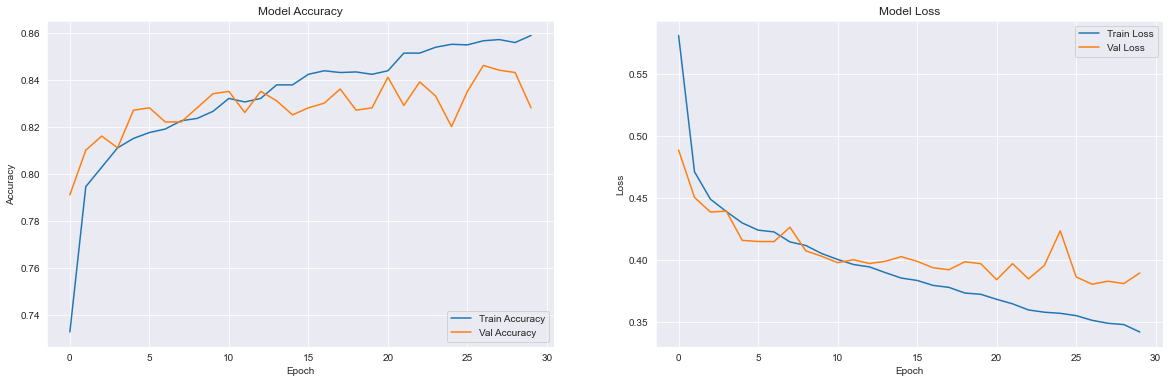

In [92]:
# Plot accuracy and loss
plot_accuracy_loss(history=history_clf_1, model_type='CLF')
     

In [93]:

# Model Evaluation
eval_acc_clf_1, eval_loss_clf_1, train_acc_clf_1, train_loss_clf_1 = evaluate_model(model_clf_1, Eval_X_clf_1, Eval_y, Train_X_clf_1, Train_y, 'CLF')

157/157 [==============================] - 11s 68ms/step - loss: 0.3475 - accuracy: 0.8562
Accuracy on Eval set = 83.57% & Loss on Eval set = 0.3865


**On the evaluation set:**

- Accuracy: 83.57%

- Loss: 0.3865

**This means that when the model was tested on the evaluation set, it achieved an accuracy of 83.57%, correctly classifying       approximately 83.57% of the samples. The loss value of  0.3865 indicates the average discrepancy between the predicted and       actual values for the evaluation set.**

**On the training set:**

- Accuracy: 85.62%

- Loss: 0.3475

**These values represent the performance of the model on the training set. The training accuracy of 85.62% indicates that the     model achieved an accuracy of approximately 85.62% on the training set. The training loss of 0.3475 represents the average       loss of the model's predictions on the training set.**

**In summary, the model performed reasonably well on both the evaluation set and training set, with an accuracy above 80% on       both. However, it is worth noting that the evaluation accuracy (83.57%) is slightly lower than the training accuracy (85.62%),   which suggests that the model may be slightly overfitting to the training data.**

57/57 [==============================] - 5s 77ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       887
           1       0.84      0.84      0.84       909

    accuracy                           0.84      1796
   macro avg       0.84      0.84      0.84      1796
weighted avg       0.84      0.84      0.84      1796





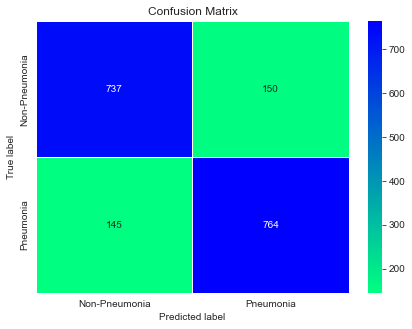

In [94]:
# Classification report & Confusion matrix
clf_report_and_conf_matrix(model_clf_1, Eval_X_clf_1, Eval_y)
     

- **True Positives (TP): 737**

  - This indicates the number of samples that were correctly predicted as "Non-Pneumonia".
  

- **True Negatives (TN): 764**

  - This indicates the number of samples that were correctly predicted as "Pneumonia".
  

- **False Positives (FP): 145**

  - This indicates the number of samples that were incorrectly predicted as "Non-Pneumonia" while they actually belong to the       "Pneumonia" class.
  

- **False Negatives (FN): 150**

  - This indicates the number of samples that were incorrectly predicted as "Pneumonia" while they actually belong to the "Non-     Pneumonia" class.
  
  
**The confusion matrix provides a breakdown of the model's performance for each class. In this case, the "Non-Pneumonia" class has 737 true positives and 145 false positives, while the "Pneumonia" class has 764 true negatives and 150 false negatives.**

In [95]:
# Append the scores & loss
clf_model_scores['Model'].append('Basic CNN')
clf_model_scores['Train Score'].append(train_acc_clf_1)
clf_model_scores['Eval Score'].append(eval_acc_clf_1)
clf_model_scores['Train Loss'].append(train_loss_clf_1)
clf_model_scores['Eval Loss'].append(eval_loss_clf_1)

**The code is adding the model name, training score, evaluation score, training loss, and evaluation loss to the      respective lists in the clf_model_scores dictionary. This allows for storing multiple model results in the dictionary for       later analysis or comparison.**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Predict the model on the evaluation dataset</div>

In [96]:
# Predict the model on the evaluation dataset
predictions = model_clf_1.predict(Eval_X_clf_1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Eval_y, axis=1)

# Compare true labels with predicted labels
for i in range(len(Eval_X_clf_1)):
    print("Image", i+1)
    print("True Label:", true_labels[i])
    print("Predicted Label:", predicted_labels[i])
    print("\n")


57/57 [==============================] - 4s 75ms/step
Image 1
True Label: 0
Predicted Label: 0


Image 2
True Label: 0
Predicted Label: 1


Image 3
True Label: 1
Predicted Label: 1


Image 4
True Label: 1
Predicted Label: 1


Image 5
True Label: 0
Predicted Label: 0


Image 6
True Label: 0
Predicted Label: 0


Image 7
True Label: 0
Predicted Label: 0


Image 8
True Label: 1
Predicted Label: 0


Image 9
True Label: 1
Predicted Label: 1


Image 10
True Label: 1
Predicted Label: 1


Image 11
True Label: 1
Predicted Label: 1


Image 12
True Label: 1
Predicted Label: 1


Image 13
True Label: 0
Predicted Label: 1


Image 14
True Label: 1
Predicted Label: 1


Image 15
True Label: 1
Predicted Label: 1


Image 16
True Label: 0
Predicted Label: 0


Image 17
True Label: 1
Predicted Label: 1


Image 18
True Label: 0
Predicted Label: 0


Image 19
True Label: 1
Predicted Label: 1


Image 20
True Label: 1
Predicted Label: 1


Image 21
True Label: 1
Predicted Label: 1


Image 22
True Label: 1
Predicte



Image 185
True Label: 1
Predicted Label: 1


Image 186
True Label: 1
Predicted Label: 1


Image 187
True Label: 1
Predicted Label: 0


Image 188
True Label: 1
Predicted Label: 0


Image 189
True Label: 0
Predicted Label: 0


Image 190
True Label: 1
Predicted Label: 1


Image 191
True Label: 0
Predicted Label: 1


Image 192
True Label: 0
Predicted Label: 0


Image 193
True Label: 0
Predicted Label: 0


Image 194
True Label: 0
Predicted Label: 1


Image 195
True Label: 0
Predicted Label: 0


Image 196
True Label: 1
Predicted Label: 1


Image 197
True Label: 0
Predicted Label: 0


Image 198
True Label: 1
Predicted Label: 1


Image 199
True Label: 0
Predicted Label: 0


Image 200
True Label: 1
Predicted Label: 1


Image 201
True Label: 1
Predicted Label: 1


Image 202
True Label: 0
Predicted Label: 1


Image 203
True Label: 0
Predicted Label: 0


Image 204
True Label: 0
Predicted Label: 0


Image 205
True Label: 0
Predicted Label: 0


Image 206
True Label: 1
Predicted Label: 0


Image 20

Predicted Label: 1


Image 417
True Label: 0
Predicted Label: 0


Image 418
True Label: 1
Predicted Label: 1


Image 419
True Label: 0
Predicted Label: 1


Image 420
True Label: 0
Predicted Label: 0


Image 421
True Label: 1
Predicted Label: 1


Image 422
True Label: 1
Predicted Label: 0


Image 423
True Label: 1
Predicted Label: 1


Image 424
True Label: 1
Predicted Label: 1


Image 425
True Label: 1
Predicted Label: 1


Image 426
True Label: 0
Predicted Label: 1


Image 427
True Label: 1
Predicted Label: 0


Image 428
True Label: 1
Predicted Label: 1


Image 429
True Label: 1
Predicted Label: 0


Image 430
True Label: 0
Predicted Label: 0


Image 431
True Label: 1
Predicted Label: 1


Image 432
True Label: 1
Predicted Label: 1


Image 433
True Label: 0
Predicted Label: 0


Image 434
True Label: 0
Predicted Label: 0


Image 435
True Label: 1
Predicted Label: 1


Image 436
True Label: 1
Predicted Label: 1


Image 437
True Label: 1
Predicted Label: 0


Image 438
True Label: 0
Predicted 

True Label: 0
Predicted Label: 0


Image 649
True Label: 1
Predicted Label: 1


Image 650
True Label: 0
Predicted Label: 0


Image 651
True Label: 0
Predicted Label: 1


Image 652
True Label: 1
Predicted Label: 1


Image 653
True Label: 1
Predicted Label: 1


Image 654
True Label: 0
Predicted Label: 0


Image 655
True Label: 1
Predicted Label: 1


Image 656
True Label: 1
Predicted Label: 1


Image 657
True Label: 0
Predicted Label: 0


Image 658
True Label: 0
Predicted Label: 0


Image 659
True Label: 1
Predicted Label: 1


Image 660
True Label: 1
Predicted Label: 1


Image 661
True Label: 1
Predicted Label: 1


Image 662
True Label: 1
Predicted Label: 1


Image 663
True Label: 1
Predicted Label: 1


Image 664
True Label: 0
Predicted Label: 0


Image 665
True Label: 1
Predicted Label: 1


Image 666
True Label: 0
Predicted Label: 0


Image 667
True Label: 1
Predicted Label: 0


Image 668
True Label: 0
Predicted Label: 0


Image 669
True Label: 0
Predicted Label: 0


Image 670
True Label

Predicted Label: 1


Image 883
True Label: 0
Predicted Label: 0


Image 884
True Label: 1
Predicted Label: 1


Image 885
True Label: 1
Predicted Label: 1


Image 886
True Label: 0
Predicted Label: 0


Image 887
True Label: 0
Predicted Label: 0


Image 888
True Label: 0
Predicted Label: 0


Image 889
True Label: 1
Predicted Label: 1


Image 890
True Label: 1
Predicted Label: 1


Image 891
True Label: 0
Predicted Label: 0


Image 892
True Label: 0
Predicted Label: 1


Image 893
True Label: 0
Predicted Label: 0


Image 894
True Label: 1
Predicted Label: 1


Image 895
True Label: 0
Predicted Label: 0


Image 896
True Label: 1
Predicted Label: 1


Image 897
True Label: 1
Predicted Label: 1


Image 898
True Label: 1
Predicted Label: 1


Image 899
True Label: 1
Predicted Label: 1


Image 900
True Label: 0
Predicted Label: 1


Image 901
True Label: 1
Predicted Label: 1


Image 902
True Label: 0
Predicted Label: 0


Image 903
True Label: 0
Predicted Label: 0


Image 904
True Label: 1
Predicted 

Image 1133
True Label: 1
Predicted Label: 1


Image 1134
True Label: 1
Predicted Label: 1


Image 1135
True Label: 0
Predicted Label: 0


Image 1136
True Label: 0
Predicted Label: 0


Image 1137
True Label: 0
Predicted Label: 0


Image 1138
True Label: 1
Predicted Label: 1


Image 1139
True Label: 0
Predicted Label: 0


Image 1140
True Label: 0
Predicted Label: 1


Image 1141
True Label: 0
Predicted Label: 0


Image 1142
True Label: 0
Predicted Label: 0


Image 1143
True Label: 1
Predicted Label: 1


Image 1144
True Label: 1
Predicted Label: 1


Image 1145
True Label: 1
Predicted Label: 1


Image 1146
True Label: 0
Predicted Label: 0


Image 1147
True Label: 0
Predicted Label: 0


Image 1148
True Label: 1
Predicted Label: 1


Image 1149
True Label: 0
Predicted Label: 0


Image 1150
True Label: 0
Predicted Label: 0


Image 1151
True Label: 0
Predicted Label: 0


Image 1152
True Label: 0
Predicted Label: 0


Image 1153
True Label: 1
Predicted Label: 1


Image 1154
True Label: 0
Predicted

True Label: 1
Predicted Label: 1


Image 1374
True Label: 1
Predicted Label: 1


Image 1375
True Label: 0
Predicted Label: 0


Image 1376
True Label: 0
Predicted Label: 0


Image 1377
True Label: 0
Predicted Label: 0


Image 1378
True Label: 0
Predicted Label: 1


Image 1379
True Label: 0
Predicted Label: 0


Image 1380
True Label: 0
Predicted Label: 1


Image 1381
True Label: 0
Predicted Label: 0


Image 1382
True Label: 1
Predicted Label: 1


Image 1383
True Label: 1
Predicted Label: 1


Image 1384
True Label: 0
Predicted Label: 0


Image 1385
True Label: 1
Predicted Label: 1


Image 1386
True Label: 0
Predicted Label: 0


Image 1387
True Label: 1
Predicted Label: 1


Image 1388
True Label: 0
Predicted Label: 1


Image 1389
True Label: 0
Predicted Label: 1


Image 1390
True Label: 0
Predicted Label: 0


Image 1391
True Label: 0
Predicted Label: 0


Image 1392
True Label: 1
Predicted Label: 1


Image 1393
True Label: 1
Predicted Label: 1


Image 1394
True Label: 1
Predicted Label: 1



Image 1591
True Label: 1
Predicted Label: 1


Image 1592
True Label: 1
Predicted Label: 1


Image 1593
True Label: 1
Predicted Label: 1


Image 1594
True Label: 0
Predicted Label: 0


Image 1595
True Label: 1
Predicted Label: 1


Image 1596
True Label: 1
Predicted Label: 1


Image 1597
True Label: 0
Predicted Label: 0


Image 1598
True Label: 1
Predicted Label: 1


Image 1599
True Label: 0
Predicted Label: 0


Image 1600
True Label: 0
Predicted Label: 0


Image 1601
True Label: 1
Predicted Label: 1


Image 1602
True Label: 0
Predicted Label: 0


Image 1603
True Label: 1
Predicted Label: 0


Image 1604
True Label: 0
Predicted Label: 0


Image 1605
True Label: 1
Predicted Label: 1


Image 1606
True Label: 0
Predicted Label: 0


Image 1607
True Label: 0
Predicted Label: 0


Image 1608
True Label: 1
Predicted Label: 1


Image 1609
True Label: 0
Predicted Label: 1


Image 1610
True Label: 1
Predicted Label: 1


Image 1611
True Label: 1
Predicted Label: 1


Image 1612
True Label: 0
Predicted

**The code uses a trained model to predict labels for the evaluation dataset and then compares the true labels with the predicted labels by printing them for each image in the dataset.**

In [97]:
import pickle

# Save the model as a pickle file
with open('model_clf_1.pkl', 'wb') as file:
    pickle.dump(model_clf_1, file)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    

**The code saves the trained model model_clf_1 as a pickle file named 'model_clf_1.pkl' using the pickle module. The resulting pickle file can be later loaded and deserialized to retrieve the trained model object for further use.**

### Highlights of Base Classifier Model:


- __Used TensorFlow 2.0 and Keras wrapper to build a classification model.__


 - __Utilized convolutional layers with 32,64 and 128 features and applied same padding to maintain the spatial dimensions of        the input__


- __Incorporated Maxpooling2D layers with a kernel size of 2x2 to downsample the feature maps and reduce the model's                 complexity.__


- __Utilized the Rectified Linear Unit (ReLU) activation function to introduce non-linearity and improve the model's ability to     learn complex patterns.__


- __Flattened the feature vector obtained from the convolutional layers to transform the 2D spatial information into a 1D           vector.__


- __Added one dense layer to capture higher-level abstractions and facilitate the learning process.__


- __Employed the Softmax activation function in the final layer to obtain probability scores for each class in the                   classification task.__


- __Achieved an evaluation accuracy of 83.30% on the dataset used for testing and validation.__

## MILESTONE 1 IS OVER

# MILESTONE 2

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Step 1 : Fine tune the trained basic CNN models for classification</div>


**To fine-tune the trained basic CNN models for classification, you can follow these steps:**

__1) The early_stop and callbacks are mentioned in the below code.__

In [98]:
# Applying callbacks
from tensorflow.keras.callbacks import EarlyStopping

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode='min')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=1e-6, mode='min')

# checkpoint = tf.keras.callbacks.ModelCheckpoint('model-{loss:.2f}.h5', monitor='loss', save_best_only=True, save_weights_only=True, mode='min', save_freq=1)
     

**Here's an explanation of the code:**

**EarlyStopping Callback:**

- EarlyStopping is a callback that stops the training process if a monitored metric (in this case, 'loss') stops improving.

**Parameters:**
- monitor='loss': The metric to monitor for improvement.

- patience=5: The number of epochs with no improvement after which training will be stopped.

- mode='min': The direction of improvement to be monitored ('min' for loss minimization, 'max' for accuracy maximization).
     
**ReduceLROnPlateau Callback:**

- ReduceLROnPlateau is a callback that reduces the learning rate when a monitored metric (in this case, 'loss') stops improving.
- Parameters:
- monitor='loss': The metric to monitor for improvement.

- factor=0.2: The factor by which the learning rate will be reduced (new_lr = old_lr * factor).

- patience=5: The number of epochs with no improvement after which the learning rate will be reduced.

- min_lr=1e-6: The lower bound of the learning rate.

- mode='min': The direction of improvement to be monitored ('min' for loss minimization, 'max' for accuracy maximization).

- ModelCheckpoint Callback (commented out):

**ModelCheckpoint is a callback that saves the model weights during training.**
- Parameters:

- filepath: The filepath to save the model weights.

- monitor='loss': The metric to monitor for saving the best model weights.

- save_best_only=True: Saves only the best model weights based on the monitored metric.

- save_weights_only=True: Saves only the model weights (not the entire model).

- mode='min': The direction of improvement to be monitored ('min' for loss minimization, 'max' for accuracy maximization).

- save_freq=1: Specifies the frequency at which the model weights will be saved (1 for every epoch).

**In the provided code, the early_stop and reduce_lr callbacks are created, while the ModelCheckpoint callback is commented out. These callbacks can be passed to the fit function of a Keras model to control the training process and optimize model performance.**

In [99]:
initial_learning_rate = 0.00001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.96, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

**2) Adding more layers to the base model to improve accuracy and loss**

In [100]:
fine_tuned_model_clf_1 = tf.keras.models.Sequential()
fine_tuned_model_clf_1.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(128, 128, 3)))
fine_tuned_model_clf_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
fine_tuned_model_clf_1.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
fine_tuned_model_clf_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
fine_tuned_model_clf_1.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
fine_tuned_model_clf_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
fine_tuned_model_clf_1.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
fine_tuned_model_clf_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
fine_tuned_model_clf_1.add(tf.keras.layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
fine_tuned_model_clf_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
fine_tuned_model_clf_1.add(tf.keras.layers.Flatten())
fine_tuned_model_clf_1.add(tf.keras.layers.Dense(256, activation='relu'))
fine_tuned_model_clf_1.add(tf.keras.layers.Dense(128, activation='relu'))
fine_tuned_model_clf_1.add(tf.keras.layers.Dense(64, activation='relu'))
fine_tuned_model_clf_1.add(tf.keras.layers.Dense(2, activation='softmax'))
fine_tuned_model_clf_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)     

## Model Architecture:

__The model_clf_1 is a basic convolutional neural network (CNN) architecture for binary classification of pneumonia and non-       pneumonia chest X-ray images. Here's a summary of the model:__

- **Input shape: (128, 128, 3) - Images of size 128x128 pixels with 3 color channels (RGB).**

- **Convolutional layers:**

- **Conv2D with 32 filters, kernel size of 3x3, stride of 1x1, and "same" padding.**

- **MaxPooling2D with a pooling size of 2x2 to reduce spatial dimensions.**

- **Conv2D with 64 filters, kernel size of 3x3, stride of 1x1, and "same" padding.**

- **MaxPooling2D to further reduce spatial dimensions.**

- **Conv2D with 128 filters, kernel size of 3x3, stride of 1x1, and "same" padding.**

- **MaxPooling2D for spatial downsampling.**

- **Conv2D with 256 filters, kernel size of 3x3, stride of 1x1, and "same" padding.**

- **Conv2D with 512 filters, kernel size of 3x3, stride of 1x1, and "same" padding.**

- **Flatten layer: Flattens the output from the previous convolutional layers into a 1-dimensional vector.**

__Fully connected layers:__

- **Dense layer with 128 neurons and ReLU activation function.**

- **Dense layer with 64 neurons and ReLU activation function.**

__Output layer:__

- **Dense layer with 2 neurons and softmax activation function for binary classification.**

The model has a total of 2,190,294 trainable parameters, which are learned during training to optimize the model's performance. The summary provides an overview of the model's architecture, including the number of parameters in each layer and the output shape at each step.

__3) Compile the model with a lower learning rate to ensure stable fine-tuning and prevent drastic updates to the pretrained          weights.__

In [101]:
fine_tuned_model_clf_1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

__4) Fine-tune the model using the same training data (Train_X_clf_1 and Train_y) as in Milestone 1. You can continue training        from the previous number of epochs or start a new training process. Adjust the number of epochs and batch size as needed.__

In [102]:
fine_tuned_clf_2 = fine_tuned_model_clf_1.fit(Train_X_clf_1, Train_y, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop, reduce_lr])

Epoch 1/30
125/125 [==============================] - 63s 486ms/step - loss: 0.6282 - accuracy: 0.7293 - val_loss: 0.5134 - val_accuracy: 0.7990 - lr: 1.0000e-05
Epoch 2/30
125/125 [==============================] - 58s 462ms/step - loss: 0.4713 - accuracy: 0.7952 - val_loss: 0.4327 - val_accuracy: 0.8070 - lr: 1.0000e-05
Epoch 3/30
125/125 [==============================] - 59s 469ms/step - loss: 0.4444 - accuracy: 0.8058 - val_loss: 0.4168 - val_accuracy: 0.8160 - lr: 1.0000e-05
Epoch 4/30
125/125 [==============================] - 60s 483ms/step - loss: 0.4294 - accuracy: 0.8145 - val_loss: 0.4086 - val_accuracy: 0.8230 - lr: 1.0000e-05
Epoch 5/30
125/125 [==============================] - 61s 487ms/step - loss: 0.4231 - accuracy: 0.8202 - val_loss: 0.4017 - val_accuracy: 0.8320 - lr: 1.0000e-05
Epoch 6/30
125/125 [==============================] - 59s 469ms/step - loss: 0.4146 - accuracy: 0.8250 - val_loss: 0.4019 - val_accuracy: 0.8320 - lr: 1.0000e-05
Epoch 7/30
125/125 [========

__4) Plot the accuracy and loss curves during fine-tuning using the plot_accuracy_loss function.__

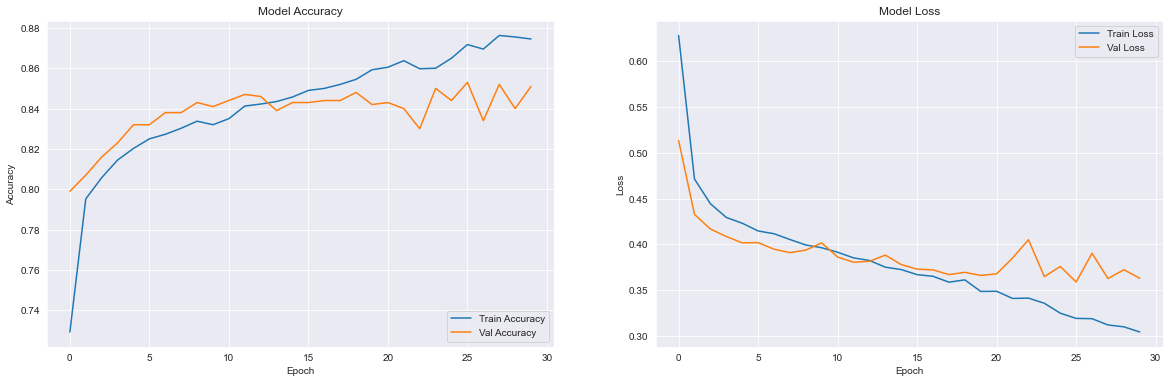

In [103]:
# Plot accuracy and loss
plot_accuracy_loss(history=fine_tuned_clf_2, model_type='CLF')

__5) Evaluate the fine-tuned model on the evaluation data (Eval_X_clf_1 and Eval_y) using the evaluate_model function.__

In [104]:
# Evaluate the fine-tuned model

eval_acc_fine_tuned_clf_1, eval_loss_fine_tuned_clf_1, train_acc_fine_tuned_clf_1, train_loss_fine_tuned_clf_1 = evaluate_model(fine_tuned_model_clf_1, Eval_X_clf_1, Eval_y, Train_X_clf_1, Train_y, 'CLF')

157/157 [==============================] - 16s 103ms/step - loss: 0.3062 - accuracy: 0.8770
Accuracy on Eval set = 84.52% & Loss on Eval set = 0.3755


# MODEL EVALUATION

**On the evaluation set:**

- Accuracy: 84.52%

- Loss: 0.3755

**This means that when the model was tested on the evaluation set, it achieved an accuracy of 84.52%, correctly classifying       approximately 84.52% of the samples. The loss value of 0.3755 indicates the average discrepancy between the predicted and       actual values for the evaluation set.**

**On the training set:**

- Accuracy: 87.70%

- Loss: 0.3062

**These values represent the performance of the model on the training set. The training accuracy of 87.70% indicates that the     model achieved an accuracy of approximately 87.70% on the training set. The training loss of 0.3062 represents the average       loss of the model's predictions on the training set.**

**In summary, the model performed reasonably well on both the evaluation set and training set, with an accuracy above 80% on       both. However, it is worth noting that the evaluation accuracy (84.52%) is slightly lower than the training accuracy (87.70%),   which suggests that the model may be slightly overfitting to the training data.**

57/57 [==============================] - 5s 93ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       887
           1       0.82      0.88      0.85       909

    accuracy                           0.85      1796
   macro avg       0.85      0.84      0.84      1796
weighted avg       0.85      0.85      0.84      1796





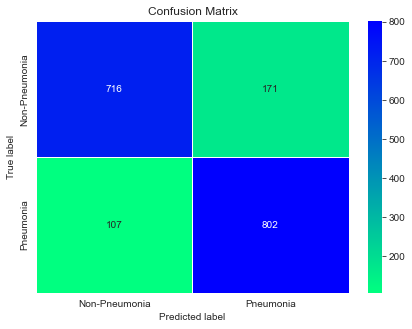

In [105]:
# Classification report & Confusion matrix

clf_report_and_conf_matrix(fine_tuned_model_clf_1, Eval_X_clf_1, Eval_y)

- **True Positives (TP): 716**

  - This indicates the number of samples that were correctly predicted as "Non-Pneumonia".
  

- **True Negatives (TN): 802**

  - This indicates the number of samples that were correctly predicted as "Pneumonia".
  

- **False Positives (FP): 107**

  - This indicates the number of samples that were incorrectly predicted as "Non-Pneumonia" while they actually belong to the       "Pneumonia" class.
  

- **False Negatives (FN): 171**

  - This indicates the number of samples that were incorrectly predicted as "Pneumonia" while they actually belong to the "Non-     Pneumonia" class.
  
  
**The confusion matrix provides a breakdown of the model's performance for each class. In this case, the "Non-Pneumonia" class has 716 true positives and 107 false positives, while the "Pneumonia" class has 802 true negatives and 171 false negatives.**

__6) Update the clf_model_scores dictionary with the fine-tuning scores and loss values.__

In [106]:
# Append the fine-tuning scores and loss values
clf_model_scores['Model'].append('Fine-Tuned CNN')
clf_model_scores['Train Score'].append(train_acc_fine_tuned_clf_1)
clf_model_scores['Eval Score'].append(eval_acc_fine_tuned_clf_1)
clf_model_scores['Train Loss'].append(train_loss_fine_tuned_clf_1)
clf_model_scores['Eval Loss'].append(eval_loss_fine_tuned_clf_1)


 __7)Predict the model on the evaluation dataset__

In [107]:
# Predict the model on the evaluation dataset
predictions = fine_tuned_model_clf_1.predict(Eval_X_clf_1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Eval_y, axis=1)

# Compare true labels with predicted labels
for i in range(len(Eval_X_clf_1)):
    print("Image", i+1)
    print("True Label:", true_labels[i])
    print("Predicted Label:", predicted_labels[i])
    print("\n")


57/57 [==============================] - 7s 119ms/step
Image 1
True Label: 0
Predicted Label: 0


Image 2
True Label: 0
Predicted Label: 1


Image 3
True Label: 1
Predicted Label: 1


Image 4
True Label: 1
Predicted Label: 1


Image 5
True Label: 0
Predicted Label: 0


Image 6
True Label: 0
Predicted Label: 0


Image 7
True Label: 0
Predicted Label: 0


Image 8
True Label: 1
Predicted Label: 0


Image 9
True Label: 1
Predicted Label: 1


Image 10
True Label: 1
Predicted Label: 1


Image 11
True Label: 1
Predicted Label: 1


Image 12
True Label: 1
Predicted Label: 0


Image 13
True Label: 0
Predicted Label: 1


Image 14
True Label: 1
Predicted Label: 1


Image 15
True Label: 1
Predicted Label: 1


Image 16
True Label: 0
Predicted Label: 0


Image 17
True Label: 1
Predicted Label: 1


Image 18
True Label: 0
Predicted Label: 0


Image 19
True Label: 1
Predicted Label: 0


Image 20
True Label: 1
Predicted Label: 1


Image 21
True Label: 1
Predicted Label: 1


Image 22
True Label: 1
Predict

Image 217
True Label: 1
Predicted Label: 1


Image 218
True Label: 1
Predicted Label: 1


Image 219
True Label: 1
Predicted Label: 1


Image 220
True Label: 0
Predicted Label: 0


Image 221
True Label: 1
Predicted Label: 1


Image 222
True Label: 1
Predicted Label: 1


Image 223
True Label: 0
Predicted Label: 0


Image 224
True Label: 0
Predicted Label: 0


Image 225
True Label: 0
Predicted Label: 0


Image 226
True Label: 1
Predicted Label: 1


Image 227
True Label: 0
Predicted Label: 0


Image 228
True Label: 0
Predicted Label: 0


Image 229
True Label: 0
Predicted Label: 0


Image 230
True Label: 1
Predicted Label: 1


Image 231
True Label: 0
Predicted Label: 0


Image 232
True Label: 1
Predicted Label: 0


Image 233
True Label: 1
Predicted Label: 1


Image 234
True Label: 0
Predicted Label: 0


Image 235
True Label: 0
Predicted Label: 0


Image 236
True Label: 0
Predicted Label: 1


Image 237
True Label: 0
Predicted Label: 0


Image 238
True Label: 0
Predicted Label: 0


Image 239




Image 405
True Label: 1
Predicted Label: 1


Image 406
True Label: 1
Predicted Label: 1


Image 407
True Label: 0
Predicted Label: 0


Image 408
True Label: 1
Predicted Label: 1


Image 409
True Label: 0
Predicted Label: 1


Image 410
True Label: 1
Predicted Label: 1


Image 411
True Label: 1
Predicted Label: 0


Image 412
True Label: 1
Predicted Label: 1


Image 413
True Label: 0
Predicted Label: 0


Image 414
True Label: 0
Predicted Label: 0


Image 415
True Label: 0
Predicted Label: 0


Image 416
True Label: 0
Predicted Label: 1


Image 417
True Label: 0
Predicted Label: 0


Image 418
True Label: 1
Predicted Label: 1


Image 419
True Label: 0
Predicted Label: 1


Image 420
True Label: 0
Predicted Label: 0


Image 421
True Label: 1
Predicted Label: 1


Image 422
True Label: 1
Predicted Label: 1


Image 423
True Label: 1
Predicted Label: 1


Image 424
True Label: 1
Predicted Label: 1


Image 425
True Label: 1
Predicted Label: 1


Image 426
True Label: 0
Predicted Label: 1


Image 42

True Label: 0
Predicted Label: 0


Image 604
True Label: 0
Predicted Label: 0


Image 605
True Label: 1
Predicted Label: 1


Image 606
True Label: 0
Predicted Label: 0


Image 607
True Label: 0
Predicted Label: 0


Image 608
True Label: 1
Predicted Label: 0


Image 609
True Label: 1
Predicted Label: 1


Image 610
True Label: 1
Predicted Label: 1


Image 611
True Label: 0
Predicted Label: 0


Image 612
True Label: 0
Predicted Label: 0


Image 613
True Label: 1
Predicted Label: 1


Image 614
True Label: 1
Predicted Label: 1


Image 615
True Label: 1
Predicted Label: 1


Image 616
True Label: 1
Predicted Label: 1


Image 617
True Label: 1
Predicted Label: 1


Image 618
True Label: 0
Predicted Label: 1


Image 619
True Label: 1
Predicted Label: 1


Image 620
True Label: 0
Predicted Label: 0


Image 621
True Label: 1
Predicted Label: 1


Image 622
True Label: 1
Predicted Label: 1


Image 623
True Label: 1
Predicted Label: 1


Image 624
True Label: 0
Predicted Label: 0


Image 625
True Label

True Label: 1
Predicted Label: 1


Image 826
True Label: 0
Predicted Label: 0


Image 827
True Label: 0
Predicted Label: 0


Image 828
True Label: 0
Predicted Label: 0


Image 829
True Label: 0
Predicted Label: 0


Image 830
True Label: 0
Predicted Label: 0


Image 831
True Label: 0
Predicted Label: 0


Image 832
True Label: 1
Predicted Label: 1


Image 833
True Label: 1
Predicted Label: 1


Image 834
True Label: 1
Predicted Label: 1


Image 835
True Label: 0
Predicted Label: 0


Image 836
True Label: 1
Predicted Label: 1


Image 837
True Label: 0
Predicted Label: 0


Image 838
True Label: 1
Predicted Label: 1


Image 839
True Label: 0
Predicted Label: 0


Image 840
True Label: 0
Predicted Label: 0


Image 841
True Label: 1
Predicted Label: 1


Image 842
True Label: 0
Predicted Label: 0


Image 843
True Label: 1
Predicted Label: 1


Image 844
True Label: 0
Predicted Label: 0


Image 845
True Label: 0
Predicted Label: 0


Image 846
True Label: 0
Predicted Label: 1


Image 847
True Label

Image 1123
True Label: 0
Predicted Label: 0


Image 1124
True Label: 0
Predicted Label: 0


Image 1125
True Label: 0
Predicted Label: 0


Image 1126
True Label: 1
Predicted Label: 1


Image 1127
True Label: 1
Predicted Label: 1


Image 1128
True Label: 1
Predicted Label: 1


Image 1129
True Label: 0
Predicted Label: 0


Image 1130
True Label: 1
Predicted Label: 1


Image 1131
True Label: 1
Predicted Label: 1


Image 1132
True Label: 1
Predicted Label: 1


Image 1133
True Label: 1
Predicted Label: 1


Image 1134
True Label: 1
Predicted Label: 1


Image 1135
True Label: 0
Predicted Label: 0


Image 1136
True Label: 0
Predicted Label: 0


Image 1137
True Label: 0
Predicted Label: 0


Image 1138
True Label: 1
Predicted Label: 1


Image 1139
True Label: 0
Predicted Label: 0


Image 1140
True Label: 0
Predicted Label: 1


Image 1141
True Label: 0
Predicted Label: 0


Image 1142
True Label: 0
Predicted Label: 0


Image 1143
True Label: 1
Predicted Label: 1


Image 1144
True Label: 1
Predicted

Image 1409
True Label: 0
Predicted Label: 0


Image 1410
True Label: 0
Predicted Label: 1


Image 1411
True Label: 1
Predicted Label: 1


Image 1412
True Label: 1
Predicted Label: 1


Image 1413
True Label: 0
Predicted Label: 0


Image 1414
True Label: 0
Predicted Label: 0


Image 1415
True Label: 1
Predicted Label: 1


Image 1416
True Label: 1
Predicted Label: 1


Image 1417
True Label: 1
Predicted Label: 1


Image 1418
True Label: 1
Predicted Label: 1


Image 1419
True Label: 0
Predicted Label: 0


Image 1420
True Label: 0
Predicted Label: 0


Image 1421
True Label: 0
Predicted Label: 0


Image 1422
True Label: 0
Predicted Label: 0


Image 1423
True Label: 0
Predicted Label: 0


Image 1424
True Label: 0
Predicted Label: 0


Image 1425
True Label: 1
Predicted Label: 1


Image 1426
True Label: 0
Predicted Label: 0


Image 1427
True Label: 1
Predicted Label: 1


Image 1428
True Label: 0
Predicted Label: 0


Image 1429
True Label: 1
Predicted Label: 1


Image 1430
True Label: 0
Predicted

Predicted Label: 0


Image 1726
True Label: 0
Predicted Label: 0


Image 1727
True Label: 1
Predicted Label: 1


Image 1728
True Label: 1
Predicted Label: 1


Image 1729
True Label: 0
Predicted Label: 0


Image 1730
True Label: 1
Predicted Label: 1


Image 1731
True Label: 1
Predicted Label: 1


Image 1732
True Label: 1
Predicted Label: 1


Image 1733
True Label: 1
Predicted Label: 1


Image 1734
True Label: 0
Predicted Label: 0


Image 1735
True Label: 1
Predicted Label: 1


Image 1736
True Label: 0
Predicted Label: 0


Image 1737
True Label: 0
Predicted Label: 0


Image 1738
True Label: 1
Predicted Label: 1


Image 1739
True Label: 1
Predicted Label: 0


Image 1740
True Label: 1
Predicted Label: 1


Image 1741
True Label: 0
Predicted Label: 0


Image 1742
True Label: 0
Predicted Label: 1


Image 1743
True Label: 0
Predicted Label: 0


Image 1744
True Label: 1
Predicted Label: 1


Image 1745
True Label: 0
Predicted Label: 0


Image 1746
True Label: 1
Predicted Label: 1


Image 1747
Tr

__8)Save the fine-tuned model using pickle.__

In [108]:
# Save the fine-tuned model as a pickle file
with open('model_clf_fine_tuned.pkl', 'wb') as file:
    pickle.dump(model_clf_1, file)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    

In [109]:
del Train_X_clf_1
del Eval_X_clf_1

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Step 2 : Apply Transfer Learning model for classification</div> 

## <div style="background-color:#F3C130;font-size:25px;padding:10px 10px;color:black;border:4px solid #1C1B20"> MobileNet model</div>

In [110]:
# Apply Pre-processing
Train_X_clf_2 = tf.keras.applications.mobilenet.preprocess_input(np.copy(Train_X))
Eval_X_clf_2 = tf.keras.applications.mobilenet.preprocess_input(np.copy(Eval_X))

### Model Architecture

In [111]:
# Instantiates the MobileNet architecture
base_model = tf.keras.applications.MobileNet(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Previous layers are non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Classification layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(2, activation='softmax')(x)

model_clf_2 = tf.keras.Model(inputs=base_model.input, outputs=output)

# Model summary
model_clf_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 8, 8, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 8, 8, 512)         262144    
                                                                 
 conv_pw_9

**Instantiating the MobileNet base model:**

- The tf.keras.applications.MobileNet function is used to instantiate the MobileNet architecture.


- The input_shape parameter is set to (128, 128, 3), which means the model expects input images of size 128x128 pixels with  3     color channels (RGB).


- The include_top parameter is set to False, indicating that the final fully connected layers of the MobileNet model (which       are responsible for classification) will be excluded.


- The weights parameter is set to 'imagenet', which means the model will be initialized with pre-trained weights on the           ImageNet dataset.


**Freezing the base model layers:**

- The code then iterates over all layers in the base_model and sets their trainable attribute to False. This ensures that         the pre-trained weights in the base model layers will not be updated during training.


**Adding classification layers:**

- A GlobalAveragePooling2D layer is added after the output of the base_model. This layer reduces the spatial dimensions of         the features to a vector by computing the average of each feature map.


- A Dense layer with 512 units and ReLU activation is added. This layer serves as the first fully connected layer for             classification.


- A Dropout layer with a rate of 0.5 is added. Dropout is a regularization technique that randomly sets a fraction of input       units to 0 during training to prevent overfitting.


- Another Dense layer with 256 units and ReLU activation is added, followed by another Dropout layer with a rate of 0.5.
  Finally, an output Dense layer with 2 units and softmax activation is added. This layer produces the classification             probabilities for two classes


**Creating the model:**

- The tf.keras.Model function is used to create a new model, specifying the input as base_model.input and the output as the       previously defined output layer.


**Model summary:**

- The model_clf_2.summary() prints a summary of the model, displaying the layer types, shapes, and the number of parameters       in each layer.



**Overall, this code creates a modified MobileNet-based model for image classification, where the base layers are frozen to retain their pre-trained weights, and additional classification layers are added on top to adapt the model for a specific task.**

### Compiling the Model

In [112]:
# Define optimizer and compile the model
model_clf_2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

### Fitting the Model

In [113]:
# Fit the model
history_clf_2 = model_clf_2.fit(Train_X_clf_2, Train_y, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop, reduce_lr])

Epoch 1/30
125/125 [==============================] - 27s 189ms/step - loss: 0.9839 - accuracy: 0.5922 - val_loss: 0.4721 - val_accuracy: 0.7850 - lr: 1.0000e-05
Epoch 2/30
125/125 [==============================] - 27s 215ms/step - loss: 0.7869 - accuracy: 0.6520 - val_loss: 0.4118 - val_accuracy: 0.8240 - lr: 1.0000e-05
Epoch 3/30
125/125 [==============================] - 26s 209ms/step - loss: 0.6974 - accuracy: 0.6942 - val_loss: 0.3828 - val_accuracy: 0.8330 - lr: 1.0000e-05
Epoch 4/30
125/125 [==============================] - 26s 207ms/step - loss: 0.6098 - accuracy: 0.7318 - val_loss: 0.3742 - val_accuracy: 0.8400 - lr: 1.0000e-05
Epoch 5/30
125/125 [==============================] - 24s 191ms/step - loss: 0.5845 - accuracy: 0.7475 - val_loss: 0.3647 - val_accuracy: 0.8390 - lr: 1.0000e-05
Epoch 6/30
125/125 [==============================] - 23s 184ms/step - loss: 0.5480 - accuracy: 0.7623 - val_loss: 0.3657 - val_accuracy: 0.8410 - lr: 1.0000e-05
Epoch 7/30
125/125 [========

### Plotting the Model

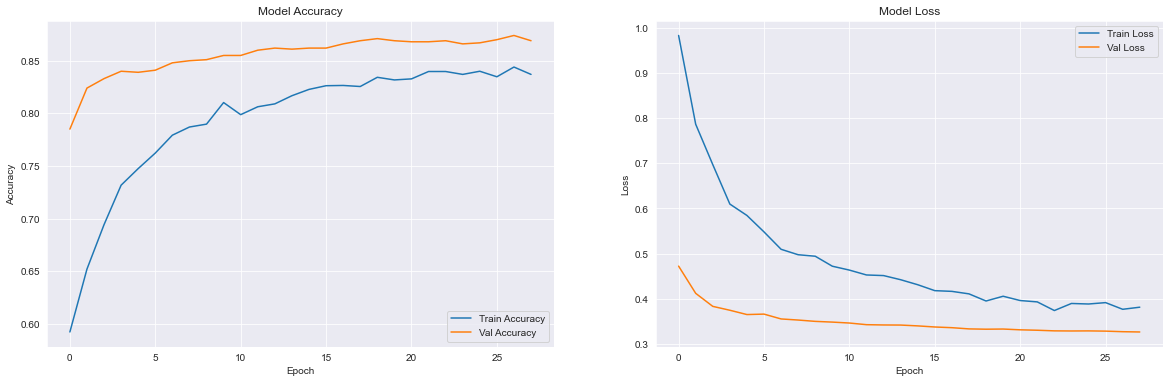

In [114]:
# Plot accuracy and loss
plot_accuracy_loss(history=history_clf_2, model_type='CLF')

### Evaluating the Model

In [115]:
# Model Evaluation
eval_acc_clf_2, eval_loss_clf_2, train_acc_clf_2, train_loss_clf_2 = evaluate_model(model_clf_2, Eval_X_clf_2, Eval_y, Train_X_clf_2, Train_y, 'CLF')

157/157 [==============================] - 46s 294ms/step - loss: 0.3200 - accuracy: 0.8688
Accuracy on Eval set = 86.25% & Loss on Eval set = 0.3295


# MODEL EVALUATION

**On the evaluation set:**

- Accuracy: 86.25%

- Loss: 0.3295

**This means that when the model was tested on the evaluation set, it achieved an accuracy of 86.25%, correctly classifying       approximately 86.25% of the samples. The loss value of 0.3295 indicates the average discrepancy between the predicted and       actual values for the evaluation set.**

**On the training set:**

- Accuracy: 86.88%

- Loss: 0.3200

**These values represent the performance of the model on the training set. The training accuracy of 86.88% indicates that the     model achieved an accuracy of approximately 86.88% on the training set. The training loss of 0.3200 represents the average       loss of the model's predictions on the training set.**

**In summary, the model performed reasonably well on both the evaluation set and training set, with an accuracy above 80% on       both. However, it is worth noting that the evaluation accuracy (86.25%) is slightly lower than the training accuracy (86.88%),   which suggests that the model may be slightly overfitting to the training data.**

57/57 [==============================] - 22s 355ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       887
           1       0.84      0.89      0.87       909

    accuracy                           0.86      1796
   macro avg       0.86      0.86      0.86      1796
weighted avg       0.86      0.86      0.86      1796





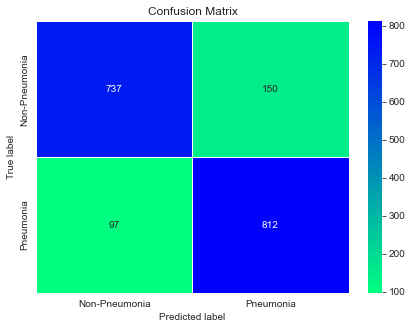

In [116]:
# Classification report & Confusion matrix
clf_report_and_conf_matrix(model_clf_2, Eval_X_clf_2, Eval_y)

- **True Positives (TP): 737**

  - This indicates the number of samples that were correctly predicted as "Non-Pneumonia".
  

- **True Negatives (TN): 812**

  - This indicates the number of samples that were correctly predicted as "Pneumonia".
  

- **False Positives (FP): 97**

  - This indicates the number of samples that were incorrectly predicted as "Non-Pneumonia" while they actually belong to the       "Pneumonia" class.
  

- **False Negatives (FN): 150**

  - This indicates the number of samples that were incorrectly predicted as "Pneumonia" while they actually belong to the "Non-     Pneumonia" class.
  
  
**The confusion matrix provides a breakdown of the model's performance for each class. In this case, the "Non-Pneumonia" class has 737 true positives and 97 false positives, while the "Pneumonia" class has 812 true negatives and 150 false negatives.**

### Updating the Model_Score

In [117]:
# Append the scores & loss
clf_model_scores['Model'].append('MobileNet')
clf_model_scores['Train Score'].append(train_acc_clf_2)
clf_model_scores['Eval Score'].append(eval_acc_clf_2)
clf_model_scores['Train Loss'].append(train_loss_clf_2)
clf_model_scores['Eval Loss'].append(eval_loss_clf_2)

### Predictions on Model

In [118]:
# Predict the model on the evaluation dataset
predictions = model_clf_2.predict(Eval_X_clf_2)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Eval_y, axis=1)

# Compare true labels with predicted labels
for i in range(len(Eval_X_clf_2)):
    print("Image", i+1)
    print("True Label:", true_labels[i])
    print("Predicted Label:", predicted_labels[i])
    print("\n")


57/57 [==============================] - 12s 211ms/step
Image 1
True Label: 0
Predicted Label: 0


Image 2
True Label: 0
Predicted Label: 1


Image 3
True Label: 1
Predicted Label: 1


Image 4
True Label: 1
Predicted Label: 1


Image 5
True Label: 0
Predicted Label: 0


Image 6
True Label: 0
Predicted Label: 0


Image 7
True Label: 0
Predicted Label: 0


Image 8
True Label: 1
Predicted Label: 1


Image 9
True Label: 1
Predicted Label: 1


Image 10
True Label: 1
Predicted Label: 1


Image 11
True Label: 1
Predicted Label: 1


Image 12
True Label: 1
Predicted Label: 1


Image 13
True Label: 0
Predicted Label: 1


Image 14
True Label: 1
Predicted Label: 1


Image 15
True Label: 1
Predicted Label: 1


Image 16
True Label: 0
Predicted Label: 0


Image 17
True Label: 1
Predicted Label: 1


Image 18
True Label: 0
Predicted Label: 0


Image 19
True Label: 1
Predicted Label: 1


Image 20
True Label: 1
Predicted Label: 1


Image 21
True Label: 1
Predicted Label: 1


Image 22
True Label: 1
Predic

Predicted Label: 1


Image 191
True Label: 0
Predicted Label: 1


Image 192
True Label: 0
Predicted Label: 0


Image 193
True Label: 0
Predicted Label: 0


Image 194
True Label: 0
Predicted Label: 1


Image 195
True Label: 0
Predicted Label: 0


Image 196
True Label: 1
Predicted Label: 1


Image 197
True Label: 0
Predicted Label: 0


Image 198
True Label: 1
Predicted Label: 1


Image 199
True Label: 0
Predicted Label: 0


Image 200
True Label: 1
Predicted Label: 1


Image 201
True Label: 1
Predicted Label: 1


Image 202
True Label: 0
Predicted Label: 1


Image 203
True Label: 0
Predicted Label: 0


Image 204
True Label: 0
Predicted Label: 0


Image 205
True Label: 0
Predicted Label: 0


Image 206
True Label: 1
Predicted Label: 1


Image 207
True Label: 0
Predicted Label: 1


Image 208
True Label: 0
Predicted Label: 1


Image 209
True Label: 1
Predicted Label: 1


Image 210
True Label: 1
Predicted Label: 1


Image 211
True Label: 0
Predicted Label: 0


Image 212
True Label: 0
Predicted 

True Label: 0
Predicted Label: 0


Image 386
True Label: 0
Predicted Label: 0


Image 387
True Label: 0
Predicted Label: 0


Image 388
True Label: 1
Predicted Label: 1


Image 389
True Label: 1
Predicted Label: 1


Image 390
True Label: 0
Predicted Label: 0


Image 391
True Label: 1
Predicted Label: 1


Image 392
True Label: 0
Predicted Label: 0


Image 393
True Label: 1
Predicted Label: 1


Image 394
True Label: 1
Predicted Label: 0


Image 395
True Label: 1
Predicted Label: 1


Image 396
True Label: 0
Predicted Label: 0


Image 397
True Label: 1
Predicted Label: 1


Image 398
True Label: 1
Predicted Label: 0


Image 399
True Label: 0
Predicted Label: 0


Image 400
True Label: 0
Predicted Label: 1


Image 401
True Label: 0
Predicted Label: 0


Image 402
True Label: 1
Predicted Label: 1


Image 403
True Label: 0
Predicted Label: 0


Image 404
True Label: 0
Predicted Label: 0


Image 405
True Label: 1
Predicted Label: 0


Image 406
True Label: 1
Predicted Label: 1


Image 407
True Label

Image 587
True Label: 0
Predicted Label: 0


Image 588
True Label: 0
Predicted Label: 0


Image 589
True Label: 0
Predicted Label: 0


Image 590
True Label: 1
Predicted Label: 1


Image 591
True Label: 1
Predicted Label: 1


Image 592
True Label: 1
Predicted Label: 1


Image 593
True Label: 0
Predicted Label: 0


Image 594
True Label: 0
Predicted Label: 0


Image 595
True Label: 1
Predicted Label: 0


Image 596
True Label: 1
Predicted Label: 1


Image 597
True Label: 0
Predicted Label: 1


Image 598
True Label: 0
Predicted Label: 0


Image 599
True Label: 1
Predicted Label: 1


Image 600
True Label: 0
Predicted Label: 0


Image 601
True Label: 1
Predicted Label: 0


Image 602
True Label: 0
Predicted Label: 0


Image 603
True Label: 0
Predicted Label: 0


Image 604
True Label: 0
Predicted Label: 1


Image 605
True Label: 1
Predicted Label: 1


Image 606
True Label: 0
Predicted Label: 1


Image 607
True Label: 0
Predicted Label: 0


Image 608
True Label: 1
Predicted Label: 0


Image 609


Predicted Label: 0


Image 782
True Label: 0
Predicted Label: 0


Image 783
True Label: 1
Predicted Label: 1


Image 784
True Label: 0
Predicted Label: 0


Image 785
True Label: 0
Predicted Label: 0


Image 786
True Label: 0
Predicted Label: 0


Image 787
True Label: 1
Predicted Label: 1


Image 788
True Label: 1
Predicted Label: 1


Image 789
True Label: 1
Predicted Label: 0


Image 790
True Label: 1
Predicted Label: 0


Image 791
True Label: 1
Predicted Label: 1


Image 792
True Label: 0
Predicted Label: 0


Image 793
True Label: 0
Predicted Label: 0


Image 794
True Label: 1
Predicted Label: 1


Image 795
True Label: 1
Predicted Label: 1


Image 796
True Label: 1
Predicted Label: 1


Image 797
True Label: 0
Predicted Label: 1


Image 798
True Label: 0
Predicted Label: 0


Image 799
True Label: 1
Predicted Label: 1


Image 800
True Label: 0
Predicted Label: 0


Image 801
True Label: 0
Predicted Label: 0


Image 802
True Label: 1
Predicted Label: 1


Image 803
True Label: 1
Predicted 

Predicted Label: 0


Image 976
True Label: 1
Predicted Label: 0


Image 977
True Label: 0
Predicted Label: 0


Image 978
True Label: 1
Predicted Label: 1


Image 979
True Label: 0
Predicted Label: 0


Image 980
True Label: 0
Predicted Label: 1


Image 981
True Label: 1
Predicted Label: 1


Image 982
True Label: 1
Predicted Label: 0


Image 983
True Label: 1
Predicted Label: 1


Image 984
True Label: 1
Predicted Label: 1


Image 985
True Label: 1
Predicted Label: 1


Image 986
True Label: 0
Predicted Label: 0


Image 987
True Label: 1
Predicted Label: 1


Image 988
True Label: 0
Predicted Label: 0


Image 989
True Label: 1
Predicted Label: 1


Image 990
True Label: 1
Predicted Label: 1


Image 991
True Label: 1
Predicted Label: 1


Image 992
True Label: 1
Predicted Label: 1


Image 993
True Label: 1
Predicted Label: 1


Image 994
True Label: 1
Predicted Label: 1


Image 995
True Label: 1
Predicted Label: 1


Image 996
True Label: 1
Predicted Label: 1


Image 997
True Label: 0
Predicted 

Image 1166
True Label: 0
Predicted Label: 1


Image 1167
True Label: 1
Predicted Label: 1


Image 1168
True Label: 1
Predicted Label: 1


Image 1169
True Label: 0
Predicted Label: 0


Image 1170
True Label: 0
Predicted Label: 0


Image 1171
True Label: 1
Predicted Label: 1


Image 1172
True Label: 1
Predicted Label: 1


Image 1173
True Label: 0
Predicted Label: 0


Image 1174
True Label: 1
Predicted Label: 1


Image 1175
True Label: 1
Predicted Label: 1


Image 1176
True Label: 0
Predicted Label: 0


Image 1177
True Label: 0
Predicted Label: 0


Image 1178
True Label: 1
Predicted Label: 1


Image 1179
True Label: 1
Predicted Label: 1


Image 1180
True Label: 0
Predicted Label: 0


Image 1181
True Label: 1
Predicted Label: 1


Image 1182
True Label: 0
Predicted Label: 1


Image 1183
True Label: 0
Predicted Label: 0


Image 1184
True Label: 0
Predicted Label: 0


Image 1185
True Label: 0
Predicted Label: 1


Image 1186
True Label: 0
Predicted Label: 0


Image 1187
True Label: 1
Predicted

Image 1352
True Label: 0
Predicted Label: 0


Image 1353
True Label: 0
Predicted Label: 0


Image 1354
True Label: 0
Predicted Label: 1


Image 1355
True Label: 1
Predicted Label: 1


Image 1356
True Label: 0
Predicted Label: 0


Image 1357
True Label: 1
Predicted Label: 1


Image 1358
True Label: 1
Predicted Label: 1


Image 1359
True Label: 0
Predicted Label: 1


Image 1360
True Label: 0
Predicted Label: 0


Image 1361
True Label: 0
Predicted Label: 1


Image 1362
True Label: 0
Predicted Label: 0


Image 1363
True Label: 1
Predicted Label: 1


Image 1364
True Label: 1
Predicted Label: 0


Image 1365
True Label: 0
Predicted Label: 0


Image 1366
True Label: 0
Predicted Label: 1


Image 1367
True Label: 0
Predicted Label: 0


Image 1368
True Label: 0
Predicted Label: 1


Image 1369
True Label: 1
Predicted Label: 0


Image 1370
True Label: 0
Predicted Label: 0


Image 1371
True Label: 1
Predicted Label: 0


Image 1372
True Label: 0
Predicted Label: 1


Image 1373
True Label: 1
Predicted

Image 1551
True Label: 0
Predicted Label: 0


Image 1552
True Label: 1
Predicted Label: 0


Image 1553
True Label: 0
Predicted Label: 1


Image 1554
True Label: 1
Predicted Label: 1


Image 1555
True Label: 0
Predicted Label: 0


Image 1556
True Label: 0
Predicted Label: 0


Image 1557
True Label: 1
Predicted Label: 1


Image 1558
True Label: 0
Predicted Label: 0


Image 1559
True Label: 0
Predicted Label: 0


Image 1560
True Label: 0
Predicted Label: 0


Image 1561
True Label: 1
Predicted Label: 1


Image 1562
True Label: 0
Predicted Label: 0


Image 1563
True Label: 1
Predicted Label: 1


Image 1564
True Label: 0
Predicted Label: 0


Image 1565
True Label: 0
Predicted Label: 0


Image 1566
True Label: 1
Predicted Label: 1


Image 1567
True Label: 0
Predicted Label: 0


Image 1568
True Label: 0
Predicted Label: 0


Image 1569
True Label: 1
Predicted Label: 1


Image 1570
True Label: 1
Predicted Label: 1


Image 1571
True Label: 0
Predicted Label: 0


Image 1572
True Label: 0
Predicted

True Label: 1
Predicted Label: 1


Image 1753
True Label: 1
Predicted Label: 1


Image 1754
True Label: 1
Predicted Label: 0


Image 1755
True Label: 1
Predicted Label: 1


Image 1756
True Label: 1
Predicted Label: 1


Image 1757
True Label: 0
Predicted Label: 0


Image 1758
True Label: 0
Predicted Label: 0


Image 1759
True Label: 0
Predicted Label: 1


Image 1760
True Label: 1
Predicted Label: 1


Image 1761
True Label: 0
Predicted Label: 0


Image 1762
True Label: 1
Predicted Label: 1


Image 1763
True Label: 1
Predicted Label: 1


Image 1764
True Label: 0
Predicted Label: 0


Image 1765
True Label: 0
Predicted Label: 1


Image 1766
True Label: 1
Predicted Label: 1


Image 1767
True Label: 1
Predicted Label: 1


Image 1768
True Label: 0
Predicted Label: 0


Image 1769
True Label: 0
Predicted Label: 0


Image 1770
True Label: 1
Predicted Label: 1


Image 1771
True Label: 0
Predicted Label: 0


Image 1772
True Label: 1
Predicted Label: 1


Image 1773
True Label: 1
Predicted Label: 1



### Saving the Model

In [119]:
# Save the fine-tuned model as a pickle file
with open('model_clf_mobilenet.pkl', 'wb') as file:
    pickle.dump(model_clf_2, file)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_10
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_11
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_12
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_13
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_14
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_15
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_16
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_17
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_18
......vars
.........0
...

In [120]:
del Train_X_clf_2
del Eval_X_clf_2

 ## <div style="background-color:#F3C130;font-size:25px;padding:10px 10px;color:black;border:4px solid #1C1B20"> InceptionV3 Model</div>

In [121]:
# Apply Pre-processing
Train_X_clf_3 = tf.keras.applications.inception_v3.preprocess_input(np.copy(Train_X))
Eval_X_clf_3 = tf.keras.applications.inception_v3.preprocess_input(np.copy(Eval_X))


### Model Architecture

In [122]:
# Instantiates the InceptionV3 architecture
base_model = tf.keras.applications.InceptionV3(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Previous layers are non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Classification layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(2, activation='softmax')(x)

model_clf_3 = tf.keras.Model(inputs=base_model.input, outputs=output)

# Model summary
model_clf_3.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 63, 63, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d_8[0][0]']               
 alization)                                                                                       
                                                                                            

 batch_normalization_10 (BatchN  (None, 13, 13, 96)  288         ['conv2d_18[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 13, 13, 32)  96          ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 13, 13, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 13, 13, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_28 (Conv2D)             (None, 13, 13, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_31 (Conv2D)             (None, 13, 13, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 13, 13, 48)  144         ['conv2d_28[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 13, 13, 96)  288         ['conv2d_31[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_42 (Conv2D)             (None, 6, 6, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 6, 6, 128)   384         ['conv2d_42[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 6, 6, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_43 (Conv2D)             (None, 6, 6, 128)    114688      ['activation_34[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_53 (Conv2D)             (None, 6, 6, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 6, 6, 160)   480         ['conv2d_53[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_45[0][0]'] 
          

                                                                                                  
 batch_normalization_55 (BatchN  (None, 6, 6, 160)   480         ['conv2d_63[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_59 (Conv2D)             (None, 6, 6, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_64 (Conv2D)             (None, 6, 6, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_69 (Conv2D)             (None, 6, 6, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 6, 6, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 6, 6, 192)   576         ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 6, 6, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_70 (BatchN  (None, 6, 6, 192)   576         ['conv2d_78[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 6, 6, 192)   576         ['conv2d_82[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 6, 6, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 6, 6, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_79

                                                                                                  
 activation_79 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 2, 2, 192)   576         ['conv2d_92[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 batch_normalization_93 (BatchN  (None, 2, 2, 192)   576         ['conv2d_101[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 2, 2, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 2, 2, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 2, 2, 768)    0           ['activation_91[0][0]',          
          

**base_model = tf.keras.applications.InceptionV3(input_shape=(128, 128, 3), include_top=False, weights='imagenet'):**

- This line creates an instance of the InceptionV3 model using the tf.keras.applications.InceptionV3 function.

- The input_shape parameter is set to (128, 128, 3), indicating that the model expects input images of size 128x128 pixels with 3 color channels (RGB).

- By setting include_top=False, the final fully connected layers responsible for classification are excluded from the model.

- The weights='imagenet' argument initializes the model with pre-trained weights from the ImageNet dataset, providing a good starting point for feature extraction.


**Freezing the base model layers:**

- The code iterates over each layer in the base_model and sets the trainable attribute to False.

- By doing this, the weights of the pre-trained layers are not updated during training. This approach allows us to keep the learned features intact while adding new classification layers on top.


**Classification layers:**

- x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output): This line adds a GlobalAveragePooling2D layer after the output of the base model. It computes the average value for each feature map, reducing the spatial dimensions.

- x = tf.keras.layers.Dense(512, activation='relu')(x): A Dense layer with 512 units and ReLU activation is added. This layer introduces non-linearity and helps in learning complex representations.

- x = tf.keras.layers.Dropout(0.5)(x): A Dropout layer with a rate of 0.5 is added. Dropout randomly sets a fraction of input units to 0 during training, reducing overfitting.

- x = tf.keras.layers.Dense(256, activation='relu')(x): Another Dense layer with 256 units and ReLU activation is added.

- x = tf.keras.layers.Dropout(0.5)(x): Another Dropout layer with a rate of 0.5 is added.

- output = tf.keras.layers.Dense(2, activation='softmax')(x): The final Dense layer with 2 units and softmax activation is added. It produces the classification probabilities for two classes.


**Creating the model:**

- model_clf_3 = tf.keras.Model(inputs=base_model.input, outputs=output): This line creates the final model using the tf.keras.Model function. It specifies the input layer as base_model.input and the output layer as output.


**Model summary:**

- model_clf_3.summary(): This line prints a summary of the model architecture, including the layer type, output shape, and the number of trainable parameters in each layer.


**The resulting model, model_clf_3, combines the feature extraction capabilities of the InceptionV3 base model with the added classification layers. By freezing the base model layers, the pre-trained weights are preserved, and the new layers are trained to adapt the model for the specific classification task at hand.**

**The model summary provides insights into the architecture, including the number of parameters in each layer and the flow of data through the network. It helps in understanding the complexity and structure of the model.**

### Compiling the Model

In [123]:
# Define optimizer and compile the model
model_clf_3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

### Fitting the Model

In [124]:
# Fit the model
history_clf_3 = model_clf_3.fit(Train_X_clf_3, Train_y, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stop, reduce_lr])

Epoch 1/15
125/125 [==============================] - 61s 419ms/step - loss: 0.9144 - accuracy: 0.6635 - val_loss: 0.4363 - val_accuracy: 0.8130 - lr: 1.0000e-04
Epoch 2/15
125/125 [==============================] - 50s 400ms/step - loss: 0.5801 - accuracy: 0.7460 - val_loss: 0.4233 - val_accuracy: 0.8180 - lr: 1.0000e-04
Epoch 3/15
125/125 [==============================] - 51s 407ms/step - loss: 0.4884 - accuracy: 0.7895 - val_loss: 0.4069 - val_accuracy: 0.8260 - lr: 1.0000e-04
Epoch 4/15
125/125 [==============================] - 51s 411ms/step - loss: 0.4694 - accuracy: 0.7958 - val_loss: 0.4080 - val_accuracy: 0.8260 - lr: 1.0000e-04
Epoch 5/15
125/125 [==============================] - 52s 414ms/step - loss: 0.4365 - accuracy: 0.8115 - val_loss: 0.4033 - val_accuracy: 0.8220 - lr: 1.0000e-04
Epoch 6/15
125/125 [==============================] - 51s 412ms/step - loss: 0.4248 - accuracy: 0.8217 - val_loss: 0.4002 - val_accuracy: 0.8310 - lr: 1.0000e-04
Epoch 7/15
125/125 [========

### Plotting the Model

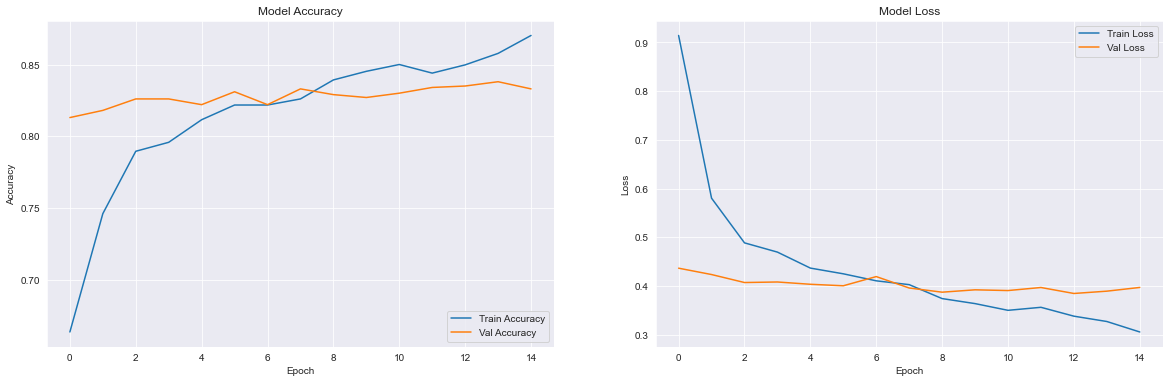

In [125]:
# Plot accuracy and loss
plot_accuracy_loss(history=history_clf_3, model_type='CLF')

### Evaluating the Model

In [126]:
# Model Evaluation
eval_acc_clf_3, eval_loss_clf_3, train_acc_clf_3, train_loss_clf_3 = evaluate_model(model_clf_3, Eval_X_clf_3, Eval_y, Train_X_clf_3, Train_y, 'CLF')

157/157 [==============================] - 52s 334ms/step - loss: 0.2756 - accuracy: 0.8852
Accuracy on Eval set = 83.24% & Loss on Eval set = 0.3873


# MODEL EVALUATION

**On the evaluation set:**

- Accuracy: 83.24%

- Loss: 0.3873

**This means that when the model was tested on the evaluation set, it achieved an accuracy of 83.24%, correctly classifying       approximately 83.24% of the samples. The loss value of 0.3873 indicates the average discrepancy between the predicted and       actual values for the evaluation set.**

**On the training set:**

- Accuracy: 88.52%

- Loss: 0.2756

**These values represent the performance of the model on the training set. The training accuracy of 88.52% indicates that the     model achieved an accuracy of approximately 88.52% on the training set. The training loss of 0.2756 represents the average       loss of the model's predictions on the training set.**

**In summary, the model performed reasonably well on both the evaluation set and training set, with an accuracy above 80% on       both. However, it is worth noting that the evaluation accuracy (83.24%) is slightly lower than the training accuracy (88.52%),   which suggests that the model may be slightly overfitting to the training data.**

57/57 [==============================] - 21s 312ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       887
           1       0.81      0.88      0.84       909

    accuracy                           0.83      1796
   macro avg       0.84      0.83      0.83      1796
weighted avg       0.83      0.83      0.83      1796





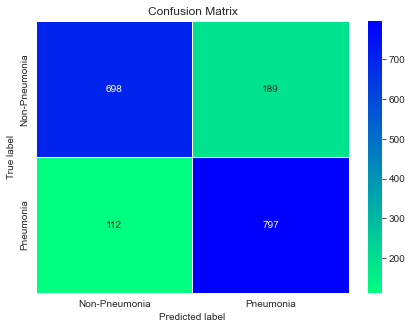

In [127]:
# Classification report & Confusion matrix
clf_report_and_conf_matrix(model_clf_3, Eval_X_clf_3, Eval_y)

- **True Positives (TP): 689**

  - This indicates the number of samples that were correctly predicted as "Non-Pneumonia".
  

- **True Negatives (TN): 797**

  - This indicates the number of samples that were correctly predicted as "Pneumonia".
  

- **False Positives (FP): 112**

  - This indicates the number of samples that were incorrectly predicted as "Non-Pneumonia" while they actually belong to the       "Pneumonia" class.
  

- **False Negatives (FN): 189**

  - This indicates the number of samples that were incorrectly predicted as "Pneumonia" while they actually belong to the "Non-     Pneumonia" class.
  
  
**The confusion matrix provides a breakdown of the model's performance for each class. In this case, the "Non-Pneumonia" class has 689 true positives and 112 false positives, while the "Pneumonia" class has 797 true negatives and 189 false negatives.**

### Updating the Model_Score

In [128]:
# Append the scores & loss
clf_model_scores['Model'].append('InceptionV3')
clf_model_scores['Train Score'].append(train_acc_clf_3)
clf_model_scores['Eval Score'].append(eval_acc_clf_3)
clf_model_scores['Train Loss'].append(train_loss_clf_3)
clf_model_scores['Eval Loss'].append(eval_loss_clf_3)

### Predictions on Model

In [129]:
# Predict the model on the evaluation dataset
predictions = model_clf_3.predict(Eval_X_clf_3)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Eval_y, axis=1)

# Compare true labels with predicted labels
for i in range(len(Eval_X_clf_3)):
    print("Image", i+1)
    print("True Label:", true_labels[i])
    print("Predicted Label:", predicted_labels[i])
    print("\n")

57/57 [==============================] - 18s 311ms/step
Image 1
True Label: 0
Predicted Label: 0


Image 2
True Label: 0
Predicted Label: 1


Image 3
True Label: 1
Predicted Label: 1


Image 4
True Label: 1
Predicted Label: 1


Image 5
True Label: 0
Predicted Label: 0


Image 6
True Label: 0
Predicted Label: 0


Image 7
True Label: 0
Predicted Label: 0


Image 8
True Label: 1
Predicted Label: 0


Image 9
True Label: 1
Predicted Label: 1


Image 10
True Label: 1
Predicted Label: 1


Image 11
True Label: 1
Predicted Label: 1


Image 12
True Label: 1
Predicted Label: 1


Image 13
True Label: 0
Predicted Label: 1


Image 14
True Label: 1
Predicted Label: 1


Image 15
True Label: 1
Predicted Label: 1


Image 16
True Label: 0
Predicted Label: 0


Image 17
True Label: 1
Predicted Label: 1


Image 18
True Label: 0
Predicted Label: 0


Image 19
True Label: 1
Predicted Label: 1


Image 20
True Label: 1
Predicted Label: 1


Image 21
True Label: 1
Predicted Label: 1


Image 22
True Label: 1
Predic


Image 220
True Label: 0
Predicted Label: 0


Image 221
True Label: 1
Predicted Label: 1


Image 222
True Label: 1
Predicted Label: 1


Image 223
True Label: 0
Predicted Label: 0


Image 224
True Label: 0
Predicted Label: 0


Image 225
True Label: 0
Predicted Label: 0


Image 226
True Label: 1
Predicted Label: 1


Image 227
True Label: 0
Predicted Label: 0


Image 228
True Label: 0
Predicted Label: 0


Image 229
True Label: 0
Predicted Label: 0


Image 230
True Label: 1
Predicted Label: 1


Image 231
True Label: 0
Predicted Label: 0


Image 232
True Label: 1
Predicted Label: 0


Image 233
True Label: 1
Predicted Label: 0


Image 234
True Label: 0
Predicted Label: 0


Image 235
True Label: 0
Predicted Label: 0


Image 236
True Label: 0
Predicted Label: 1


Image 237
True Label: 0
Predicted Label: 0


Image 238
True Label: 0
Predicted Label: 1


Image 239
True Label: 1
Predicted Label: 1


Image 240
True Label: 1
Predicted Label: 1


Image 241
True Label: 0
Predicted Label: 0


Image 242

Predicted Label: 1


Image 433
True Label: 0
Predicted Label: 0


Image 434
True Label: 0
Predicted Label: 0


Image 435
True Label: 1
Predicted Label: 1


Image 436
True Label: 1
Predicted Label: 1


Image 437
True Label: 1
Predicted Label: 1


Image 438
True Label: 0
Predicted Label: 1


Image 439
True Label: 0
Predicted Label: 0


Image 440
True Label: 0
Predicted Label: 0


Image 441
True Label: 1
Predicted Label: 1


Image 442
True Label: 1
Predicted Label: 1


Image 443
True Label: 1
Predicted Label: 1


Image 444
True Label: 1
Predicted Label: 1


Image 445
True Label: 1
Predicted Label: 1


Image 446
True Label: 1
Predicted Label: 1


Image 447
True Label: 0
Predicted Label: 0


Image 448
True Label: 1
Predicted Label: 0


Image 449
True Label: 1
Predicted Label: 1


Image 450
True Label: 0
Predicted Label: 0


Image 451
True Label: 1
Predicted Label: 1


Image 452
True Label: 0
Predicted Label: 0


Image 453
True Label: 0
Predicted Label: 0


Image 454
True Label: 1
Predicted 



Image 621
True Label: 1
Predicted Label: 1


Image 622
True Label: 1
Predicted Label: 1


Image 623
True Label: 1
Predicted Label: 1


Image 624
True Label: 0
Predicted Label: 1


Image 625
True Label: 0
Predicted Label: 0


Image 626
True Label: 1
Predicted Label: 1


Image 627
True Label: 1
Predicted Label: 0


Image 628
True Label: 0
Predicted Label: 1


Image 629
True Label: 0
Predicted Label: 0


Image 630
True Label: 1
Predicted Label: 1


Image 631
True Label: 1
Predicted Label: 1


Image 632
True Label: 1
Predicted Label: 1


Image 633
True Label: 0
Predicted Label: 0


Image 634
True Label: 1
Predicted Label: 1


Image 635
True Label: 0
Predicted Label: 0


Image 636
True Label: 1
Predicted Label: 1


Image 637
True Label: 1
Predicted Label: 1


Image 638
True Label: 0
Predicted Label: 0


Image 639
True Label: 1
Predicted Label: 1


Image 640
True Label: 1
Predicted Label: 0


Image 641
True Label: 1
Predicted Label: 1


Image 642
True Label: 1
Predicted Label: 1


Image 64

True Label: 0
Predicted Label: 0


Image 850
True Label: 0
Predicted Label: 0


Image 851
True Label: 1
Predicted Label: 1


Image 852
True Label: 1
Predicted Label: 1


Image 853
True Label: 1
Predicted Label: 1


Image 854
True Label: 0
Predicted Label: 1


Image 855
True Label: 0
Predicted Label: 0


Image 856
True Label: 1
Predicted Label: 1


Image 857
True Label: 1
Predicted Label: 0


Image 858
True Label: 1
Predicted Label: 0


Image 859
True Label: 0
Predicted Label: 0


Image 860
True Label: 1
Predicted Label: 1


Image 861
True Label: 1
Predicted Label: 1


Image 862
True Label: 0
Predicted Label: 0


Image 863
True Label: 1
Predicted Label: 1


Image 864
True Label: 1
Predicted Label: 1


Image 865
True Label: 1
Predicted Label: 0


Image 866
True Label: 0
Predicted Label: 0


Image 867
True Label: 0
Predicted Label: 0


Image 868
True Label: 0
Predicted Label: 0


Image 869
True Label: 1
Predicted Label: 1


Image 870
True Label: 1
Predicted Label: 1


Image 871
True Label


Image 1038
True Label: 0
Predicted Label: 0


Image 1039
True Label: 1
Predicted Label: 1


Image 1040
True Label: 1
Predicted Label: 1


Image 1041
True Label: 0
Predicted Label: 0


Image 1042
True Label: 1
Predicted Label: 1


Image 1043
True Label: 0
Predicted Label: 0


Image 1044
True Label: 0
Predicted Label: 0


Image 1045
True Label: 1
Predicted Label: 1


Image 1046
True Label: 0
Predicted Label: 0


Image 1047
True Label: 1
Predicted Label: 1


Image 1048
True Label: 0
Predicted Label: 0


Image 1049
True Label: 0
Predicted Label: 0


Image 1050
True Label: 0
Predicted Label: 0


Image 1051
True Label: 0
Predicted Label: 0


Image 1052
True Label: 0
Predicted Label: 0


Image 1053
True Label: 1
Predicted Label: 1


Image 1054
True Label: 1
Predicted Label: 1


Image 1055
True Label: 0
Predicted Label: 0


Image 1056
True Label: 1
Predicted Label: 1


Image 1057
True Label: 1
Predicted Label: 0


Image 1058
True Label: 1
Predicted Label: 0


Image 1059
True Label: 0
Predicte

True Label: 0
Predicted Label: 1


Image 1230
True Label: 0
Predicted Label: 1


Image 1231
True Label: 0
Predicted Label: 1


Image 1232
True Label: 0
Predicted Label: 0


Image 1233
True Label: 1
Predicted Label: 0


Image 1234
True Label: 1
Predicted Label: 1


Image 1235
True Label: 1
Predicted Label: 1


Image 1236
True Label: 1
Predicted Label: 1


Image 1237
True Label: 1
Predicted Label: 1


Image 1238
True Label: 1
Predicted Label: 1


Image 1239
True Label: 1
Predicted Label: 1


Image 1240
True Label: 0
Predicted Label: 0


Image 1241
True Label: 1
Predicted Label: 0


Image 1242
True Label: 1
Predicted Label: 1


Image 1243
True Label: 0
Predicted Label: 0


Image 1244
True Label: 0
Predicted Label: 0


Image 1245
True Label: 1
Predicted Label: 1


Image 1246
True Label: 0
Predicted Label: 0


Image 1247
True Label: 0
Predicted Label: 0


Image 1248
True Label: 0
Predicted Label: 0


Image 1249
True Label: 0
Predicted Label: 0


Image 1250
True Label: 0
Predicted Label: 0



True Label: 1
Predicted Label: 1


Image 1426
True Label: 0
Predicted Label: 0


Image 1427
True Label: 1
Predicted Label: 1


Image 1428
True Label: 0
Predicted Label: 0


Image 1429
True Label: 1
Predicted Label: 1


Image 1430
True Label: 0
Predicted Label: 0


Image 1431
True Label: 0
Predicted Label: 0


Image 1432
True Label: 0
Predicted Label: 0


Image 1433
True Label: 1
Predicted Label: 0


Image 1434
True Label: 1
Predicted Label: 1


Image 1435
True Label: 0
Predicted Label: 1


Image 1436
True Label: 1
Predicted Label: 1


Image 1437
True Label: 1
Predicted Label: 1


Image 1438
True Label: 1
Predicted Label: 1


Image 1439
True Label: 0
Predicted Label: 0


Image 1440
True Label: 0
Predicted Label: 0


Image 1441
True Label: 0
Predicted Label: 0


Image 1442
True Label: 0
Predicted Label: 0


Image 1443
True Label: 0
Predicted Label: 0


Image 1444
True Label: 1
Predicted Label: 0


Image 1445
True Label: 1
Predicted Label: 1


Image 1446
True Label: 0
Predicted Label: 0



Image 1702
True Label: 1
Predicted Label: 1


Image 1703
True Label: 1
Predicted Label: 1


Image 1704
True Label: 0
Predicted Label: 0


Image 1705
True Label: 1
Predicted Label: 1


Image 1706
True Label: 0
Predicted Label: 0


Image 1707
True Label: 0
Predicted Label: 0


Image 1708
True Label: 1
Predicted Label: 1


Image 1709
True Label: 0
Predicted Label: 0


Image 1710
True Label: 1
Predicted Label: 1


Image 1711
True Label: 0
Predicted Label: 0


Image 1712
True Label: 0
Predicted Label: 1


Image 1713
True Label: 1
Predicted Label: 1


Image 1714
True Label: 1
Predicted Label: 1


Image 1715
True Label: 0
Predicted Label: 0


Image 1716
True Label: 1
Predicted Label: 1


Image 1717
True Label: 0
Predicted Label: 1


Image 1718
True Label: 0
Predicted Label: 0


Image 1719
True Label: 1
Predicted Label: 1


Image 1720
True Label: 1
Predicted Label: 1


Image 1721
True Label: 0
Predicted Label: 0


Image 1722
True Label: 0
Predicted Label: 0


Image 1723
True Label: 0
Predicted

### Saving the Model

In [130]:
# Save the fine-tuned model as a pickle file
with open('model_clf_inceptionv3.pkl', 'wb') as file:
    pickle.dump(model_clf_3, file)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\activation
......vars
...layers\activation_1
......vars
...layers\activation_10
......vars
...layers\activation_11
......vars
...layers\activation_12
......vars
...layers\activation_13
......vars
...layers\activation_14
......vars
...layers\activation_15
......vars
...layers\activation_16
......vars
...layers\activation_17
......vars
...layers\activation_18
......vars
...layers\activation_19
......vars
...layers\activation_2
......vars
...layers\activation_20
......vars
...layers\activation_21
......vars
...layers\activation_22
......vars
...layers\activation_23
......vars
...layers\activation_24
......vars
...layers\activation_25
......vars
...layers\activation_26
......vars
...layers\activation_27
......vars
...layers\activation_28
......vars
...layers\activation_29
......vars
...layers\activation_3
......vars
...layers\activation_30
......vars
...layers\activation_31
......vars
...layers\activation_32
......

.........2
...layers\batch_normalization_66
......vars
.........0
.........1
.........2
...layers\batch_normalization_67
......vars
.........0
.........1
.........2
...layers\batch_normalization_68
......vars
.........0
.........1
.........2
...layers\batch_normalization_69
......vars
.........0
.........1
.........2
...layers\batch_normalization_7
......vars
.........0
.........1
.........2
...layers\batch_normalization_70
......vars
.........0
.........1
.........2
...layers\batch_normalization_71
......vars
.........0
.........1
.........2
...layers\batch_normalization_72
......vars
.........0
.........1
.........2
...layers\batch_normalization_73
......vars
.........0
.........1
.........2
...layers\batch_normalization_74
......vars
.........0
.........1
.........2
...layers\batch_normalization_75
......vars
.........0
.........1
.........2
...layers\batch_normalization_76
......vars
.........0
.........1
.........2
...layers\batch_normalization_77
......vars
.........0
.........1


In [131]:
del Train_X_clf_3
del Eval_X_clf_3

## <div style="background-color:#F3C130;font-size:25px;padding:10px 10px;color:black;border:4px solid #1C1B20"> NASNetMobile Model</div>

In [132]:
# Apply Pre-processing
Train_X_clf_4 = tf.keras.applications.nasnet.preprocess_input(np.copy(Train_X))
Eval_X_clf_4 = tf.keras.applications.nasnet.preprocess_input(np.copy(Eval_X))

### Model Architecture

In [133]:
# Instantiates the NASNetMobile architecture
base_model = tf.keras.applications.NASNetMobile(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Previous layers are non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Classification layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(2, activation='softmax')(x)

model_clf_4 = tf.keras.Model(inputs=base_model.input, outputs=output)

# Model summary
model_clf_4.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 63, 63, 32)   864         ['input_3[0][0]']                
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 63, 63, 32)   128         ['stem_conv1[0][0]']             
                                                                                                  
 activation_94 (Activation)     (None, 63, 63, 32)   0           ['stem_bn1[0][0]']         

 right2_stem_1 (BatchNormalizat                                  t2_stem_1[0][0]']                
 ion)                                                                                             
                                                                                                  
 separable_conv_1_reduction_rig  (None, 32, 32, 11)  1152        ['separable_conv_1_pad_reduction_
 ht3_stem_1 (SeparableConv2D)                                    right3_stem_1[0][0]']            
                                                                                                  
 separable_conv_1_reduction_lef  (None, 32, 32, 11)  220         ['activation_103[0][0]']         
 t4_stem_1 (SeparableConv2D)                                                                      
                                                                                                  
 activation_100 (Activation)    (None, 32, 32, 11)   0           ['separable_conv_1_bn_reduction_r
          

                                                                                                  
 reduction_concat_stem_1 (Conca  (None, 32, 32, 44)  0           ['reduction_add_2_stem_1[0][0]', 
 tenate)                                                          'reduction_add3_stem_1[0][0]',  
                                                                  'add[0][0]',                    
                                                                  'reduction_add4_stem_1[0][0]']  
                                                                                                  
 adjust_avg_pool_1_stem_2 (Aver  (None, 32, 32, 32)  0           ['adjust_relu_1_stem_2[0][0]']   
 agePooling2D)                                                                                    
                                                                                                  
 adjust_avg_pool_2_stem_2 (Aver  (None, 32, 32, 32)  0           ['cropping2d[0][0]']             
 agePoolin

 reduction_add_1_stem_2 (Add)   (None, 16, 16, 22)   0           ['separable_conv_2_bn_reduction_l
                                                                 eft1_stem_2[0][0]',              
                                                                  'separable_conv_2_bn_reduction_r
                                                                 ight1_stem_2[0][0]']             
                                                                                                  
 separable_conv_1_reduction_rig  (None, 16, 16, 22)  1562        ['separable_conv_1_pad_reduction_
 ht2_stem_2 (SeparableConv2D)                                    right2_stem_2[0][0]']            
                                                                                                  
 separable_conv_1_pad_reduction  (None, 35, 35, 22)  0           ['activation_112[0][0]']         
 _right3_stem_2 (ZeroPadding2D)                                                                   
          

 D)                                                                                               
                                                                                                  
 reduction_add3_stem_2 (Add)    (None, 16, 16, 22)   0           ['reduction_left3_stem_2[0][0]', 
                                                                  'separable_conv_2_bn_reduction_r
                                                                 ight3_stem_2[0][0]']             
                                                                                                  
 add_1 (Add)                    (None, 16, 16, 22)   0           ['reduction_add_2_stem_2[0][0]', 
                                                                  'reduction_left4_stem_2[0][0]'] 
                                                                                                  
 reduction_add4_stem_2 (Add)    (None, 16, 16, 22)   0           ['separable_conv_2_bn_reduction_l
          

 activation_118 (Activation)    (None, 16, 16, 44)   0           ['separable_conv_1_bn_normal_left
                                                                 1_0[0][0]']                      
                                                                                                  
 activation_120 (Activation)    (None, 16, 16, 44)   0           ['separable_conv_1_bn_normal_righ
                                                                 t1_0[0][0]']                     
                                                                                                  
 activation_122 (Activation)    (None, 16, 16, 44)   0           ['separable_conv_1_bn_normal_left
                                                                 2_0[0][0]']                      
                                                                                                  
 activation_124 (Activation)    (None, 16, 16, 44)   0           ['separable_conv_1_bn_normal_righ
          

 activation_128 (Activation)    (None, 16, 16, 264)  0           ['normal_concat_0[0][0]']        
                                                                                                  
 adjust_conv_projection_1 (Conv  (None, 16, 16, 44)  3872        ['activation_127[0][0]']         
 2D)                                                                                              
                                                                                                  
 normal_conv_1_1 (Conv2D)       (None, 16, 16, 44)   11616       ['activation_128[0][0]']         
                                                                                                  
 adjust_bn_1 (BatchNormalizatio  (None, 16, 16, 44)  176         ['adjust_conv_projection_1[0][0]'
 n)                                                              ]                                
                                                                                                  
 normal_bn

 separable_conv_2_bn_normal_lef  (None, 16, 16, 44)  176         ['separable_conv_2_normal_left1_1
 t1_1 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 separable_conv_2_bn_normal_rig  (None, 16, 16, 44)  176         ['separable_conv_2_normal_right1_
 ht1_1 (BatchNormalization)                                      1[0][0]']                        
                                                                                                  
 separable_conv_2_bn_normal_lef  (None, 16, 16, 44)  176         ['separable_conv_2_normal_left2_1
 t2_1 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 separable_conv_2_bn_normal_rig  (None, 16, 16, 44)  176         ['separable_conv_2_normal_right2_
 ht2_1 (Ba

 2 (SeparableConv2D)                                                                              
                                                                                                  
 separable_conv_1_normal_right2  (None, 16, 16, 44)  2332        ['activation_147[0][0]']         
 _2 (SeparableConv2D)                                                                             
                                                                                                  
 separable_conv_1_normal_left5_  (None, 16, 16, 44)  2332        ['activation_149[0][0]']         
 2 (SeparableConv2D)                                                                              
                                                                                                  
 separable_conv_1_bn_normal_lef  (None, 16, 16, 44)  176         ['separable_conv_1_normal_left1_2
 t1_2 (BatchNormalization)                                       [0][0]']                         
          

                                                                 2_2[0][0]',                      
                                                                  'separable_conv_2_bn_normal_righ
                                                                 t2_2[0][0]']                     
                                                                                                  
 normal_add_3_2 (Add)           (None, 16, 16, 44)   0           ['normal_left3_2[0][0]',         
                                                                  'adjust_bn_2[0][0]']            
                                                                                                  
 normal_add_4_2 (Add)           (None, 16, 16, 44)   0           ['normal_left4_2[0][0]',         
                                                                  'normal_right4_2[0][0]']        
                                                                                                  
 normal_ad

                                                                 2_3[0][0]']                      
                                                                                                  
 activation_160 (Activation)    (None, 16, 16, 44)   0           ['separable_conv_1_bn_normal_righ
                                                                 t2_3[0][0]']                     
                                                                                                  
 activation_162 (Activation)    (None, 16, 16, 44)   0           ['separable_conv_1_bn_normal_left
                                                                 5_3[0][0]']                      
                                                                                                  
 separable_conv_2_normal_left1_  (None, 16, 16, 44)  3036        ['activation_154[0][0]']         
 3 (SeparableConv2D)                                                                              
          

                                                                                                  
 reduction_bn_1_reduce_4 (Batch  (None, 16, 16, 88)  352         ['reduction_conv_1_reduce_4[0][0]
 Normalization)                                                  ']                               
                                                                                                  
 adjust_bn_reduce_4 (BatchNorma  (None, 16, 16, 88)  352         ['adjust_conv_projection_reduce_4
 lization)                                                       [0][0]']                         
                                                                                                  
 activation_165 (Activation)    (None, 16, 16, 88)   0           ['reduction_bn_1_reduce_4[0][0]']
                                                                                                  
 activation_167 (Activation)    (None, 16, 16, 88)   0           ['adjust_bn_reduce_4[0][0]']     
          

 separable_conv_1_reduction_lef  (None, 8, 8, 88)    8536        ['activation_173[0][0]']         
 t4_reduce_4 (SeparableConv2D)                                                                    
                                                                                                  
 activation_170 (Activation)    (None, 8, 8, 88)     0           ['separable_conv_1_bn_reduction_r
                                                                 ight2_reduce_4[0][0]']           
                                                                                                  
 separable_conv_1_bn_reduction_  (None, 8, 8, 88)    352         ['separable_conv_1_reduction_righ
 right3_reduce_4 (BatchNormaliz                                  t3_reduce_4[0][0]']              
 ation)                                                                                           
                                                                                                  
 separable

                                                                  'reduction_add4_reduce_4[0][0]']
                                                                                                  
 adjust_avg_pool_1_5 (AveragePo  (None, 8, 8, 264)   0           ['adjust_relu_1_5[0][0]']        
 oling2D)                                                                                         
                                                                                                  
 adjust_avg_pool_2_5 (AveragePo  (None, 8, 8, 264)   0           ['cropping2d_2[0][0]']           
 oling2D)                                                                                         
                                                                                                  
 adjust_conv_1_5 (Conv2D)       (None, 8, 8, 44)     11616       ['adjust_avg_pool_1_5[0][0]']    
                                                                                                  
 adjust_co

                                                                                                  
 separable_conv_2_normal_right1  (None, 8, 8, 88)    8536        ['activation_179[0][0]']         
 _5 (SeparableConv2D)                                                                             
                                                                                                  
 separable_conv_2_normal_left2_  (None, 8, 8, 88)    9944        ['activation_181[0][0]']         
 5 (SeparableConv2D)                                                                              
                                                                                                  
 separable_conv_2_normal_right2  (None, 8, 8, 88)    8536        ['activation_183[0][0]']         
 _5 (SeparableConv2D)                                                                             
                                                                                                  
 separable

                                                                                                  
 activation_192 (Activation)    (None, 8, 8, 88)     0           ['adjust_bn_6[0][0]']            
                                                                                                  
 activation_194 (Activation)    (None, 8, 8, 88)     0           ['adjust_bn_6[0][0]']            
                                                                                                  
 activation_196 (Activation)    (None, 8, 8, 88)     0           ['normal_bn_1_6[0][0]']          
                                                                                                  
 separable_conv_1_normal_left1_  (None, 8, 8, 88)    9944        ['activation_188[0][0]']         
 6 (SeparableConv2D)                                                                              
                                                                                                  
 separable

 2D)                                                                                              
                                                                                                  
 normal_right4_6 (AveragePoolin  (None, 8, 8, 88)    0           ['adjust_bn_6[0][0]']            
 g2D)                                                                                             
                                                                                                  
 separable_conv_2_bn_normal_lef  (None, 8, 8, 88)    352         ['separable_conv_2_normal_left5_6
 t5_6 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 normal_add_1_6 (Add)           (None, 8, 8, 88)     0           ['separable_conv_2_bn_normal_left
                                                                 1_6[0][0]',                      
          

                                                                                                  
 separable_conv_1_bn_normal_rig  (None, 8, 8, 88)    352         ['separable_conv_1_normal_right2_
 ht2_7 (BatchNormalization)                                      7[0][0]']                        
                                                                                                  
 separable_conv_1_bn_normal_lef  (None, 8, 8, 88)    352         ['separable_conv_1_normal_left5_7
 t5_7 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 activation_201 (Activation)    (None, 8, 8, 88)     0           ['separable_conv_1_bn_normal_left
                                                                 1_7[0][0]']                      
                                                                                                  
 activatio

                                                                  'normal_add_2_7[0][0]',         
                                                                  'normal_add_3_7[0][0]',         
                                                                  'normal_add_4_7[0][0]',         
                                                                  'normal_add_5_7[0][0]']         
                                                                                                  
 activation_210 (Activation)    (None, 8, 8, 528)    0           ['normal_concat_6[0][0]']        
                                                                                                  
 activation_211 (Activation)    (None, 8, 8, 528)    0           ['normal_concat_7[0][0]']        
                                                                                                  
 adjust_conv_projection_8 (Conv  (None, 8, 8, 88)    46464       ['activation_210[0][0]']         
 2D)      

                                                                                                  
 separable_conv_2_normal_right2  (None, 8, 8, 88)    8536        ['activation_219[0][0]']         
 _8 (SeparableConv2D)                                                                             
                                                                                                  
 separable_conv_2_normal_left5_  (None, 8, 8, 88)    8536        ['activation_221[0][0]']         
 8 (SeparableConv2D)                                                                              
                                                                                                  
 separable_conv_2_bn_normal_lef  (None, 8, 8, 88)    352         ['separable_conv_2_normal_left1_8
 t1_8 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 separable

 _right1_reduce_8 (ZeroPadding2                                                                   
 D)                                                                                               
                                                                                                  
 separable_conv_1_reduction_lef  (None, 4, 4, 176)   35376       ['separable_conv_1_pad_reduction_
 t1_reduce_8 (SeparableConv2D)                                   left1_reduce_8[0][0]']           
                                                                                                  
 separable_conv_1_reduction_rig  (None, 4, 4, 176)   39600       ['separable_conv_1_pad_reduction_
 ht1_reduce_8 (SeparableConv2D)                                  right1_reduce_8[0][0]']          
                                                                                                  
 separable_conv_1_bn_reduction_  (None, 4, 4, 176)   704         ['separable_conv_1_reduction_left
 left1_red

                                                                                                  
 separable_conv_2_reduction_rig  (None, 4, 4, 176)   39600       ['activation_229[0][0]']         
 ht2_reduce_8 (SeparableConv2D)                                                                   
                                                                                                  
 activation_231 (Activation)    (None, 4, 4, 176)    0           ['separable_conv_1_bn_reduction_r
                                                                 ight3_reduce_8[0][0]']           
                                                                                                  
 activation_233 (Activation)    (None, 4, 4, 176)    0           ['separable_conv_1_bn_reduction_l
                                                                 eft4_reduce_8[0][0]']            
                                                                                                  
 reduction

                                                                  'adjust_conv_2_9[0][0]']        
                                                                                                  
 normal_conv_1_9 (Conv2D)       (None, 4, 4, 176)    123904      ['activation_234[0][0]']         
                                                                                                  
 adjust_bn_9 (BatchNormalizatio  (None, 4, 4, 176)   704         ['concatenate_5[0][0]']          
 n)                                                                                               
                                                                                                  
 normal_bn_1_9 (BatchNormalizat  (None, 4, 4, 176)   704         ['normal_conv_1_9[0][0]']        
 ion)                                                                                             
                                                                                                  
 activatio

 separable_conv_2_bn_normal_rig  (None, 4, 4, 176)   704         ['separable_conv_2_normal_right1_
 ht1_9 (BatchNormalization)                                      9[0][0]']                        
                                                                                                  
 separable_conv_2_bn_normal_lef  (None, 4, 4, 176)   704         ['separable_conv_2_normal_left2_9
 t2_9 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 separable_conv_2_bn_normal_rig  (None, 4, 4, 176)   704         ['separable_conv_2_normal_right2_
 ht2_9 (BatchNormalization)                                      9[0][0]']                        
                                                                                                  
 normal_left3_9 (AveragePooling  (None, 4, 4, 176)   0           ['normal_bn_1_9[0][0]']          
 2D)      

 separable_conv_1_normal_right2  (None, 4, 4, 176)   32560       ['activation_253[0][0]']         
 _10 (SeparableConv2D)                                                                            
                                                                                                  
 separable_conv_1_normal_left5_  (None, 4, 4, 176)   32560       ['activation_255[0][0]']         
 10 (SeparableConv2D)                                                                             
                                                                                                  
 separable_conv_1_bn_normal_lef  (None, 4, 4, 176)   704         ['separable_conv_1_normal_left1_1
 t1_10 (BatchNormalization)                                      0[0][0]']                        
                                                                                                  
 separable_conv_1_bn_normal_rig  (None, 4, 4, 176)   704         ['separable_conv_1_normal_right1_
 ht1_10 (B

                                                                 t2_10[0][0]']                    
                                                                                                  
 normal_add_3_10 (Add)          (None, 4, 4, 176)    0           ['normal_left3_10[0][0]',        
                                                                  'adjust_bn_10[0][0]']           
                                                                                                  
 normal_add_4_10 (Add)          (None, 4, 4, 176)    0           ['normal_left4_10[0][0]',        
                                                                  'normal_right4_10[0][0]']       
                                                                                                  
 normal_add_5_10 (Add)          (None, 4, 4, 176)    0           ['separable_conv_2_bn_normal_left
                                                                 5_10[0][0]',                     
          

 activation_266 (Activation)    (None, 4, 4, 176)    0           ['separable_conv_1_bn_normal_righ
                                                                 t2_11[0][0]']                    
                                                                                                  
 activation_268 (Activation)    (None, 4, 4, 176)    0           ['separable_conv_1_bn_normal_left
                                                                 5_11[0][0]']                     
                                                                                                  
 separable_conv_2_normal_left1_  (None, 4, 4, 176)   35376       ['activation_260[0][0]']         
 11 (SeparableConv2D)                                                                             
                                                                                                  
 separable_conv_2_normal_right1  (None, 4, 4, 176)   32560       ['activation_262[0][0]']         
 _11 (Sepa

                                                                                                  
 normal_bn_1_12 (BatchNormaliza  (None, 4, 4, 176)   704         ['normal_conv_1_12[0][0]']       
 tion)                                                                                            
                                                                                                  
 activation_271 (Activation)    (None, 4, 4, 176)    0           ['normal_bn_1_12[0][0]']         
                                                                                                  
 activation_273 (Activation)    (None, 4, 4, 176)    0           ['adjust_bn_12[0][0]']           
                                                                                                  
 activation_275 (Activation)    (None, 4, 4, 176)    0           ['adjust_bn_12[0][0]']           
                                                                                                  
 activatio

 separable_conv_2_bn_normal_rig  (None, 4, 4, 176)   704         ['separable_conv_2_normal_right2_
 ht2_12 (BatchNormalization)                                     12[0][0]']                       
                                                                                                  
 normal_left3_12 (AveragePoolin  (None, 4, 4, 176)   0           ['normal_bn_1_12[0][0]']         
 g2D)                                                                                             
                                                                                                  
 normal_left4_12 (AveragePoolin  (None, 4, 4, 176)   0           ['adjust_bn_12[0][0]']           
 g2D)                                                                                             
                                                                                                  
 normal_right4_12 (AveragePooli  (None, 4, 4, 176)   0           ['adjust_bn_12[0][0]']           
 ng2D)    

**base_model = tf.keras.applications.NASNetMobile(input_shape=(128, 128, 3), include_top=False, weights='imagenet'):**

- This line creates an instance of the NASNetMobile model using the tf.keras.applications.NASNetMobile function.

- The input_shape parameter is set to (128, 128, 3), indicating that the model expects input images of size 128x128 pixels with 3 color channels (RGB).

- By setting include_top=False, the final fully connected layers responsible for classification are excluded from the model.

- The weights='imagenet' argument initializes the model with pre-trained weights from the ImageNet dataset, providing a good starting point for feature extraction.


**Freezing the base model layers:**

- The code iterates over each layer in the base_model and sets the trainable attribute to False.

- By doing this, the weights of the pre-trained layers are not updated during training. This approach allows us to keep the learned features intact while adding new classification layers on top.


**Classification layers:**

- x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output): This line adds a GlobalAveragePooling2D layer after the output of the base model. It computes the average value for each feature map, reducing the spatial dimensions.

- x = tf.keras.layers.Dense(512, activation='relu')(x): A Dense layer with 512 units and ReLU activation is added. This layer introduces non-linearity and helps in learning complex representations.

- x = tf.keras.layers.Dropout(0.5)(x): A Dropout layer with a rate of 0.5 is added. Dropout randomly sets a fraction of input units to 0 during training, reducing overfitting.

- x = tf.keras.layers.Dense(256, activation='relu')(x): Another Dense layer with 256 units and ReLU activation is added.

- x = tf.keras.layers.Dropout(0.5)(x): Another Dropout layer with a rate of 0.5 is added.

- output = tf.keras.layers.Dense(2, activation='softmax')(x): The final Dense layer with 2 units and softmax activation is added. It produces the classification probabilities for two classes.


**Creating the model:**

- model_clf_4 = tf.keras.Model(inputs=base_model.input, outputs=output): This line creates the final model using the tf.keras.Model function. It specifies the input layer as base_model.input and the output layer as output.


**Model summary:**

- model_clf_4.summary(): This line prints a summary of the model architecture, including the layer type, output shape, and the number of trainable parameters in each layer.


**The resulting model, model_clf_4, combines the feature extraction capabilities of the NASNetMobile base model with the added classification layers. By freezing the base model layers, the pre-trained weights are preserved, and the new layers are trained to adapt the model for the specific classification task at hand.**

**The model summary provides insights into the architecture, including the number of parameters in each layer and the flow of data through the network. It helps in understanding the complexity and structure of the model.**

### Compiling the Model

In [134]:
# Define optimizer and compile the model
model_clf_4.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

### Fitting the Model

In [135]:
# Fit the model
history_clf_4 = model_clf_4.fit(Train_X_clf_4, Train_y, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stop, reduce_lr])


Epoch 1/15
125/125 [==============================] - 93s 514ms/step - loss: 0.6189 - accuracy: 0.6762 - val_loss: 0.4312 - val_accuracy: 0.8240 - lr: 1.0000e-04
Epoch 2/15
125/125 [==============================] - 59s 471ms/step - loss: 0.4950 - accuracy: 0.7753 - val_loss: 0.4155 - val_accuracy: 0.8270 - lr: 1.0000e-04
Epoch 3/15
125/125 [==============================] - 59s 470ms/step - loss: 0.4657 - accuracy: 0.8002 - val_loss: 0.3936 - val_accuracy: 0.8410 - lr: 1.0000e-04
Epoch 4/15
125/125 [==============================] - 58s 463ms/step - loss: 0.4360 - accuracy: 0.8117 - val_loss: 0.3863 - val_accuracy: 0.8370 - lr: 1.0000e-04
Epoch 5/15
125/125 [==============================] - 58s 462ms/step - loss: 0.4215 - accuracy: 0.8242 - val_loss: 0.3772 - val_accuracy: 0.8440 - lr: 1.0000e-04
Epoch 6/15
125/125 [==============================] - 57s 454ms/step - loss: 0.4127 - accuracy: 0.8265 - val_loss: 0.3696 - val_accuracy: 0.8480 - lr: 1.0000e-04
Epoch 7/15
125/125 [========

### Ploting the Model

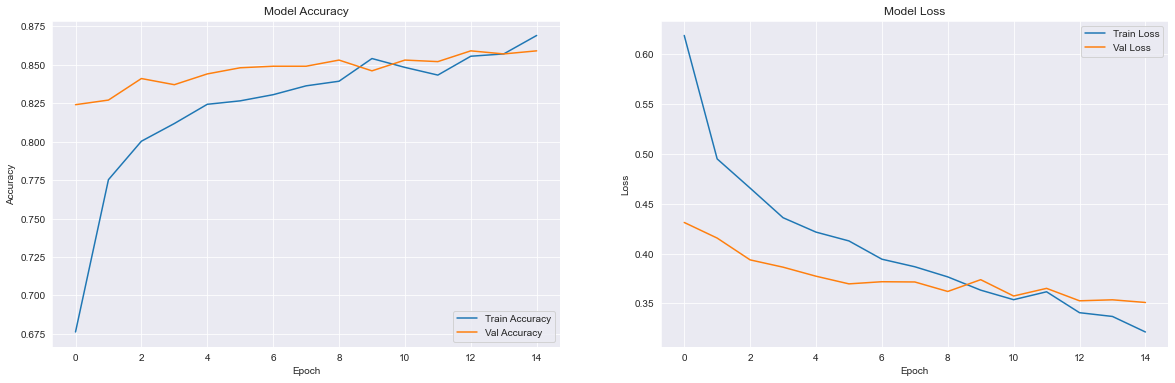

In [136]:
# Plot accuracy and loss
plot_accuracy_loss(history=history_clf_4, model_type='CLF')


### Evaluating the Model

In [137]:
# Model Evaluation
eval_acc_clf_4, eval_loss_clf_4, train_acc_clf_4, train_loss_clf_4 = evaluate_model(model_clf_4, Eval_X_clf_4, Eval_y, Train_X_clf_4, Train_y, 'CLF')


157/157 [==============================] - 38s 245ms/step - loss: 0.2895 - accuracy: 0.8792
Accuracy on Eval set = 84.74% & Loss on Eval set = 0.3866


# MODEL EVALUATION

**On the evaluation set:**

- Accuracy: 84.74%

- Loss: 0.3866

**This means that when the model was tested on the evaluation set, it achieved an accuracy of 84.74%, correctly classifying       approximately 84.74% of the samples. The loss value of 0.3866 indicates the average discrepancy between the predicted and       actual values for the evaluation set.**

**On the training set:**

- Accuracy: 87.92%

- Loss: 0.2895

**These values represent the performance of the model on the training set. The training accuracy of 87.92% indicates that the     model achieved an accuracy of approximately 87.92% on the training set. The training loss of 0.2895 represents the average       loss of the model's predictions on the training set.**

**In summary, the model performed reasonably well on both the evaluation set and training set, with an accuracy above 80% on       both. However, it is worth noting that the evaluation accuracy (84.74%) is slightly lower than the training accuracy (87.92%),   which suggests that the model may be slightly overfitting to the training data.**

57/57 [==============================] - 17s 221ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       887
           1       0.82      0.89      0.86       909

    accuracy                           0.85      1796
   macro avg       0.85      0.85      0.85      1796
weighted avg       0.85      0.85      0.85      1796





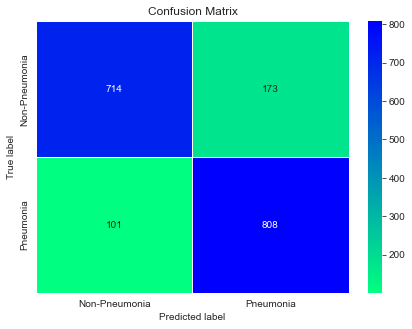

In [138]:
# Classification report & Confusion matrix
clf_report_and_conf_matrix(model_clf_4, Eval_X_clf_4, Eval_y)


- **True Positives (TP): 714**

  - This indicates the number of samples that were correctly predicted as "Non-Pneumonia".
  

- **True Negatives (TN): 808**

  - This indicates the number of samples that were correctly predicted as "Pneumonia".
  

- **False Positives (FP): 101**

  - This indicates the number of samples that were incorrectly predicted as "Non-Pneumonia" while they actually belong to the       "Pneumonia" class.
  

- **False Negatives (FN): 173**

  - This indicates the number of samples that were incorrectly predicted as "Pneumonia" while they actually belong to the "Non-     Pneumonia" class.
  
  
**The confusion matrix provides a breakdown of the model's performance for each class. In this case, the "Non-Pneumonia" class has 714 true positives and 101 false positives, while the "Pneumonia" class has 808 true negatives and 173 false negatives.**

### Updating the Model_Score

In [139]:
# Append the scores & loss
clf_model_scores['Model'].append('NASNetMobile')
clf_model_scores['Train Score'].append(train_acc_clf_4)
clf_model_scores['Eval Score'].append(eval_acc_clf_4)
clf_model_scores['Train Loss'].append(train_loss_clf_4)
clf_model_scores['Eval Loss'].append(eval_loss_clf_4)


### Predictions on Model

In [140]:
# Predict the model on the evaluation dataset
predictions = model_clf_4.predict(Eval_X_clf_4)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Eval_y, axis=1)

# Compare true labels with predicted labels
for i in range(len(Eval_X_clf_4)):
    print("Image", i+1)
    print("True Label:", true_labels[i])
    print("Predicted Label:", predicted_labels[i])
    print("\n")

57/57 [==============================] - 12s 217ms/step
Image 1
True Label: 0
Predicted Label: 0


Image 2
True Label: 0
Predicted Label: 1


Image 3
True Label: 1
Predicted Label: 1


Image 4
True Label: 1
Predicted Label: 1


Image 5
True Label: 0
Predicted Label: 0


Image 6
True Label: 0
Predicted Label: 0


Image 7
True Label: 0
Predicted Label: 0


Image 8
True Label: 1
Predicted Label: 1


Image 9
True Label: 1
Predicted Label: 1


Image 10
True Label: 1
Predicted Label: 1


Image 11
True Label: 1
Predicted Label: 1


Image 12
True Label: 1
Predicted Label: 1


Image 13
True Label: 0
Predicted Label: 1


Image 14
True Label: 1
Predicted Label: 1


Image 15
True Label: 1
Predicted Label: 1


Image 16
True Label: 0
Predicted Label: 0


Image 17
True Label: 1
Predicted Label: 1


Image 18
True Label: 0
Predicted Label: 0


Image 19
True Label: 1
Predicted Label: 1


Image 20
True Label: 1
Predicted Label: 1


Image 21
True Label: 1
Predicted Label: 1


Image 22
True Label: 1
Predic

Predicted Label: 0


Image 215
True Label: 0
Predicted Label: 0


Image 216
True Label: 0
Predicted Label: 0


Image 217
True Label: 1
Predicted Label: 1


Image 218
True Label: 1
Predicted Label: 1


Image 219
True Label: 1
Predicted Label: 1


Image 220
True Label: 0
Predicted Label: 0


Image 221
True Label: 1
Predicted Label: 1


Image 222
True Label: 1
Predicted Label: 1


Image 223
True Label: 0
Predicted Label: 0


Image 224
True Label: 0
Predicted Label: 0


Image 225
True Label: 0
Predicted Label: 0


Image 226
True Label: 1
Predicted Label: 1


Image 227
True Label: 0
Predicted Label: 0


Image 228
True Label: 0
Predicted Label: 0


Image 229
True Label: 0
Predicted Label: 0


Image 230
True Label: 1
Predicted Label: 1


Image 231
True Label: 0
Predicted Label: 0


Image 232
True Label: 1
Predicted Label: 0


Image 233
True Label: 1
Predicted Label: 1


Image 234
True Label: 0
Predicted Label: 0


Image 235
True Label: 0
Predicted Label: 0


Image 236
True Label: 0
Predicted 

Predicted Label: 1


Image 431
True Label: 1
Predicted Label: 1


Image 432
True Label: 1
Predicted Label: 1


Image 433
True Label: 0
Predicted Label: 0


Image 434
True Label: 0
Predicted Label: 0


Image 435
True Label: 1
Predicted Label: 1


Image 436
True Label: 1
Predicted Label: 1


Image 437
True Label: 1
Predicted Label: 0


Image 438
True Label: 0
Predicted Label: 1


Image 439
True Label: 0
Predicted Label: 0


Image 440
True Label: 0
Predicted Label: 0


Image 441
True Label: 1
Predicted Label: 1


Image 442
True Label: 1
Predicted Label: 1


Image 443
True Label: 1
Predicted Label: 0


Image 444
True Label: 1
Predicted Label: 1


Image 445
True Label: 1
Predicted Label: 1


Image 446
True Label: 1
Predicted Label: 1


Image 447
True Label: 0
Predicted Label: 0


Image 448
True Label: 1
Predicted Label: 1


Image 449
True Label: 1
Predicted Label: 1


Image 450
True Label: 0
Predicted Label: 0


Image 451
True Label: 1
Predicted Label: 1


Image 452
True Label: 0
Predicted 

Predicted Label: 0


Image 731
True Label: 1
Predicted Label: 1


Image 732
True Label: 1
Predicted Label: 1


Image 733
True Label: 1
Predicted Label: 1


Image 734
True Label: 1
Predicted Label: 1


Image 735
True Label: 0
Predicted Label: 0


Image 736
True Label: 0
Predicted Label: 0


Image 737
True Label: 0
Predicted Label: 0


Image 738
True Label: 1
Predicted Label: 1


Image 739
True Label: 0
Predicted Label: 0


Image 740
True Label: 1
Predicted Label: 0


Image 741
True Label: 0
Predicted Label: 0


Image 742
True Label: 1
Predicted Label: 1


Image 743
True Label: 0
Predicted Label: 0


Image 744
True Label: 0
Predicted Label: 0


Image 745
True Label: 1
Predicted Label: 1


Image 746
True Label: 1
Predicted Label: 1


Image 747
True Label: 1
Predicted Label: 1


Image 748
True Label: 1
Predicted Label: 1


Image 749
True Label: 0
Predicted Label: 1


Image 750
True Label: 0
Predicted Label: 0


Image 751
True Label: 0
Predicted Label: 0


Image 752
True Label: 1
Predicted 

Predicted Label: 0


Image 1037
True Label: 1
Predicted Label: 0


Image 1038
True Label: 0
Predicted Label: 0


Image 1039
True Label: 1
Predicted Label: 1


Image 1040
True Label: 1
Predicted Label: 1


Image 1041
True Label: 0
Predicted Label: 0


Image 1042
True Label: 1
Predicted Label: 1


Image 1043
True Label: 0
Predicted Label: 0


Image 1044
True Label: 0
Predicted Label: 0


Image 1045
True Label: 1
Predicted Label: 1


Image 1046
True Label: 0
Predicted Label: 0


Image 1047
True Label: 1
Predicted Label: 1


Image 1048
True Label: 0
Predicted Label: 0


Image 1049
True Label: 0
Predicted Label: 0


Image 1050
True Label: 0
Predicted Label: 0


Image 1051
True Label: 0
Predicted Label: 0


Image 1052
True Label: 0
Predicted Label: 0


Image 1053
True Label: 1
Predicted Label: 1


Image 1054
True Label: 1
Predicted Label: 1


Image 1055
True Label: 0
Predicted Label: 0


Image 1056
True Label: 1
Predicted Label: 1


Image 1057
True Label: 1
Predicted Label: 0


Image 1058
Tr



Image 1311
True Label: 0
Predicted Label: 0


Image 1312
True Label: 1
Predicted Label: 0


Image 1313
True Label: 1
Predicted Label: 1


Image 1314
True Label: 0
Predicted Label: 0


Image 1315
True Label: 0
Predicted Label: 1


Image 1316
True Label: 1
Predicted Label: 1


Image 1317
True Label: 0
Predicted Label: 0


Image 1318
True Label: 0
Predicted Label: 0


Image 1319
True Label: 1
Predicted Label: 1


Image 1320
True Label: 1
Predicted Label: 1


Image 1321
True Label: 0
Predicted Label: 0


Image 1322
True Label: 1
Predicted Label: 1


Image 1323
True Label: 0
Predicted Label: 0


Image 1324
True Label: 1
Predicted Label: 1


Image 1325
True Label: 1
Predicted Label: 1


Image 1326
True Label: 1
Predicted Label: 1


Image 1327
True Label: 0
Predicted Label: 0


Image 1328
True Label: 1
Predicted Label: 1


Image 1329
True Label: 0
Predicted Label: 0


Image 1330
True Label: 0
Predicted Label: 0


Image 1331
True Label: 1
Predicted Label: 1


Image 1332
True Label: 1
Predict

Image 1599
True Label: 0
Predicted Label: 0


Image 1600
True Label: 0
Predicted Label: 0


Image 1601
True Label: 1
Predicted Label: 1


Image 1602
True Label: 0
Predicted Label: 0


Image 1603
True Label: 1
Predicted Label: 0


Image 1604
True Label: 0
Predicted Label: 0


Image 1605
True Label: 1
Predicted Label: 1


Image 1606
True Label: 0
Predicted Label: 0


Image 1607
True Label: 0
Predicted Label: 0


Image 1608
True Label: 1
Predicted Label: 1


Image 1609
True Label: 0
Predicted Label: 1


Image 1610
True Label: 1
Predicted Label: 1


Image 1611
True Label: 1
Predicted Label: 1


Image 1612
True Label: 0
Predicted Label: 0


Image 1613
True Label: 0
Predicted Label: 0


Image 1614
True Label: 0
Predicted Label: 0


Image 1615
True Label: 0
Predicted Label: 1


Image 1616
True Label: 0
Predicted Label: 0


Image 1617
True Label: 1
Predicted Label: 0


Image 1618
True Label: 0
Predicted Label: 1


Image 1619
True Label: 0
Predicted Label: 0


Image 1620
True Label: 1
Predicted

True Label: 0
Predicted Label: 0


Image 1788
True Label: 0
Predicted Label: 0


Image 1789
True Label: 1
Predicted Label: 0


Image 1790
True Label: 0
Predicted Label: 0


Image 1791
True Label: 0
Predicted Label: 0


Image 1792
True Label: 1
Predicted Label: 1


Image 1793
True Label: 1
Predicted Label: 1


Image 1794
True Label: 1
Predicted Label: 1


Image 1795
True Label: 1
Predicted Label: 1


Image 1796
True Label: 1
Predicted Label: 0




### Saving the Model

In [141]:
# Save the fine-tuned model as a pickle file
with open('model_clf_NASNetMobile.pkl', 'wb') as file:
    pickle.dump(model_clf_4, file)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\activation
......vars
...layers\activation_1
......vars
...layers\activation_10
......vars
...layers\activation_100
......vars
...layers\activation_101
......vars
...layers\activation_102
......vars
...layers\activation_103
......vars
...layers\activation_104
......vars
...layers\activation_105
......vars
...layers\activation_106
......vars
...layers\activation_107
......vars
...layers\activation_108
......vars
...layers\activation_109
......vars
...layers\activation_11
......vars
...layers\activation_110
......vars
...layers\activation_111
......vars
...layers\activation_112
......vars
...layers\activation_113
......vars
...layers\activation_114
......vars
...layers\activation_115
......vars
...layers\activation_116
......vars
...layers\activation_117
......vars
...layers\activation_118
......vars
...layers\activation_119
......vars
...layers\activation_12
......vars
...layers\activation_120
......vars
...laye

.........2
.........3
...layers\batch_normalization_129
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_13
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_130
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_131
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_132
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_133
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_134
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_135
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_136
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_137
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_138
......vars
.........0
.........1
.........2
.........3


.........1
.........2
.........3
...layers\batch_normalization_53
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_54
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_55
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_56
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_57
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_58
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_59
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_6
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_60
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_61
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_62
......vars
.........0
.........1
.........2
.........3


...layers\separable_conv2d_27
......vars
.........0
.........1
...layers\separable_conv2d_28
......vars
.........0
.........1
...layers\separable_conv2d_29
......vars
.........0
.........1
...layers\separable_conv2d_3
......vars
.........0
.........1
...layers\separable_conv2d_30
......vars
.........0
.........1
...layers\separable_conv2d_31
......vars
.........0
.........1
...layers\separable_conv2d_32
......vars
.........0
.........1
...layers\separable_conv2d_33
......vars
.........0
.........1
...layers\separable_conv2d_34
......vars
.........0
.........1
...layers\separable_conv2d_35
......vars
.........0
.........1
...layers\separable_conv2d_36
......vars
.........0
.........1
...layers\separable_conv2d_37
......vars
.........0
.........1
...layers\separable_conv2d_38
......vars
.........0
.........1
...layers\separable_conv2d_39
......vars
.........0
.........1
...layers\separable_conv2d_4
......vars
.........0
.........1
...layers\separable_conv2d_40
......vars
.........0
.....

In [142]:
del Train_X_clf_4
del Eval_X_clf_4

## <div style="background-color:#F3C130;font-size:25px;padding:10px 10px;color:black;border:4px solid #1C1B20">RSNet152V2 Model</div>

In [143]:
Train_X_clf_6 = tf.keras.applications.resnet_v2.preprocess_input(np.copy(Train_X))
Eval_X_clf_6 = tf.keras.applications.resnet_v2.preprocess_input(np.copy(Eval_X))

### Compiling the model

In [144]:
# Instantiates the MobileNet architecture

base_model = tf.keras.applications.ResNet152V2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Previous layers are non-trainable
for layer in base_model.layers:
    layer.trainable = False
    
# Classification layers    
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(2, activation='softmax')(x)

model_clf_6 = tf.keras.Model(inputs=base_model.input, outputs=output)

model_clf_6.summary()

234545216/234545216 [==============================] - 48s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 32, 32, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 32, 32, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 32, 32, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 16, 16, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block2_2_relu[0][0]']    
          

                                                                 ]                                
                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_2_pad (ZeroPaddin  (None, 18, 18, 128)  0          ['conv3_block5_1_relu[0][0]']    
 g2D)                                                                                             
          

 conv3_block7_out (Add)         (None, 16, 16, 512)  0           ['conv3_block6_out[0][0]',       
                                                                  'conv3_block7_3_conv[0][0]']    
                                                                                                  
 conv3_block8_preact_bn (BatchN  (None, 16, 16, 512)  2048       ['conv3_block7_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv3_block8_preact_relu (Acti  (None, 16, 16, 512)  0          ['conv3_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv3_block8_1_conv (Conv2D)   (None, 16, 16, 128)  65536       ['conv3_block8_preact_relu[0][0]'
          

 conv4_block2_1_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_pad (ZeroPaddin  (None, 10, 10, 256)  0          ['conv4_block2_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 8, 8, 256)    589824      ['conv4_block2_2_pad[0][0]']     
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block5_preact_relu (Acti  (None, 8, 8, 1024)  0           ['conv4_block5_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 8, 8, 256)    262144      ['conv4_block5_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block7_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block7_2_relu[0][0]']    
                                                                                                  
 conv4_block7_out (Add)         (None, 8, 8, 1024)   0           ['conv4_block6_out[0][0]',       
                                                                  'conv4_block7_3_conv[0][0]']    
                                                                                                  
 conv4_block8_preact_bn (BatchN  (None, 8, 8, 1024)  4096        ['conv4_block7_out[0][0]']       
 ormalization)                                                                                    
          

 on)                                                                                              
                                                                                                  
 conv4_block10_2_pad (ZeroPaddi  (None, 10, 10, 256)  0          ['conv4_block10_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block10_2_conv (Conv2D)  (None, 8, 8, 256)    589824      ['conv4_block10_2_pad[0][0]']    
                                                                                                  
 conv4_block10_2_bn (BatchNorma  (None, 8, 8, 256)   1024        ['conv4_block10_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block13_preact_relu (Act  (None, 8, 8, 1024)  0           ['conv4_block13_preact_bn[0][0]']
 ivation)                                                                                         
                                                                                                  
 conv4_block13_1_conv (Conv2D)  (None, 8, 8, 256)    262144      ['conv4_block13_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block13_1_bn (BatchNorma  (None, 8, 8, 256)   1024        ['conv4_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block13_1_relu (Activati  (None, 8, 8, 256)   0           ['conv4_block13_1_bn[0][0]']     
 on)      

 on)                                                                                              
                                                                                                  
 conv4_block15_3_conv (Conv2D)  (None, 8, 8, 1024)   263168      ['conv4_block15_2_relu[0][0]']   
                                                                                                  
 conv4_block15_out (Add)        (None, 8, 8, 1024)   0           ['conv4_block14_out[0][0]',      
                                                                  'conv4_block15_3_conv[0][0]']   
                                                                                                  
 conv4_block16_preact_bn (Batch  (None, 8, 8, 1024)  4096        ['conv4_block15_out[0][0]']      
 Normalization)                                                                                   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block18_2_pad (ZeroPaddi  (None, 10, 10, 256)  0          ['conv4_block18_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block18_2_conv (Conv2D)  (None, 8, 8, 256)    589824      ['conv4_block18_2_pad[0][0]']    
                                                                                                  
 conv4_block18_2_bn (BatchNorma  (None, 8, 8, 256)   1024        ['conv4_block18_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block18_2_relu (Activati  (None, 8, 8, 256)   0           ['conv4_block18_2_bn[0][0]']     
 on)      

 ivation)                                                                                         
                                                                                                  
 conv4_block21_1_conv (Conv2D)  (None, 8, 8, 256)    262144      ['conv4_block21_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block21_1_bn (BatchNorma  (None, 8, 8, 256)   1024        ['conv4_block21_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block21_1_relu (Activati  (None, 8, 8, 256)   0           ['conv4_block21_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block23_3_conv (Conv2D)  (None, 8, 8, 1024)   263168      ['conv4_block23_2_relu[0][0]']   
                                                                                                  
 conv4_block23_out (Add)        (None, 8, 8, 1024)   0           ['conv4_block22_out[0][0]',      
                                                                  'conv4_block23_3_conv[0][0]']   
                                                                                                  
 conv4_block24_preact_bn (Batch  (None, 8, 8, 1024)  4096        ['conv4_block23_out[0][0]']      
 Normalization)                                                                                   
                                                                                                  
 conv4_block24_preact_relu (Act  (None, 8, 8, 1024)  0           ['conv4_block24_preact_bn[0][0]']
 ivation) 

 conv4_block26_2_pad (ZeroPaddi  (None, 10, 10, 256)  0          ['conv4_block26_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block26_2_conv (Conv2D)  (None, 8, 8, 256)    589824      ['conv4_block26_2_pad[0][0]']    
                                                                                                  
 conv4_block26_2_bn (BatchNorma  (None, 8, 8, 256)   1024        ['conv4_block26_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block26_2_relu (Activati  (None, 8, 8, 256)   0           ['conv4_block26_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 8, 8, 256)    262144      ['conv4_block29_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 8, 8, 256)   1024        ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 8, 8, 256)   0           ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block31_3_conv (Conv2D)  (None, 8, 8, 1024)   263168      ['conv4_block31_2_relu[0][0]']   
                                                                                                  
 conv4_block31_out (Add)        (None, 8, 8, 1024)   0           ['conv4_block30_out[0][0]',      
                                                                  'conv4_block31_3_conv[0][0]']   
                                                                                                  
 conv4_block32_preact_bn (Batch  (None, 8, 8, 1024)  4096        ['conv4_block31_out[0][0]']      
 Normalization)                                                                                   
                                                                                                  
 conv4_block32_preact_relu (Act  (None, 8, 8, 1024)  0           ['conv4_block32_preact_bn[0][0]']
 ivation)                                                                                         
          

 ng2D)                                                                                            
                                                                                                  
 conv4_block34_2_conv (Conv2D)  (None, 8, 8, 256)    589824      ['conv4_block34_2_pad[0][0]']    
                                                                                                  
 conv4_block34_2_bn (BatchNorma  (None, 8, 8, 256)   1024        ['conv4_block34_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block34_2_relu (Activati  (None, 8, 8, 256)   0           ['conv4_block34_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv5_block1_preact_relu (Acti  (None, 4, 4, 1024)  0           ['conv5_block1_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 4, 4, 512)    524288      ['conv5_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 4, 4, 512)   2048        ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block1_1_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv5_block3_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block3_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block3_2_relu[0][0]']    
                                                                                                  
 conv5_block3_out (Add)         (None, 4, 4, 2048)   0           ['conv5_block2_out[0][0]',       
                                                                  'conv5_block3_3_conv[0][0]']    
                                                                                                  
 post_bn (

**base_model = tf.keras.applications.ResNet152V2(input_shape=(128, 128, 3), include_top=False, weights='imagenet'):**


- This line creates an instance of the ResNet152V2 model using the tf.keras.applications.ResNet152V2 function.

- The input_shape parameter is set to (128, 128, 3), indicating that the model expects input images of size 128x128 pixels with 3 color channels (RGB).

- y setting include_top=False, the final fully connected layers responsible for classification are excluded from the model.

- The weights='imagenet' argument initializes the model with pre-trained weights from the ImageNet dataset, providing a good starting point for feature extraction.


**Freezing the base model layers:**


- The code iterates over each layer in the base_model and sets the trainable attribute to False.

- By doing this, the weights of the pre-trained layers are not updated during training. This approach allows us to keep the learned features intact while adding new classification layers on top.


**Classification layers:**


- x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output): This line adds a GlobalAveragePooling2D layer after the output of the base model. It computes the average value for each feature map, reducing the spatial dimensions.

- x = tf.keras.layers.Dense(512, activation='relu')(x): A Dense layer with 512 units and ReLU activation is added. This layer introduces non-linearity and helps in learning complex representations.

- x = tf.keras.layers.Dropout(0.5)(x): A Dropout layer with a rate of 0.5 is added. Dropout randomly sets a fraction of input units to 0 during training, reducing overfitting.

- tf.keras.layers.Dense(256, activation='relu')(x): Another Dense layer with 256 units and ReLU activation is added.

- x = tf.keras.layers.Dropout(0.5)(x): Another Dropout layer with a rate of 0.5 is added.

- output = tf.keras.layers.Dense(2, activation='softmax')(x): The final Dense layer with 2 units and softmax activation is added. It produces the classification probabilities for two classes.


**Creating the model:**


- model_clf_6 = tf.keras.Model(inputs=base_model.input, outputs=output): This line creates the final model using the tf.keras.Model function. It specifies the input layer as base_model.input and the output layer as output.


**Model summary:**


- model_clf_6.summary(): This line prints a summary of the model architecture, including the layer type, output shape, and the number of trainable parameters in each layer.


**The resulting model, model_clf_6, combines the feature extraction capabilities of the ResNet152V2 base model with the added classification layers. By freezing the base model layers, the pre-trained weights are preserved, and the new layers are trained to adapt the model for the specific classification task at hand.**

**The model summary provides insights into the architecture, including the number of parameters in each layer and the flow of data through the network. It helps in understanding the complexity and structure of the model.**

### Compiling the Model

In [145]:
# Define optimizer and compile the model
model_clf_6.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

### Fitting the Model

In [146]:
# Fit the model
history_clf_6 = model_clf_6.fit(Train_X_clf_6, Train_y, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stop, reduce_lr])


Epoch 1/15
125/125 [==============================] - 189s 1s/step - loss: 0.8707 - accuracy: 0.7055 - val_loss: 0.3966 - val_accuracy: 0.8310 - lr: 1.0000e-04
Epoch 2/15
125/125 [==============================] - 182s 1s/step - loss: 0.5613 - accuracy: 0.7715 - val_loss: 0.3745 - val_accuracy: 0.8450 - lr: 1.0000e-04
Epoch 3/15
125/125 [==============================] - 180s 1s/step - loss: 0.4746 - accuracy: 0.7987 - val_loss: 0.3656 - val_accuracy: 0.8470 - lr: 1.0000e-04
Epoch 4/15
125/125 [==============================] - 179s 1s/step - loss: 0.4449 - accuracy: 0.8127 - val_loss: 0.3694 - val_accuracy: 0.8570 - lr: 1.0000e-04
Epoch 5/15
125/125 [==============================] - 179s 1s/step - loss: 0.4178 - accuracy: 0.8265 - val_loss: 0.3616 - val_accuracy: 0.8540 - lr: 1.0000e-04
Epoch 6/15
125/125 [==============================] - 178s 1s/step - loss: 0.3943 - accuracy: 0.8310 - val_loss: 0.3561 - val_accuracy: 0.8570 - lr: 1.0000e-04
Epoch 7/15
125/125 [====================

### Ploting the Model

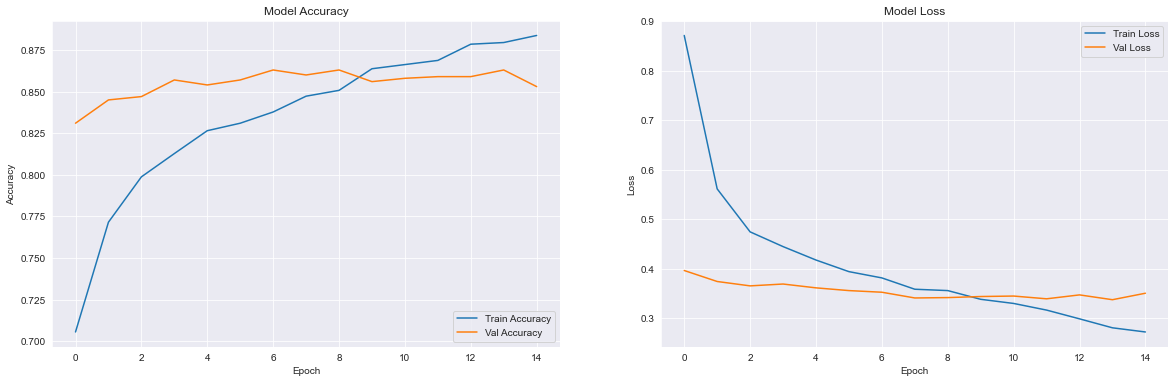

In [147]:
# Plot accuracy and loss
plot_accuracy_loss(history=history_clf_6, model_type='CLF')


### Evaluating the Model

In [148]:
# Model Evaluation
eval_acc_clf_6, eval_loss_clf_6, train_acc_clf_6, train_loss_clf_6 = evaluate_model(model_clf_6, Eval_X_clf_6, Eval_y, Train_X_clf_6, Train_y, 'CLF')


157/157 [==============================] - 228s 1s/step - loss: 0.2493 - accuracy: 0.9040
Accuracy on Eval set = 85.19% & Loss on Eval set = 0.3596


# MODEL EVALUATION

**On the evaluation set:**

- Accuracy: 85.19%

- Loss: 0.3596

**This means that when the model was tested on the evaluation set, it achieved an accuracy of 85.19%, correctly classifying       approximately 85.19% of the samples. The loss value of 0.3596 indicates the average discrepancy between the predicted and       actual values for the evaluation set.**

**On the training set:**

- Accuracy: 90.40%

- Loss: 0.2493

**These values represent the performance of the model on the training set. The training accuracy of 90.40% indicates that the     model achieved an accuracy of approximately 90.40% on the training set. The training loss of 0.2493 represents the average       loss of the model's predictions on the training set.**

**In summary, the model performed reasonably well on both the evaluation set and training set, with an accuracy above 80% on       both. However, it is worth noting that the evaluation accuracy (85.19%) is slightly lower than the training accuracy (90.40%),   which suggests that the model may be slightly overfitting to the training data.**

57/57 [==============================] - 124s 2s/step
Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       887
           1       0.86      0.84      0.85       909

    accuracy                           0.85      1796
   macro avg       0.85      0.85      0.85      1796
weighted avg       0.85      0.85      0.85      1796





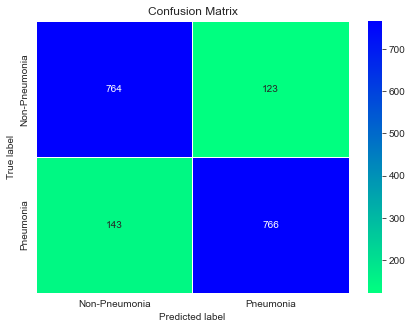

In [149]:
# Classification report & Confusion matrix
clf_report_and_conf_matrix(model_clf_6, Eval_X_clf_6, Eval_y)

- **True Positives (TP): 764**

  - This indicates the number of samples that were correctly predicted as "Non-Pneumonia".
  

- **True Negatives (TN): 766**

  - This indicates the number of samples that were correctly predicted as "Pneumonia".
  

- **False Positives (FP): 143**

  - This indicates the number of samples that were incorrectly predicted as "Non-Pneumonia" while they actually belong to the       "Pneumonia" class.
  

- **False Negatives (FN): 123**

  - This indicates the number of samples that were incorrectly predicted as "Pneumonia" while they actually belong to the "Non-     Pneumonia" class.
  
  
**The confusion matrix provides a breakdown of the model's performance for each class. In this case, the "Non-Pneumonia" class has 764 true positives and 143 false positives, while the "Pneumonia" class has 766 true negatives and 123 false negatives.**

### Updating the Model_Score

In [150]:
# Append the scores & loss
clf_model_scores['Model'].append('RSNet152V2')
clf_model_scores['Train Score'].append(train_acc_clf_6)
clf_model_scores['Eval Score'].append(eval_acc_clf_6)
clf_model_scores['Train Loss'].append(train_loss_clf_6)
clf_model_scores['Eval Loss'].append(eval_loss_clf_6)

### Predictions on Model

In [151]:
# Predict the model on the evaluation dataset
predictions = model_clf_6.predict(Eval_X_clf_6)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Eval_y, axis=1)

# Compare true labels with predicted labels
for i in range(len(Eval_X_clf_6)):
    print("Image", i+1)
    print("True Label:", true_labels[i])
    print("Predicted Label:", predicted_labels[i])
    print("\n")

57/57 [==============================] - 89s 2s/step
Image 1
True Label: 0
Predicted Label: 0


Image 2
True Label: 0
Predicted Label: 0


Image 3
True Label: 1
Predicted Label: 1


Image 4
True Label: 1
Predicted Label: 1


Image 5
True Label: 0
Predicted Label: 0


Image 6
True Label: 0
Predicted Label: 0


Image 7
True Label: 0
Predicted Label: 0


Image 8
True Label: 1
Predicted Label: 1


Image 9
True Label: 1
Predicted Label: 1


Image 10
True Label: 1
Predicted Label: 1


Image 11
True Label: 1
Predicted Label: 1


Image 12
True Label: 1
Predicted Label: 0


Image 13
True Label: 0
Predicted Label: 1


Image 14
True Label: 1
Predicted Label: 1


Image 15
True Label: 1
Predicted Label: 1


Image 16
True Label: 0
Predicted Label: 0


Image 17
True Label: 1
Predicted Label: 1


Image 18
True Label: 0
Predicted Label: 0


Image 19
True Label: 1
Predicted Label: 1


Image 20
True Label: 1
Predicted Label: 1


Image 21
True Label: 1
Predicted Label: 1


Image 22
True Label: 1
Predicted

Predicted Label: 0


Image 195
True Label: 0
Predicted Label: 0


Image 196
True Label: 1
Predicted Label: 1


Image 197
True Label: 0
Predicted Label: 0


Image 198
True Label: 1
Predicted Label: 1


Image 199
True Label: 0
Predicted Label: 0


Image 200
True Label: 1
Predicted Label: 1


Image 201
True Label: 1
Predicted Label: 1


Image 202
True Label: 0
Predicted Label: 1


Image 203
True Label: 0
Predicted Label: 0


Image 204
True Label: 0
Predicted Label: 0


Image 205
True Label: 0
Predicted Label: 0


Image 206
True Label: 1
Predicted Label: 1


Image 207
True Label: 0
Predicted Label: 0


Image 208
True Label: 0
Predicted Label: 0


Image 209
True Label: 1
Predicted Label: 1


Image 210
True Label: 1
Predicted Label: 0


Image 211
True Label: 0
Predicted Label: 0


Image 212
True Label: 0
Predicted Label: 0


Image 213
True Label: 0
Predicted Label: 0


Image 214
True Label: 0
Predicted Label: 0


Image 215
True Label: 0
Predicted Label: 0


Image 216
True Label: 0
Predicted 

Image 474
True Label: 0
Predicted Label: 0


Image 475
True Label: 1
Predicted Label: 1


Image 476
True Label: 1
Predicted Label: 1


Image 477
True Label: 1
Predicted Label: 1


Image 478
True Label: 1
Predicted Label: 1


Image 479
True Label: 0
Predicted Label: 0


Image 480
True Label: 0
Predicted Label: 0


Image 481
True Label: 1
Predicted Label: 1


Image 482
True Label: 0
Predicted Label: 1


Image 483
True Label: 1
Predicted Label: 1


Image 484
True Label: 1
Predicted Label: 1


Image 485
True Label: 1
Predicted Label: 1


Image 486
True Label: 1
Predicted Label: 1


Image 487
True Label: 0
Predicted Label: 0


Image 488
True Label: 0
Predicted Label: 0


Image 489
True Label: 0
Predicted Label: 1


Image 490
True Label: 0
Predicted Label: 0


Image 491
True Label: 1
Predicted Label: 1


Image 492
True Label: 0
Predicted Label: 0


Image 493
True Label: 1
Predicted Label: 1


Image 494
True Label: 1
Predicted Label: 1


Image 495
True Label: 1
Predicted Label: 1


Image 496


True Label: 0
Predicted Label: 0


Image 736
True Label: 0
Predicted Label: 0


Image 737
True Label: 0
Predicted Label: 0


Image 738
True Label: 1
Predicted Label: 1


Image 739
True Label: 0
Predicted Label: 0


Image 740
True Label: 1
Predicted Label: 1


Image 741
True Label: 0
Predicted Label: 0


Image 742
True Label: 1
Predicted Label: 1


Image 743
True Label: 0
Predicted Label: 0


Image 744
True Label: 0
Predicted Label: 0


Image 745
True Label: 1
Predicted Label: 1


Image 746
True Label: 1
Predicted Label: 1


Image 747
True Label: 1
Predicted Label: 1


Image 748
True Label: 1
Predicted Label: 1


Image 749
True Label: 0
Predicted Label: 1


Image 750
True Label: 0
Predicted Label: 0


Image 751
True Label: 0
Predicted Label: 0


Image 752
True Label: 1
Predicted Label: 1


Image 753
True Label: 0
Predicted Label: 0


Image 754
True Label: 0
Predicted Label: 1


Image 755
True Label: 1
Predicted Label: 1


Image 756
True Label: 0
Predicted Label: 0


Image 757
True Label

Predicted Label: 0


Image 936
True Label: 0
Predicted Label: 0


Image 937
True Label: 0
Predicted Label: 0


Image 938
True Label: 1
Predicted Label: 1


Image 939
True Label: 1
Predicted Label: 1


Image 940
True Label: 1
Predicted Label: 1


Image 941
True Label: 1
Predicted Label: 1


Image 942
True Label: 1
Predicted Label: 0


Image 943
True Label: 0
Predicted Label: 0


Image 944
True Label: 1
Predicted Label: 0


Image 945
True Label: 0
Predicted Label: 0


Image 946
True Label: 1
Predicted Label: 1


Image 947
True Label: 1
Predicted Label: 1


Image 948
True Label: 1
Predicted Label: 1


Image 949
True Label: 0
Predicted Label: 0


Image 950
True Label: 1
Predicted Label: 1


Image 951
True Label: 1
Predicted Label: 1


Image 952
True Label: 0
Predicted Label: 0


Image 953
True Label: 0
Predicted Label: 0


Image 954
True Label: 0
Predicted Label: 0


Image 955
True Label: 1
Predicted Label: 1


Image 956
True Label: 0
Predicted Label: 1


Image 957
True Label: 1
Predicted 

Predicted Label: 1


Image 1175
True Label: 1
Predicted Label: 1


Image 1176
True Label: 0
Predicted Label: 0


Image 1177
True Label: 0
Predicted Label: 1


Image 1178
True Label: 1
Predicted Label: 1


Image 1179
True Label: 1
Predicted Label: 1


Image 1180
True Label: 0
Predicted Label: 0


Image 1181
True Label: 1
Predicted Label: 1


Image 1182
True Label: 0
Predicted Label: 1


Image 1183
True Label: 0
Predicted Label: 0


Image 1184
True Label: 0
Predicted Label: 0


Image 1185
True Label: 0
Predicted Label: 1


Image 1186
True Label: 0
Predicted Label: 0


Image 1187
True Label: 1
Predicted Label: 1


Image 1188
True Label: 0
Predicted Label: 0


Image 1189
True Label: 1
Predicted Label: 1


Image 1190
True Label: 0
Predicted Label: 0


Image 1191
True Label: 1
Predicted Label: 1


Image 1192
True Label: 1
Predicted Label: 1


Image 1193
True Label: 1
Predicted Label: 1


Image 1194
True Label: 1
Predicted Label: 1


Image 1195
True Label: 1
Predicted Label: 0


Image 1196
Tr

True Label: 0
Predicted Label: 0


Image 1380
True Label: 0
Predicted Label: 1


Image 1381
True Label: 0
Predicted Label: 0


Image 1382
True Label: 1
Predicted Label: 1


Image 1383
True Label: 1
Predicted Label: 1


Image 1384
True Label: 0
Predicted Label: 1


Image 1385
True Label: 1
Predicted Label: 1


Image 1386
True Label: 0
Predicted Label: 0


Image 1387
True Label: 1
Predicted Label: 1


Image 1388
True Label: 0
Predicted Label: 0


Image 1389
True Label: 0
Predicted Label: 0


Image 1390
True Label: 0
Predicted Label: 0


Image 1391
True Label: 0
Predicted Label: 0


Image 1392
True Label: 1
Predicted Label: 1


Image 1393
True Label: 1
Predicted Label: 1


Image 1394
True Label: 1
Predicted Label: 1


Image 1395
True Label: 0
Predicted Label: 0


Image 1396
True Label: 0
Predicted Label: 0


Image 1397
True Label: 0
Predicted Label: 0


Image 1398
True Label: 0
Predicted Label: 0


Image 1399
True Label: 1
Predicted Label: 1


Image 1400
True Label: 0
Predicted Label: 0



Image 1571
True Label: 0
Predicted Label: 0


Image 1572
True Label: 0
Predicted Label: 0


Image 1573
True Label: 1
Predicted Label: 1


Image 1574
True Label: 0
Predicted Label: 0


Image 1575
True Label: 0
Predicted Label: 0


Image 1576
True Label: 0
Predicted Label: 0


Image 1577
True Label: 1
Predicted Label: 1


Image 1578
True Label: 1
Predicted Label: 1


Image 1579
True Label: 1
Predicted Label: 1


Image 1580
True Label: 0
Predicted Label: 0


Image 1581
True Label: 1
Predicted Label: 1


Image 1582
True Label: 1
Predicted Label: 1


Image 1583
True Label: 1
Predicted Label: 1


Image 1584
True Label: 0
Predicted Label: 0


Image 1585
True Label: 0
Predicted Label: 0


Image 1586
True Label: 1
Predicted Label: 1


Image 1587
True Label: 1
Predicted Label: 1


Image 1588
True Label: 0
Predicted Label: 0


Image 1589
True Label: 0
Predicted Label: 0


Image 1590
True Label: 1
Predicted Label: 1


Image 1591
True Label: 1
Predicted Label: 1


Image 1592
True Label: 1
Predicted

True Label: 1
Predicted Label: 0


Image 1767
True Label: 1
Predicted Label: 0


Image 1768
True Label: 0
Predicted Label: 0


Image 1769
True Label: 0
Predicted Label: 0


Image 1770
True Label: 1
Predicted Label: 1


Image 1771
True Label: 0
Predicted Label: 0


Image 1772
True Label: 1
Predicted Label: 0


Image 1773
True Label: 1
Predicted Label: 1


Image 1774
True Label: 1
Predicted Label: 1


Image 1775
True Label: 1
Predicted Label: 0


Image 1776
True Label: 0
Predicted Label: 0


Image 1777
True Label: 1
Predicted Label: 1


Image 1778
True Label: 1
Predicted Label: 1


Image 1779
True Label: 1
Predicted Label: 1


Image 1780
True Label: 0
Predicted Label: 0


Image 1781
True Label: 1
Predicted Label: 0


Image 1782
True Label: 0
Predicted Label: 0


Image 1783
True Label: 0
Predicted Label: 0


Image 1784
True Label: 0
Predicted Label: 0


Image 1785
True Label: 1
Predicted Label: 1


Image 1786
True Label: 1
Predicted Label: 1


Image 1787
True Label: 0
Predicted Label: 0



### Saving the Model

In [152]:
# Save the fine-tuned model as a pickle file
with open('model_clf_RSNet152V2.pkl', 'wb') as file:
    pickle.dump(model_clf_6, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\activation
......vars
...layers\activation_1
......vars
...layers\activation_10
......vars
...layers\activation_100
......vars
...layers\activation_101
......vars
...layers\activation_102
......vars
...layers\activation_103
......vars
...layers\activation_104
......vars
...layers\activation_105
......vars
...layers\activation_106
......vars
...layers\activation_107
......vars
...layers\activation_108
......vars
...layers\activation_109
......vars
...layers\activation_11
......vars
...layers\activation_110
......vars
...layers\activation_111
......vars
...layers\activation_112
......vars
...layers\activation_113
......vars
...layers\activation_114
......vars
...layers\activation_115
......vars
...layers\activation_116
......vars
...layers\activation_117
......vars
...layers\activation_118
......vars
...layers\activation_119
......vars
...layers\activation_12
......vars
...layers\activation_120
......vars
...laye

.........2
.........3
...layers\batch_normalization_117
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_118
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_119
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_12
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_120
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_121
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_122
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_123
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_124
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_125
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_126
......vars
.........0
.........1
.........2
.........3


.........1
.........2
.........3
...layers\batch_normalization_69
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_7
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_70
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_71
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_72
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_73
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_74
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_75
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_76
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_77
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_78
......vars
.........0
.........1
.........2
.........3


.........1
...layers\conv2d_67
......vars
.........0
...layers\conv2d_68
......vars
.........0
...layers\conv2d_69
......vars
.........0
.........1
...layers\conv2d_7
......vars
.........0
.........1
...layers\conv2d_70
......vars
.........0
...layers\conv2d_71
......vars
.........0
...layers\conv2d_72
......vars
.........0
.........1
...layers\conv2d_73
......vars
.........0
...layers\conv2d_74
......vars
.........0
...layers\conv2d_75
......vars
.........0
.........1
...layers\conv2d_76
......vars
.........0
...layers\conv2d_77
......vars
.........0
...layers\conv2d_78
......vars
.........0
.........1
...layers\conv2d_79
......vars
.........0
...layers\conv2d_8
......vars
.........0
...layers\conv2d_80
......vars
.........0
...layers\conv2d_81
......vars
.........0
.........1
...layers\conv2d_82
......vars
.........0
...layers\conv2d_83
......vars
.........0
...layers\conv2d_84
......vars
.........0
.........1
...layers\conv2d_85
......vars
.........0
...layers\conv2d_86
......vars
.

In [153]:
del Train_X_clf_6
del Eval_X_clf_6

## <div style="background-color:#F3C130;font-size:30px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Model Evaluation</div>

In [154]:
# Convert dictionary into DataFrame
clf_models_df = pd.DataFrame(clf_model_scores)
clf_models_df

Model  Train Score  Eval Score  Train Loss  Eval Loss
0       Basic CNN        85.62       83.57      0.3475     0.3865
1  Fine-Tuned CNN        87.70       84.52      0.3062     0.3755
2       MobileNet        86.88       86.25      0.3200     0.3295
3     InceptionV3        88.52       83.24      0.2756     0.3873
4    NASNetMobile        87.92       84.74      0.2895     0.3866
5      RSNet152V2        90.40       85.19      0.2493     0.3596

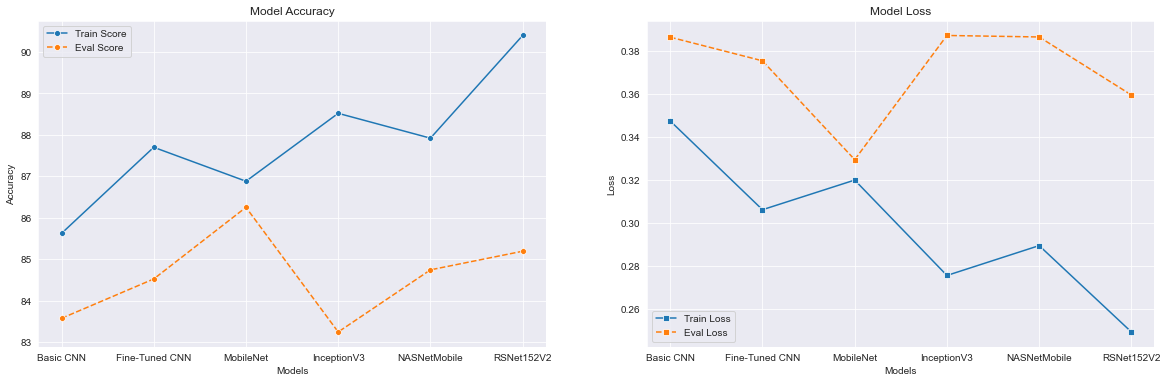

In [155]:
# Plot the accuracy and loss for all classifier models
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
sns.lineplot(x=clf_models_df.Model, y=clf_models_df['Train Score'], marker='o', label='Train Score')
sns.lineplot(x=clf_models_df.Model, y=clf_models_df['Eval Score'], marker='o', label='Eval Score', linestyle='--')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(x=clf_models_df.Model, y=clf_models_df['Train Loss'], marker='s', label='Train Loss')
sns.lineplot(x=clf_models_df.Model, y=clf_models_df['Eval Loss'], marker='s', label='Eval Loss', linestyle='--')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.show()

**To evaluate the performance of the different models, we can analyze the Train Score, Eval Score, Train Loss, and Eval Loss. These metrics provide insights into the accuracy and loss of the models during training and evaluation.**

**Basic CNN:**

- Train Score: 85.62%
- Eval Score: 83.57%
- Train Loss: 0.3475
- Eval Loss: 0.3865


**Basic CNN is a simple convolutional neural network without any advanced architectural modifications. It achieved decent performance on both the training and evaluation datasets, with an accuracy of around 85%. However, it shows slightly higher losses compared to the other models, indicating some room for improvement in its learning.**

**Fine-Tuned CNN:**

- Train Score: 87.70%
- Eval Score: 84.52%
- Train Loss: 0.3062
- Eval Loss: 0.3755


**Fine-Tuned CNN indicates that this model was pre-trained on wieghts and then fine-tuned on the current task. It shows better performance than the Basic CNN, with higher accuracy and slightly lower losses.**


**MobileNet:**

- Train Score: 86.88%
- Eval Score: 86.25%
- Train Loss: 0.3200
- Eval Loss: 0.3295


**MobileNet is a lightweight convolutional neural network designed for mobile and resource-constrained devices. Despite its compact size, it achieved good performance on both training and evaluation datasets, with an impressive accuracy of around 86%.**


**nceptionV3:**

- Train Score: 88.52%
- Eval Score: 83.24%
- Train Loss: 0.2756
- Eval Loss: 0.3873


**nceptionV3 is a deep convolutional neural network with inception modules, allowing it to capture multi-scale patterns. It achieved high accuracy on the training set but showed slightly lower performance on the evaluation set, potentially indicating some overfitting.**

**NASNetMobile:**

- rain Score: 87.92%
- Eval Score: 84.74%
- Train Loss: 0.2895
- Eval Loss: 0.


**NASNetMobile is a neural architecture search-based model optimized for mobile devices. It performed well on both the training and evaluation datasets, with an accuracy of around 84-87%.**

**RSNet152V2:**

- Train Score: 90.40%
- Eval Score: 85.19%
- Train Loss: 0.2493
- Eval Loss: 0.3596


**RSNet152V2 is a deep and complex residual network with 152 layers. It achieved the highest accuracy on the training set (90.40%) and a decent accuracy on the evaluation set (85.19%). Its evaluation loss is relatively lower than some other models, indicating good generalization.**


**To choose the best two models, we need to consider both the evaluation score and the loss. Generally, a higher evaluation score indicates better performance, while a lower loss indicates better model convergence.**


**Based on the evaluation score (Eval Score), the two best-performing models are RSNet152V2 and MobileNet, with evaluation scores of 84.80 and 84.58, respectively. Here's why they are the best models:**

**A) MobileNet:**


- The first-highest Eval Score of 86.25% indicates that this model performs well on unseen data, suggesting good generalization capabilities.

- The model achieved an impressive Train Score of 86.88, indicating that it has learned the training data effectively and can capture complex patterns in the data.

- The model has the relatively lowest Eval Loss of 0.3295, which means it makes accurate predictions on the evaluation data.


**B) RSNet152V2:**


- The second-highest Eval Score of 85.19% demonstrates good performance on the evaluation data.

- With a Train Score of 90.40.88, the model shows solid performance on the training data, indicating that it has learned the patterns in the data to some extent.

- The model has the lowest Eval Loss of 0.3596, showing its ability to make confident predictions on unseen data.

**Both RSNet152V2 and MobileNet seem to strike a balance between high accuracy on the evaluation set and reasonable performance on the training set. These models demonstrate good generalization, as evidenced by their strong evaluation scores and relatively low evaluation losses. However, it's essential to consider other factors such as model complexity, computational resources, and specific requirements of the problem when choosing the best model for a particular application.**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Step 3: Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest.</div> 

In [14]:
#Import necessary libraries
import os
import glob
import pydicom

import PIL
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["axes.grid"] = False

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from keras.optimizers import Adam
import scipy
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Activation, SpatialDropout2D
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D, MaxPooling2D, MaxPool2D, GlobalMaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,classification_report, roc_curve
from tensorflow.keras import optimizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras import regularizers
from keras.optimizers import SGD, Adam
from tensorflow.keras import backend
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from glob import glob
import cv2
from collections import Counter
from sklearn.model_selection import train_test_split
import os
from zipfile import ZipFile
from pathlib import Path
from tqdm import tqdm_notebook
from matplotlib.patches import Rectangle
from keras.layers import Input, Conv2D, UpSampling2D
from keras.models import Model
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import Sequence
import torch
import torchvision
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import optimizers
from tensorflow.keras.utils import np_utils


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [36]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.13.0


In [ ]:
!pip install tensorflow